# [버지니아 공대](http://www.cs.virginia.edu/~hw5x/Course/IR2015/_site/lectures/)

- 텍스트 데이터를 넣을 때 의미 표현 때문에 벡터로 만든다.
- 룰베이스, 워드넷 사전 정보, 온톨로지를 사용해서 할 수도 있고, 이게 대안이 되진 않는다. 
    - 사전은 끊임없이 업데이트 해야되고 온톨로지도 사람이 계속 의미를 만들어줘야함
- 워드임베딩에서는 weight값이 어떻게 조절 되었는지가 중요하다.
- 의미적으로 유사한 애들이 뭉쳐있는지 관계

## 정보검색
- information need : 검색 (query) ~이 필요해서 입력해서 검색
- collection = stored data  크롤러가 돌아다니면서 정보를 긁어오면 stored data
- 쿼리와 가장 relevant한 data를 돌려준다. 
- 벡터와 벡터의 관계

### metadata : 해시태그 
- 요즘은 메타데이터가 별로 필요가 없다.

### full-text indexing
- 전체 문서를 어떻게 색인 할 것인가

#### unstructured data를 어떻게 처리할것인가?
- where, on 절을 가지고 정보를 가지고 오지만 해당 키워드를 가지고 있는 것을 모두 가지고 온다.
- db를 가지고 하면 사용자가 찾고 싶은 것과 얼마나 가까운지 뭘 원했는지 정확하게 모른다.

#### text-mining에서 검색이 왜 중요한가?
- 추천을 할 수 있다.
- 단순한 웹 서치가 아니다.
- QnA도 검색을 기반으로 하고 있다. 챗봇 또한 그렇다.
- 토픽 찾는 프로그램 -> 비지도 학습 모델로 한다.

- 가져와서 분석해서 렉시콘에 넣어줘야하는데 실시간이 검색이 잘 안 되는 이유는 이 과정이 아직 진행되지 않아서


- 로그들을 가지고 동일한 키워드에 대해서 사람마다 다른 것을 보여준다. - 개인화, 맞춤형
- 사람들이 클릭하면 렉시콘의 가중치를 높이고 클릭하지 않은 것은 렉시콘을 낮추는 형태로 진행

#### core concept
- say, said -> 컴퓨터는 다른 심볼로 인식할 것이다.
- Document representation 에서 나오는 것이 맵리듀스 나옴. 하둡 에코시스템
- retrival model

http://bitly.kr/85NpbM

#### 뉴스 기사로 IR 해보기

In [1]:
import sqlite3
con = sqlite3.connect("news.db")
cur = con.cursor()

cur.execute("""
    SELECT content
    FROM table2
    ORDER BY id ASC
""")
#corpus는 db에 저장 되어있는 기사들이 저장 되어 있는 리스트
# fetchall()하면 리스트 안에 튜플 형식으로 들어있으므로 하나씩 꺼내서 리스트에 담아준다.
news = cur.fetchall()
corpus = [_[0] for _ in news]

In [3]:
def eojeol(sentence, N=2):
    """
        어절 단위로 잘라서 list 형식으로 반환
        
        Parameters
        -----------
        sentence(str) : 자르고 싶은 문장의 문자열
        N(int) : ngram size
    """
    tokens = word_tokenize(sentence)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
#         ngram.append(" ".join(tokens[i:i+N]))
        ngram.append(tuple(tokens[i:i+N]))
    return ngram


def umjeol(token, N=2):
    """
        음절 단위로 잘라서 list형식으로 반환
        
        Parameters
        ----------
        token(str) : 쪼개고 싶은 문장 입력
        N(int) : ngram size
    """
    tokens = list(token)
    ngram = list()
    for i in range(len(tokens)-(N-1)):
        ngram.append("".join(tokens[i:i+N]))
#         ngram.append(tuple(tokens[i:i+N]))
    return ngram

In [5]:
!pip install --user JPype1-0.6.3-cp37-cp37m-win_amd64.whl

Processing c:\python\python37\e.시스템\jpype1-0.6.3-cp37-cp37m-win_amd64.whl


In [6]:
!pip install konlpy

  Using cached https://files.pythonhosted.org/packages/e5/3d/4e983cd98d87b50b2ab0387d73fa946f745aa8164e8888a714d5129f9765/konlpy-0.5.1-py2.py3-none-any.whl


In [7]:
from konlpy.tag import Kkma
# .pos()는 형태소와 품사 쌍으로 결과를 반환해준다.
Kkma().pos('아이스크림 값 10만원...')

[('아이스크림', 'NNG'),
 ('값', 'NNG'),
 ('10', 'NR'),
 ('만', 'NR'),
 ('원', 'NNM'),
 ('...', 'SE')]

Pre-processing (RE)

Tokenization -> Ngram -> Stemming/Normalization(길이, 빈도) -> Stopwords

collection은 문서 모음이다.

collection = {doc1, doc2, doc3, ... , docN}


In [8]:
import re
from string import punctuation
from nltk.tokenize import word_tokenize

# word_tokenize(corpus[0])
pattern1 = re.compile(r"[{0}]".format(re.escape(punctuation))) # 구두점들을 찾아주는 정규식
# pattern1.sub("",corpus[0]) # 구두점들을 날린다.
pattern2 = re.compile(r"[A-Za-z]{5,}") # 영어 5글자 이상인 것을 찾아주는 정규식
# pattern2.sub("", pattern1.sub("",corpus[0])) # 구두점이랑 영어를 싹 날린다.
pattern3 = re.compile(r"[^ \n0-9A-Za-z가-힣]") # 특수 문자를 날릴 거다.
# pattern3.sub("",pattern2.sub("", pattern1.sub("",corpus[0])))
pattern4 = re.compile(r"\s{2,}")

#정규식으로 필요 없는 문자를 싹 삭제 했다. -> Tokenizing 할 준비가 됨
collection = list()
for _ in corpus:
    collection.append(pattern4.sub(" ",
            pattern3.sub(" ",
            pattern2.sub(" ", 
            pattern1.sub("",_)))).strip())

In [18]:
collection

['합리적 보수 주춧돌 되길 바랐는데 줄지어 추모 정두언 빈소 찾은 조문객들서울연합뉴스 신준희 기자 17일 서울 서대문구 세브란스병원 장례식장에 마련된 고 정두언 전 새누리당 의원의 빈소에서 조문객들이 조문하고 있다 서울연합뉴스 방현덕 기자 고 정두언 의원의 사망 이튿날인 17일 차려진 빈소에는 여야 정치권 인사들의 조문 행렬이 이어졌다 자유한국당 김성태 전 원내대표는 오후 서울 신촌 세브란스 병원 빈소를 찾은 뒤 기자들과 만나 대한민국 보수 정치의 큰 족적을 남기신 훌륭한 정치인인데 이렇게 허무하게 간다는 게 믿어지지 않는다며 남아있는 우리가 제대로 된 보수 정당의 면모를 굳히겠다고 밝혔다 동행한 한국당 장제원 의원은 TV를 켜면 바로 볼 수 있는 선배였는데 이제는 볼 수 없다고 생각하니 가슴이 미어진다며 내년 총선에 우리 원내에 들어와 합리적 보수를 세울 수 있는 주춧돌 역할을 해주길 바랐는데 속절없이 떠나 정신이 멍하다고 했다 빈소 조문하는 김성태장제원서울연합뉴스 신준희 기자 자유한국당 김성태오른쪽 장제원 의원이 17일 오후 서울 신촌 세브란스병원 장례식장에 마련된 고 정두언 전 새누리당 의원 빈소를 조문하고 있다 바른미래당 유승민 의원은 같은 당 정병국 이혜훈 유의동 의원과 함께 조문한 뒤 마지막까지 고인이 혼자 감당했을 괴로움을 제가 다 헤아릴 수 없다 가슴이 아프다라고 했다 지난 17대 국회부터 나란히 의정활동을 시작한 유 의원과 정 전 의원은 친구이자 동료였지만 2007년에는 각각 박근혜 이명박 당시 대선후보 캠프의 책사로서 치열한 경선전을 펼치기도 했다 고 정두언 의원 빈소 찾은 유승민서울연합뉴스 신준희 기자 바른미래당 유승민 지상욱 정병국 이혜훈 의원 등이 17일 오전 서울 신촌 세브란스병원 장례식장에 마련된 고 정두언 전 새누리당 의원 빈소를 조문하고 있다 같은 당 하태경 의원도 조문 후 정 전 의원의 죽음은 대한민국 개혁보수 진영 입장에서도 큰 걱정이라며 그가 이뤄내려 했던 부분을 남아있는 후배들이 반드시 이루어낼 것이라고 말했다 정몽준 아

In [10]:
kkma = Kkma()
kkma.pos("아직 목요일이라니.."), kkma.morphs("아직 목요일이라니..") # 품사, 형태소 
# N -> 명사 V -> 동사

([('아직', 'MAG'),
  ('목요일', 'NNG'),
  ('이', 'VCP'),
  ('라', 'ECD'),
  ('니', 'NP'),
  ('..', 'SW')],
 ['아직', '목요일', '이', '라', '니', '..'])

In [11]:
# Tokenization
# 어절(띄어쓰기 단위로 구분) 있는 그대로 사용
# 조금 더 자연스러운 처리를 하려면 형태소를 사용해야 한다.
# Ngram도 사용해야 한다(앞 뒤 문맥 연관성 고려)

# 구두점이 날라갔으니까 word_tokenizer가 소용이 없다.
# from nltk.tokenize import word_tokenize
# len(word_tokenize(collection[0])), len(collection[0].split())

# corpus[0].split() => BoM
# 바이그램을 사용해서 띄어쓰기를 고려했더니 뻥튀기 됨.(umjeol)
len(collection[0].split()), len(eojeol(collection[0])), \
len(umjeol(collection[0])), len(kkma.morphs(collection[0])) # kkma -> feature의 수 

(431, 430, 1727, 950)

Vocabulary는 모든 문서에 들어있는 term의 모음이다.

In [12]:
Vocabulary = list()
for _ in collection:
    Vocabulary.extend(_.split())
    Vocabulary.extend(eojeol(_))
    Vocabulary.extend(umjeol(_))
    Vocabulary.extend(kkma.morphs(_))

In [8]:
len(Vocabulary), len(set(Vocabulary))

(111299, 28856)

Tokenization

--------------------------------

Normalization, Stopwords(비속어, 품사)

In [13]:
# 한 단어인거, 너무 큰거 걸러낼 수 있다.
# 중복인 것은 제거해준다.
Vocabulary = [_ for _ in list(set(Vocabulary)) if 1 < len(_) < 6]
len(Vocabulary)

27852

얘를 이용해서 어미 등 필요 없는거 잘라낼 수 있다.

In [34]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

무식하게 만든 것이다. 이렇게 만들면 느리고 처리할게 너무 많다. for문에 if문이 많다-> 잘못만든거

BoM (Bag of word Model): document의 vector 모음
- 문서의 term이 Vocabulary에 있으면 docvector의 해당 term의 위치의 값을 0 -> 1로 바꿔준다.

In [15]:
# BoM = list(0 for _ in range(len(Vocabulary)))
BoM = list() # docVector 모음
for d in collection: # documents 하나씩 반복 처리
    docVector = list(0 for _ in range(len(Vocabulary))) # 문서의 벡터 
    for _ in d.split() + eojeol(d)+ umjeol(d) + kkma.morphs(d): # 문서를 쪼갠 것들을 하나씩 꺼낸다.
        if _ in Vocabulary: # 문서를 조각낸 것이 Vocabulary에 있으면
            docVector[Vocabulary.index(_)] = 1 # docVector에 Vocabulary에서 _가 있는 위치에 docVector 1로 표시
    BoM.append(docVector) # 완성된 docVector를 append 해준다

In [14]:
BoM

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,


In [16]:
import numpy as np
len(Vocabulary) - sum(BoM[0])

26540

In [14]:
BoM

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [17]:
# 문제점1 : Sparse(희소)하다 (복잡도가 증가한다)
# Sparse matrix(희소 행렬) -> 대부분의 값이 0이다.
[(sum(_), len(Vocabulary)) for _ in BoM]

[(1312, 27852),
 (1838, 27852),
 (1123, 27852),
 (1420, 27852),
 (1109, 27852),
 (1622, 27852),
 (1776, 27852),
 (1810, 27852),
 (1364, 27852),
 (1620, 27852),
 (1616, 27852),
 (883, 27852),
 (1444, 27852),
 (1874, 27852),
 (1337, 27852),
 (1880, 27852),
 (1257, 27852),
 (1048, 27852),
 (482, 27852),
 (734, 27852),
 (1956, 27852),
 (1983, 27852),
 (870, 27852),
 (815, 27852),
 (1236, 27852),
 (1748, 27852),
 (1747, 27852),
 (1553, 27852),
 (1187, 27852),
 (1401, 27852),
 (1269, 27852),
 (825, 27852),
 (665, 27852),
 (1342, 27852),
 (1549, 27852)]

In [18]:
Query = ["국민", "법안"]
totalResult = list()
for q in Query: # 쿼리 만큼 반복시킨다.
    searchResult = list() # 각각 쿼리에 대한 결과를 저장한다.
    for i, d in enumerate(BoM): # BoM에 있는 docVector를 순회한다.
        for j, b in enumerate(d): # 문서에 있는 단어중 Query와 같은 단어가 있는지 확인한다.
            if b == 1 and j == Vocabulary.index(q):
                searchResult.append(i) # 일치하는 단어가 있는 문서의 index를 결과에 저장한다.
                break # docVector 속 값을 찾는 반복 중지
    totalResult.append(searchResult) # 1개 쿼리에 대한 찾은 결과를 전체 결과에 저장한다.
# Vocabulary.index("국민"), Vocabulary.index("법안")

intersection(교차점) : 두 개 쿼리의 공통된 문서를 찾기 위해 사용

In [19]:
set(totalResult[0]).intersection(totalResult[1])

{6, 8, 34}

## inverted index
- term을 가지고 document를 표현했다.
- term : index
- linked list로 구현 되었다.

    DTM = {doc0 : {term1 : 1,
                    term2 : 1,
                    term3 : 1,
                    ...
                    termN : 1},
           doc1 : {term0 : 1,
                   term5 : 1,
                   ...
                   termM : 1},
           ...
           docN : {...}}

In [51]:
from collections import defaultdict

#doc -> term:freq => 문장에 어떤 단어들이 얼마나 나왔는지
DTM = defaultdict(lambda:defaultdict(int))
for i, d in enumerate(BoM):
    for j, t in enumerate(d):
        if t == 1:
            DTM[i][j] = t
            
# Sparse : 90% 0인 부분을 줄일 수 있다.

In [14]:
DTM[0]

defaultdict(int,
            {19: 1,
             20: 1,
             53: 1,
             90: 1,
             144: 1,
             201: 1,
             204: 1,
             232: 1,
             237: 1,
             254: 1,
             273: 1,
             297: 1,
             321: 1,
             351: 1,
             454: 1,
             482: 1,
             483: 1,
             492: 1,
             516: 1,
             543: 1,
             554: 1,
             567: 1,
             579: 1,
             586: 1,
             641: 1,
             647: 1,
             655: 1,
             661: 1,
             666: 1,
             677: 1,
             697: 1,
             739: 1,
             763: 1,
             793: 1,
             795: 1,
             808: 1,
             812: 1,
             828: 1,
             846: 1,
             894: 1,
             897: 1,
             919: 1,
             988: 1,
             1042: 1,
             1086: 1,
             1099: 1,
             1107:

In [21]:
sum(DTM[0].values())

1312

TDM은 term->doc 찾아가게 만든 것이다.

        DTM = {term0 : {doc1 : 1,
                    doc2 : 1,
                    doc3 : 1,
                    ...
                    docN : 1},
           term1 : {doc0 : 1,
                   doc5 : 1,
                   ...
                   docM : 1},
           ...
           termN : {...}}

In [52]:
TDM = defaultdict(lambda:defaultdict(int))
for i, termDict in DTM.items():
    for j, b in termDict.items():
        TDM[j][i] = b
        
# 정보 검색을 할 떄 complexity를 줄일 수 있다.

<공간 복잡도>

BoM = O(|Q| * D * |D|)


TDM = O(|Q| * avg(|D|))

In [21]:
searchResult = list()
for q in Query:
    j = Vocabulary.index(q)
#     TDB[j].keys() # 문서 번호
    searchResult.append(list(TDM[j].keys()))

In [23]:
set(searchResult[0]).intersection(searchResult[1])

{6, 8, 34}

벡터라이즈 한다고 하면 BoM, TDM 이 기본 구조이다.

다시 벡터화 할 수 있다.

In [23]:
# termVector.shape = len(Vocabulary), len(collection)
termVector = list(list(0 for _ in range(len(collection)))
                 for _  in range(len(Vocabulary)))
for j, docDict in TDM.items():
    for i in range(len(collection)):
        termVector[j][i] = docDict[i]

In [24]:
termVector

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0],
 [0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


\_BoM -> TDM을 이용하여 termVector를 만든것.

\_BoM.T == BoM

In [25]:
import numpy as np
_BoM = np.array(termVector)

BoM[0] == \_BoM.T[0]

In [28]:
_BoM.T[0]

array([0, 0, 0, ..., 0, 0, 1])

In [30]:
sum(BoM[0]), sum(_BoM.T[0])

(1312, 1312)

dict 구조 사용한 DTM, TDM -> 복잡도가 낮아지고, 공간이 줄었고, 빨라졌다.

다음과 같이 두가지로 쪼갤거다. (Dictionary, Posting)

In [35]:
# Documents
D = [
    ["A", "B"], # document
    ["C", "D"], # document
    ["A", "C"], # document
]

# TDM, "A" : {0:freq, 1:freq}
# TDM = Dictionary
# "A":0
# Posting
# [
#     0: 어느문서, freq, 1
#     1: djsmanstj, freq, -1
# ]


Dictionary = defaultdict(lambda:-1) # -1이면 더이상 없는 형태 0부터 시작할거기 때문에 -> term별 다음 posting의 위치 저장
Postings = list() # [(문서번호, freq, 다음 posting의 idx), ...]

# 전체 단어 목록 추출
V = list()

for j, d in enumerate(D): # document를 뒤져서 
    for t in d: # term이 나올거고
        if t not in V: # V에 없으면 추가해준다. -> Vocabulary 구축
            V.append(t)
        i = V.index(t) # t의 V에서 index
        nextPosition = Dictionary[i] # 다음 것이 없으면 -1이다.
        _struct = (j, 1, nextPosition) # 몇 번 째 문서에서, 몇 번 나왔고, 다음 단어의 위치는 어디인가
        Dictionary[i] = len(Postings) # nextPosition이 포스팅 위치 정보임. 
        Postings.append(_struct) # 몇 번째 문서에서 몇 번 나왔는지 정보를 저장해줄거임
        

In [36]:
Postings

[(0, 1, -1), (0, 1, -1), (1, 1, -1), (1, 1, -1), (2, 1, 0), (2, 1, 2)]

In [37]:
Q = ["A"]

for q in Q:
    i = V.index(q)
    nextPosition = Dictionary[i] # query의 첫 posting 위치
    while True:
        _struct = Postings[nextPosition]
        nextPosition = _struct[2] # 다음 posting
        print("{0}번째 문서, {1}번, 다음위치:{2}".format(_struct[0]+1, _struct[1], _struct[2]))
        if nextPosition == -1:
            break
#         nextPosition = _struct[2]

3번째 문서, 1번, 다음위치:0
1번째 문서, 1번, 다음위치:-1


In [38]:
D[0], D[2]

(['A', 'B'], ['A', 'C'])

위의 방식은 파이썬에서만 된다.
### ------------------------------------------------------------------------------------------------------------

그러므로 아래와 같이 파일로 저장하는 형식을 사용하면 다른 곳에서도 사용할 수 있다. 

In [39]:
D = [
    ["A", "B"],
    ["C", "D"],
    ["A", "C"],
]


Dictionary = defaultdict(lambda:-1) # -1이면 더이상 없는 형태 0부터 시작할거기 때문에
Postings = open('postings.dat', 'w') # file로 postings를 저장

# 전체 단어 목록 추출
V = list()

for j, d in enumerate(D): # document를 뒤져서 
    for t in d: # term이 나올거고
        if t not in V: # V에 없으면 추가해준다.
            V.append(t)
        i = V.index(t) # t의 V에서 index
        nextPosition = Dictionary[i] # 다음 것이 없으면 -1이다.
        _struct = (str(j), str(1), str(nextPosition)) # 몇 번 째 문서에서, 몇 번 나왔고, 다음 위치는 어디인가
        print(_struct)
        Dictionary[i] = Postings.tell() # 위치를 반환 
        print(",".join(_struct))
        Postings.write(",".join(_struct)+"\n") # 몇 번째 문서에서 몇 번 나왔는지 정보를 저장해줄거임

Postings.close()        

('0', '1', '-1')
0,1,-1
('0', '1', '-1')
0,1,-1
('1', '1', '-1')
1,1,-1
('1', '1', '-1')
1,1,-1
('2', '1', '0')
2,1,0
('2', '1', '16')
2,1,16


In [40]:
Q = ["C"]
Postings = open('postings.dat', 'r')

for q in Q:
    i = V.index(q)
    nextPosition = Dictionary[i]
    while True:
        Postings.seek(nextPosition)
        _struct = [int(_.strip())
                   for _ in Postings.readline().split(",")]
#         nextPosition = int(_struct[2])
        nextPosition = _struct[2]
        print("{0}번째 문서, {1}번, 다음위치:{2}".format(_struct[0]+1, _struct[1], _struct[2]))
        # 위치가 str이므로 1byte씩 먹었을 거잖아요 그래서 16이 나와요
        if nextPosition == -1:
            break
#         nextPosition = _struct[2]
Postings.close()

3번째 문서, 1번, 다음위치:16
2번째 문서, 1번, 다음위치:-1


In [41]:
from struct import pack, unpack # byte array로 바꾸는 과정

D = [
    ["A", "B"],
    ["C", "D"],
    ["A", "C"],
]


Dictionary = defaultdict(lambda:-1)
Postings = open('postings.dat', 'wb') # 바이트로 저장할거에요


V = list()

for j, d in enumerate(D): 
    for t in d: 
        if t not in V: 
            V.append(t)
        i = V.index(t) 
        nextPosition = Dictionary[i] 
        _struct = pack("iii", j, 1, nextPosition) # format -> integer 4byte로 3개 넣겠다.
        Dictionary[i] = Postings.tell()
        Postings.write(_struct) 

Postings.close()        

In [42]:
with open('postings.dat', 'rb') as fp:
    print(fp.read())

b'\x00\x00\x00\x00\x01\x00\x00\x00\xff\xff\xff\xff\x00\x00\x00\x00\x01\x00\x00\x00\xff\xff\xff\xff\x01\x00\x00\x00\x01\x00\x00\x00\xff\xff\xff\xff\x01\x00\x00\x00\x01\x00\x00\x00\xff\xff\xff\xff\x02\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x02\x00\x00\x00\x01\x00\x00\x00\x18\x00\x00\x00'


In [43]:
Q = ["C"]
Postings = open('postings.dat', 'rb') # byte로 저장했으니 바이트로 불러와서 

for q in Q:
    i = V.index(q)
    nextPosition = Dictionary[i]
    while True:
        Postings.seek(nextPosition)
        _struct = unpack("iii", Postings.read(4*3)) # 4 byte로 3개 불러오겠다.
#         print(_struct)
        nextPosition = _struct[2]
        print("{0}번째 문서, {1}번, 다음위치:{2}".format(_struct[0]+1, _struct[1], _struct[2]))
        if nextPosition == -1:
            break
#         nextPosition = _struct[2]

Postings.close()

3번째 문서, 1번, 다음위치:24
2번째 문서, 1번, 다음위치:-1


DTM과 TDM을 사용할 때

In [44]:
from struct import pack, unpack # byte array로 바꾸는 과정

D = [
    ["A", "B"],
    ["C", "D"],
    ["A", "C"],
]

V = list()

for j, d in enumerate(D): 
    for t in d: 
        if t not in V: 
            V.append(t)
        i = V.index(t) 
        TDM[i][j] = 1
      

In [45]:
TDM

defaultdict(<function __main__.<lambda>()>,
            {44: defaultdict(int,
                         {0: 1,
                          1: 0,
                          2: 0,
                          3: 0,
                          4: 0,
                          5: 0,
                          6: 0,
                          7: 0,
                          8: 0,
                          9: 0,
                          10: 0,
                          11: 0,
                          12: 0,
                          13: 0,
                          14: 0,
                          15: 0,
                          16: 0,
                          17: 0,
                          18: 0,
                          19: 0,
                          20: 0,
                          21: 0,
                          22: 0,
                          23: 0,
                          24: 0,
                          25: 0,
                          26: 0,
                          27: 0,
        

In [72]:
%%timeit
Q = ["A", "C"]

for q in Q:
    i = V.index(q)
    
    for d, b in TDM[i].items():
        print("{0}번째 문서, {1}번".format(d,b))

6.82 µs ± 562 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 빈도 까지 적용

In [53]:
V = list()
D = list()

DTM = defaultdict(lambda:defaultdict(int))


for d in collection:
    i = len(D)
    D.append(i)
    
#     ("형태소", "품사") 형태로 나옴
    for t in [_[0] for _ in kkma.pos(d) if _[1].startswith("N")]:
        if t not in V:
            V.append(t)
        j = V.index(t)
        DTM[i][j] += 1

계산 량이 줄었다.

In [47]:
len(V), len(D)

(3306, 35)

In [54]:
TDM = defaultdict(lambda:defaultdict(int))

for i, terms in DTM.items():
    for j, f in terms.items():
        TDM[j][i] = f

file에 있을 때 와 리스트에 있는거를 확인해야 됨

In [ ]:
%%timeit
for t, docs in TDM.items():
    for d, f in docs.items():
        print(V[j], D[i], f)
    print()
    
# 2.9 s ± 270 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [97]:
V = list()
D = list()
Dictionary = defaultdict(lambda:-1)
Postings = list()

for d in collection:
    i = len(D)
    D.append(i)
    localPostings = defaultdict(int)
    
    for t in [_[0] for _ in kkma.pos(d) if _[1].startswith("N")]:
        if t not in V:
            V.append(t)
        j = V.index(t)
        localPostings[j] += 1
        
    for j, f in localPostings.items():
        nextPosition = Dictionary[j]
        _struct = (i, f, nextPosition)
        Dictionary[j] = len(Postings)
        Postings.append(_struct)

In [100]:
# 근소하게 빠르다.
%%timeit
for j in range(len(V)):
    nextPosition = Dictionary[j]
    while True:
        _struct = Postings[nextPosition]
        nextPosition = _struct[2]
        print(V[j], D[_struct[0]], _struct[1])
        if nextPosition == -1:
            break
    print()

UsageError: Line magic function `%%timeit` not found.


### file로 바꿉시다.

In [92]:
V = list()
D = list()
Dictionary = defaultdict(lambda:-1)
Postings = open('Postings.dat', 'w')

for d in collection:
    i = len(D)
    D.append(i)
    localPostings = defaultdict(int) # 빈도 저장해야되니 냅두자
    
    for t in [_[0] for _ in kkma.pos(d) if _[1].startswith("N")]:
        if t not in V:
            V.append(t)
        j = V.index(t)
        localPostings[j] += 1
        
    for j, f in localPostings.items():
        nextPosition = Dictionary[j]
        _struct = (i, f, nextPosition)
        Dictionary[j] = Postings.tell()
        Postings.write("{0},{1},{2}\n".format(
            _struct[0], _struct[1], _struct[2]))
        
Postings.close()

In [94]:
with open("Postings.dat", 'r') as Postings:
    for j in range(len(V)):
        nextPosition = Dictionary[j]
        while True:
            Postings.seek(nextPosition)
            _struct = [int(_.strip()) 
                       for _ in Postings.readline().split(",")]
            nextPosition = _struct[2]
            print(V[j], D[_struct[0]], _struct[1])
            if nextPosition == -1:
                break
                
# 4.57 s ± 255 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

합리적 31 1
합리적 0 2
보수 7 1
보수 1 1
보수 0 5
주춧돌 0 2
추모 0 2
정 33 1
정 31 1
정 26 1
정 22 1
정 17 1
정 12 1
정 9 4
정 8 1
정 6 3
정 5 2
정 3 3
정 1 8
정 0 18
빈소 0 13
조문객 0 2
서울 34 1
서울 32 1
서울 30 3
서울 20 1
서울 19 3
서울 18 1
서울 16 6
서울 15 6
서울 14 6
서울 11 8
서울 10 6
서울 9 2
서울 8 5
서울 6 4
서울 4 6
서울 3 2
서울 1 3
서울 0 14
연합 30 1
연합 29 6
연합 28 4
연합 27 1
연합 26 1
연합 25 3
연합 23 5
연합 18 1
연합 15 1
연합 6 7
연합 4 4
연합 2 5
연합 1 6
연합 0 9
뉴스 33 1
뉴스 32 1
뉴스 30 2
뉴스 29 2
뉴스 28 4
뉴스 27 2
뉴스 26 2
뉴스 25 2
뉴스 23 5
뉴스 22 3
뉴스 21 2
뉴스 20 1
뉴스 18 1
뉴스 17 1
뉴스 16 1
뉴스 15 2
뉴스 14 1
뉴스 13 1
뉴스 11 1
뉴스 10 1
뉴스 7 2
뉴스 6 7
뉴스 4 4
뉴스 3 2
뉴스 2 5
뉴스 1 5
뉴스 0 9
신 15 1
신 1 1
신 0 6
기자 34 4
기자 33 1
기자 32 1
기자 31 2
기자 30 1
기자 29 1
기자 26 1
기자 25 1
기자 24 2
기자 23 2
기자 22 2
기자 21 2
기자 20 1
기자 19 1
기자 18 1
기자 17 1
기자 16 1
기자 15 1
기자 14 1
기자 13 1
기자 12 1
기자 11 1
기자 10 2
기자 9 4
기자 8 4
기자 7 2
기자 6 5
기자 4 2
기자 3 4
기자 2 3
기자 1 4
기자 0 8
17 32 1
17 30 1
17 28 1
17 27 2
17 26 4
17 23 4
17 20 1
17 19 1
17 18 2
17 17 1
17 16 1
17 15 1
17 14 2
17 13 2
17 12 2
17 11 

총회 7 2
총회 1 2
3 33 6
3 31 1
3 30 2
3 28 4
3 27 8
3 26 2
3 24 3
3 23 1
3 20 1
3 18 1
3 15 6
3 14 1
3 13 1
3 12 1
3 10 5
3 9 7
3 8 2
3 7 2
3 6 1
3 5 1
3 3 1
3 1 8
지대 20 1
지대 9 5
지대 1 6
주장 29 2
주장 27 1
주장 26 1
주장 22 1
주장 20 6
주장 17 2
주장 11 1
주장 9 3
주장 7 1
주장 1 3
파가 27 1
파가 9 1
파가 1 1
자강 1 1
파와 1 2
의견 34 1
의견 26 2
의견 15 1
의견 9 1
의견 5 1
의견 1 3
차 32 2
차 15 4
차 7 1
차 5 1
차 2 2
차 1 2
행동 1 1
때문 34 1
때문 30 1
때문 27 3
때문 20 2
때문 15 1
때문 14 1
때문 13 5
때문 10 2
때문 7 3
때문 6 1
때문 1 1
반당 9 1
반당 1 2
의총 1 1
합의점 1 1
준비 34 1
준비 32 1
준비 18 1
준비 17 1
준비 14 1
준비 1 1
모임 1 1
변화 32 1
변화 27 1
변화 25 2
변화 20 1
변화 9 2
변화 1 2
약칭 1 1
본격 1 1
수순 1 1
계기 16 1
계기 12 1
계기 5 1
계기 1 1
기정사실 7 1
기정사실 1 1
하자 21 1
하자 5 2
하자 1 1
당내 25 1
당내 1 4
내연 21 1
내연 1 1
간 34 1
간 31 1
간 28 1
간 24 1
간 21 1
간 20 3
간 15 2
간 13 2
간 12 1
간 10 2
간 8 1
간 6 1
간 5 2
간 1 1
수면 1 1
위 26 4
위 21 1
위 11 1
위 9 3
위 7 2
위 5 1
위 3 1
위 1 2
터 31 1
터 29 1
터 23 1
터 21 1
터 13 1
터 9 1
터 1 1
뿐 26 1
뿐 17 1
뿐 1 1
외부 9 2
외부 7 1
외부 1 2
추가 33 1
추가 30 1
추가 26 1
추가 25 1
추가 17 1

정부 30 4
정부 29 2
정부 28 3
정부 27 1
정부 26 6
정부 25 1
정부 22 4
정부 15 2
정부 14 1
정부 13 7
정부 12 2
정부 10 5
정부 7 1
정부 5 2
정부 4 4
정부 3 3
민간 13 2
민간 3 1
기업 34 1
기업 25 1
기업 20 8
기업 14 3
기업 12 10
기업 10 4
기업 8 1
기업 3 4
합심 3 1
경제 33 2
경제 32 1
경제 30 1
경제 29 2
경제 26 5
경제 25 2
경제 24 3
경제 22 1
경제 21 3
경제 20 5
경제 15 1
경제 14 8
경제 13 2
경제 12 3
경제 11 7
경제 10 7
경제 6 1
경제 5 4
경제 3 2
보복 26 6
보복 22 2
보복 14 2
보복 10 1
보복 8 1
보복 5 1
보복 3 2
여론 27 3
여론 26 1
여론 3 2
전달 7 1
전달 3 1
긴장감 3 1
국익 3 1
우선 10 1
우선 3 1
신중 3 1
소통 9 1
소통 5 1
소통 3 1
단기적 3 1
장기적 12 1
장기적 3 1
대책 30 1
대책 14 1
대책 12 3
대책 8 1
대책 4 3
대책 3 1
논의 7 1
논의 5 2
논의 3 1
각자 3 2
자리 25 3
자리 15 1
자리 12 1
자리 9 1
자리 6 2
자리 5 6
자리 3 1
방법 20 1
방법 6 1
방법 3 1
당적 3 2
협력 32 1
협력 22 1
협력 3 2
키 28 1
키 24 1
키 8 1
키 5 1
키 3 1
국내 33 1
국내 31 1
국내 24 2
국내 16 2
국내 12 1
국내 10 2
국내 8 1
국내 3 1
신문 27 2
신문 16 3
신문 10 2
신문 3 2
원래 3 1
자극적 3 1
4 30 1
4 28 4
4 27 1
4 23 1
4 20 1
4 17 1
4 16 1
4 15 2
4 11 1
4 8 1
4 7 1
4 3 1
투자 32 1
투자 20 1
투자 3 3
40 18 1
40 13 1
40 3 1
요즘 33 1
요즘 21 1
요즘 3 1
기사

마중물 6 1
야당 27 2
야당 26 2
야당 8 1
야당 6 4
전향 6 1
연속 6 1
본회의 25 2
본회의 8 7
본회의 6 6
선례 6 1
일인 6 1
패스트 6 2
트랙 6 2
신속 6 1
안건 8 2
안건 6 1
충돌 6 1
국면 6 1
고소 6 2
이후 24 2
이후 17 2
이후 15 2
이후 11 1
이후 8 2
이후 6 1
본격화 10 1
본격화 9 1
본격화 6 1
조사 27 2
조사 20 1
조사 19 4
조사 18 2
조사 17 1
조사 14 1
조사 10 2
조사 6 1
불응 6 2
당초 13 1
당초 9 1
당초 7 1
당초 6 2
선진 6 1
화법 6 1
위반 29 1
위반 27 1
위반 20 4
위반 17 1
위반 6 1
처벌 16 1
처벌 6 1
간과 6 1
탄압 6 1
운운 6 1
소환 6 1
납득 22 1
납득 6 1
경원 6 3
중진 9 2
중진 6 1
연석회의 6 1
지키기 6 1
공격 27 2
공격 6 1
여당 27 4
여당 8 1
여당 6 3
계속 27 1
계속 11 2
계속 7 1
계속 6 2
민의 6 1
몽니 6 1
채 6 1
막 6 1
위기 29 1
위기 21 1
위기 8 2
위기 7 1
위기 6 1
포기 22 1
포기 6 2
고발 6 1
무늬 6 1
견학 6 1
출석 6 1
놀이 6 1
전날 29 1
전날 19 1
전날 10 1
전날 6 1
청문 6 1
경과 19 1
경과 6 1
보고서 7 1
보고서 6 1
채택 6 1
윤 33 1
윤 15 24
윤 12 1
윤 6 1
검찰 20 6
검찰 17 3
검찰 15 10
검찰 6 3
총장 15 12
총장 6 2
임명 25 1
임명 15 2
임명 6 1
재가 15 1
재가 6 1
고리 6 1
공세 29 1
공세 6 2
강화 34 2
강화 33 1
강화 32 1
강화 31 2
강화 28 1
강화 25 1
강화 10 1
강화 6 1
황 20 1
황 7 6
황 6 2
교 7 4
교 6 1
정치적 15 1
정치적 8 1
정치적 7 1
정치적 6 3
중립 6 2
적격자 6 1

일반 13 11
수익 13 2
손실 33 1
손실 13 3
감내 13 1
이달 28 1
이달 22 1
이달 15 1
이달 14 1
이달 13 2
가상 13 7
시행 34 1
시행 13 2
진퇴양난 13 1
시공사 13 4
택지 13 1
실시 15 1
실시 13 1
촉각 13 1
강남 13 1
집값 13 1
지속적 13 1
우 25 2
우 16 1
우 13 1
상향 13 1
제하 13 1
마식 13 1
수준 33 2
수준 30 1
수준 24 1
수준 13 2
책정 13 2
강동구 13 1
비교 21 1
비교 13 1
가나 13 1
시세 13 2
평균 33 1
평균 13 1
가인 13 1
2569 13 1
적용 31 3
적용 13 3
올림픽 28 1
올림픽 13 1
선수촌 13 1
3700 13 1
가로 13 1
1200 13 2
면적 13 2
규모 15 1
규모 14 6
규모 13 1
대비 28 1
대비 13 2
4545 13 1
억 28 2
억 20 4
억 14 6
억 13 3
개별 13 2
최상 13 1
시나리오 13 1
3400 13 1
비용 34 1
비용 21 1
비용 13 2
셈 34 1
셈 29 1
셈 27 1
셈 26 1
셈 13 1
4000 13 2
2748 13 1
만원 16 1
만원 13 1
부가세 13 1
200 24 1
200 21 1
200 13 1
2460 13 1
6200 13 1
땅값 13 1
건축비 13 1
원가 20 2
원가 13 1
산정 13 1
액 13 1
금융 20 2
금융 13 1
사업장 14 1
사업장 13 1
2010 13 1
현대 13 2
건설 21 1
건설 13 2
건설사 13 2
이례적 13 1
지분 20 4
지분 13 8
시공 13 2
변동 13 2
이견 13 1
발생 14 2
발생 13 2
소유 13 1
비율 25 1
비율 20 1
비율 13 1
무상 13 1
보장 13 1
개발 21 1
개발 13 1
하락 13 1
미분양 13 1
위험 13 1
입찰 13 1
제로 25 1
제로 13 2
본계약 13 1
체결 

장맛비 23 3
제주시 23 1
구좌읍 23 1
자림 23 1
우비 23 1
2019710 23 1
기상청 23 5
한때 23 1
산지 23 1
예보 23 2
북부 27 1
북부 23 1
서부 23 1
지형 23 1
소강 23 1
한라산 23 1
남북 23 1
이틀간 23 1
나스 23 2
진로 23 2
발달 23 1
우리나라 23 1
기압계 23 1
강수 23 1
변동성 23 1
불고 23 1
밤 23 1
제주도 23 4
남쪽 23 2
풍랑 23 1
예비 23 1
특보 23 1
앞바다 23 1
너울 23 1
파도 23 1
해안 23 1
방파제 23 1
안전사고 23 1
유의 23 1
다나 23 1
기압 23 1
996 23 1
헥토파스칼 23 1
풍속 23 1
시속 23 2
65 28 1
65 23 1
소형 23 1
필리핀 23 1
마닐라 23 1
북동쪽 23 1
570 23 1
동진 23 1
근접 23 1
재판매 23 1
신선미 24 2
저칼로리 24 2
아이스크림 24 6
헤일로 24 15
탑 24 15
출사표 24 1
아시아 24 2
진출 24 4
출시 31 6
출시 30 1
출시 24 2
브랜드 33 1
브랜드 24 5
2880 24 1
통 25 1
통 24 3
지가 24 1
발명품 24 1
톱 24 1
파인트 24 2
474 24 1
열량 24 3
285 24 1
공기 24 1
밥 24 1
그릇 24 1
용량 33 3
용량 24 1
1000 33 1
1000 24 1
유지방 24 1
계란 24 1
흰자 24 1
활용 34 2
활용 31 3
활용 30 1
활용 26 1
활용 24 1
단맛 24 1
유기농 24 1
벌 24 1
파티 24 1
버터 24 1
컵 24 1
솔트 24 1
슈퍼 33 1
슈퍼 24 1
온라인 24 2
카카오 34 2
카카오 30 1
카카오 24 1
구매 34 1
구매 24 1
버튼 24 2
창립 24 1
창립자 24 1
키트 24 1
창업 24 1
영감 24 1
르 29 2
르 25 3
르 24 1
바레즈 24 2
매니저 24 

나 6 2
나 5 1
나 4 2
나 2 1
나 1 2
나 0 2
대한민국 24 1
대한민국 21 4
대한민국 9 1
대한민국 0 2
정치 25 2
정치 21 1
정치 9 13
정치 1 14
정치 0 2
족적 0 1
정치인 9 2
정치인 1 3
정치인 0 1
허무 0 1
것 34 1
것 33 3
것 32 5
것 31 1
것 30 7
것 29 10
것 28 7
것 27 4
것 26 7
것 25 2
것 24 3
것 23 2
것 22 3
것 21 6
것 20 5
것 19 5
것 17 4
것 16 3
것 15 11
것 14 5
것 13 6
것 12 4
것 11 4
것 10 12
것 9 4
것 8 11
것 7 10
것 6 10
것 5 7
것 4 5
것 3 5
것 2 3
것 1 9
것 0 2
우리 29 2
우리 26 2
우리 21 3
우리 12 1
우리 10 1
우리 7 1
우리 3 2
우리 2 2
우리 0 2
정당 20 3
정당 7 1
정당 6 1
정당 1 3
정당 0 1
면모 0 1
동행 0 1
제원 0 3
수 34 3
수 33 7
수 32 1
수 31 2
수 30 1
수 28 3
수 27 1
수 26 2
수 25 3
수 24 2
수 21 5
수 20 4
수 16 1
수 15 1
수 14 5
수 13 3
수 11 1
수 10 4
수 9 1
수 7 6
수 6 4
수 5 2
수 4 2
수 3 2
수 2 2
수 1 1
수 0 4
선배 21 2
선배 0 1
이제 21 1
이제 12 1
이제 0 1
생각 30 1
생각 27 1
생각 24 1
생각 13 2
생각 12 2
생각 9 2
생각 7 1
생각 5 3
생각 1 2
생각 0 1
가슴 17 1
가슴 0 2
내년 28 1
내년 0 1
총선 9 1
총선 7 1
총선 6 1
총선 1 1
총선 0 1
역할 9 1
역할 1 1
역할 0 1
정신 22 1
정신 17 1
정신 0 1
오른쪽 26 2
오른쪽 14 1
오른쪽 8 1
오른쪽 0 1
조 28 2
조 27 3
조 26 2
조 20 4
조 15 1
조 13 2
조 6 1
조 3 2


여기 1 1
한솥밥 1 1
손금 1 1
호 23 1
호 18 2
호 15 1
호 7 3
호 5 2
호 1 1
무소속 1 1
박주 1 2
동철 1 1
승용 1 1
내 34 1
내 33 1
내 30 1
내 28 1
내 26 2
내 25 1
내 22 1
내 21 2
내 15 1
내 13 1
내 5 1
내 1 2
호남 1 1
대상자 1 1
이 30 3
이 29 2
이 28 1
이 27 2
이 24 2
이 22 2
이 21 3
이 20 5
이 18 1
이 16 1
이 15 3
이 14 2
이 13 1
이 11 2
이 10 1
이 7 2
이 6 3
이 5 2
이 4 1
이 2 1
이 1 5
물밑 1 1
접촉 29 1
접촉 3 1
접촉 1 1
중도 1 1
강조 27 1
강조 26 1
강조 21 1
강조 12 1
강조 5 1
강조 1 1
나아 12 1
나아 1 1
진보 1 1
바른 1 1
기대 31 1
기대 15 1
기대 13 1
기대 4 2
기대 3 1
기대 1 2
인물 27 1
인물 1 2
영입 1 3
승부 27 1
승부 1 1
방침 24 1
방침 14 1
방침 1 1
과거 25 1
과거 17 1
과거 12 1
과거 1 1
새 31 1
새 30 1
새 13 2
새 12 1
새 10 1
새 9 1
새 3 1
새 1 2
시절 25 1
시절 21 1
시절 1 1
안 29 1
안 25 1
안 20 1
안 19 2
안 15 1
안 8 4
안 7 5
안 6 6
안 4 2
안 1 3
철수 1 2
탈당 9 3
탈당 1 1
20 30 1
20 23 2
20 22 1
20 21 1
20 14 1
20 1 1
녹색 1 1
바람 23 1
바람 9 2
바람 1 3
몰이 1 1
비례 1 1
추천 1 1
지역 27 1
지역 23 1
지역 11 6
지역 1 1
공천 1 1
전격적 1 1
부여 1 1
관련 34 4
관련 29 1
관련 26 1
관련 25 2
관련 14 2
관련 10 1
관련 9 1
관련 6 1
관련 5 1
관련 3 3
관련 1 1
라디오 1 1
종배 1 1
시선 12 1
시선 9 1


의지 12 1
의지 3 1
보좌관 5 3
보좌관 3 1
여러분 3 1
자신감 27 1
자신감 3 1
어려움 34 1
어려움 16 1
어려움 5 1
어려움 3 1
당부 12 1
당부 5 1
당부 3 2
전신 3 1
정우 3 1
부대변인 3 1
본관 3 1
국무 29 2
국무 6 1
국무 3 1
참석 17 1
참석 12 1
참석 8 1
참석 5 3
참석 3 1
20190716 3 1
1006 3 1
이코노 3 1
미스트 3 1
변호사 24 1
변호사 20 3
변호사 3 1
가정 3 1
상담소 3 1
가기 33 1
가기 29 1
가기 25 1
가기 19 1
가기 18 1
가기 14 1
가기 11 1
가기 10 1
가기 9 2
가기 8 1
가기 3 1
저작권자 32 1
저작권자 19 1
저작권자 14 1
저작권자 11 1
저작권자 10 1
저작권자 8 1
저작권자 3 1
돈 34 1
돈 3 1
리얼 33 1
리얼 3 1
타임 30 1
타임 24 1
타임 15 1
타임 3 1
무단 33 1
무단 32 1
무단 30 1
무단 29 1
무단 27 1
무단 26 1
무단 25 1
무단 24 1
무단 21 1
무단 20 1
무단 19 1
무단 18 1
무단 17 1
무단 16 1
무단 15 1
무단 14 1
무단 13 1
무단 11 1
무단 10 1
무단 9 1
무단 8 1
무단 5 1
무단 3 1
전재 33 1
전재 32 1
전재 30 1
전재 29 1
전재 27 1
전재 26 1
전재 25 1
전재 24 1
전재 21 1
전재 20 1
전재 19 1
전재 18 1
전재 17 1
전재 16 1
전재 15 1
전재 14 1
전재 13 1
전재 11 1
전재 10 1
전재 9 1
전재 8 1
전재 5 1
전재 3 1
배포 33 1
배포 32 1
배포 30 1
배포 29 1
배포 27 1
배포 26 1
배포 25 1
배포 24 1
배포 21 1
배포 20 1
배포 19 1
배포 18 1
배포 17 1
배포 16 1
배포 15 1
배포 14 1
배포 13 1
배포 11 1
배포 1

이익 7 1
차명 7 1
협위 7 3
장과 15 2
장과 7 1
형평 34 1
형평 7 1
거론 15 3
거론 7 1
세월 7 3
막말 7 5
위원장 25 17
위원장 8 1
위원장 7 1
원장 7 2
조직 7 1
부총장 7 1
와의 7 1
통화 26 1
통화 25 1
통화 21 1
통화 7 1
임면권 7 1
면직 7 1
보완 7 1
개 31 2
개 24 1
개 22 1
개 17 1
개 14 4
개 8 2
개 7 2
답 7 1
이종명 7 2
제명 7 3
북한군 7 1
개입 7 1
폭동 7 1
윤리 7 2
확정 13 5
확정 7 1
상정 12 1
상정 8 1
상정 7 1
회가 7 1
정상화 7 1
특위 7 1
결과 32 1
결과 31 1
결과 27 2
결과 25 1
결과 14 1
결과 13 1
결과 7 2
후폭 7 1
일단 10 1
일단 7 1
속내 7 1
명이 7 1
의결 8 1
의결 7 1
의석수 27 2
의석수 7 1
부결 7 1
포화 7 1
리더십 7 2
단추 7 1
속앓이 13 1
속앓이 7 1
한센병 7 1
천렵 7 1
정은 7 1
삼사일 7 1
언 7 1
경고 7 1
정도 23 1
정도 15 1
정도 14 2
정도 13 2
정도 10 1
정도 9 1
정도 8 1
정도 7 1
자정 7 1
칼날 7 1
항변 7 1
지도부 8 2
지도부 7 2
518 7 1
기념일 7 1
이전 13 1
이전 7 1
해결 26 2
해결 12 1
해결 7 1
기회 34 1
기회 21 1
기회 13 1
기회 7 1
대로 20 1
대로 8 1
대로 7 1
위로 7 1
안팎 25 1
안팎 15 1
안팎 7 1
무시 8 1
무시 7 1
직언 7 1
경직 7 1
구조 34 1
구조 20 3
구조 7 1
결집 12 1
결집 7 1
지지층 7 1
수권 7 1
직시 7 1
봉 34 2
봉 9 1
봉 7 1
당신 22 1
당신 7 1
진짜 22 1
진짜 7 1
케이 28 1
케이 22 1
케이 7 1
140 8 3
여 27 1
여 19 2
여 18 2
여 15 1
여 13 1
여 12 2


전문 20 2
전문 14 1
자회사 20 2
자회사 14 1
코리아 34 6
코리아 31 3
코리아 14 3
노심초사 14 1
퓨즈 14 2
직접적 14 1
800 18 1
800 14 1
매출 14 2
목표 32 1
목표 28 1
목표 14 2
달성 14 1
중앙지 15 4
검장 15 4
대진 15 4
유력 15 2
국정원 15 2
댓 26 4
댓 15 4
국정 15 3
농단 15 4
특검 15 6
팀 21 2
팀 15 5
요직 15 2
발탁 25 2
발탁 15 3
간부급 15 1
단행 15 3
열 15 3
차기 25 10
차기 15 13
청문회 15 3
질의 15 1
데일리 30 3
데일리 15 3
일경 15 2
밑 26 1
밑 15 2
법조계 15 3
사단 20 1
사단 15 3
행보 15 1
관전 15 1
포인트 15 1
25 30 1
25 24 2
25 15 3
59 30 1
59 15 1
연수원 15 2
취임 32 2
취임 25 2
취임 15 4
검사장 15 4
고위직 15 3
구도 15 2
시간적 15 1
여유 29 2
여유 15 1
초 29 1
초 22 1
초 15 1
차장 15 3
부장 17 1
부장 15 7
급 15 4
순차 15 1
법무부 15 4
스타일 15 2
본인 15 1
적극 30 2
적극 15 1
피력 15 1
적폐 15 2
수사 20 2
수사 15 11
진두지휘 15 2
손발 34 1
손발 15 1
약진 15 1
선봉 15 1
초미 15 1
관심사 27 1
관심사 15 1
중앙 25 2
중앙 15 6
지검 15 5
가늠 15 1
후반기 15 1
주요 27 1
주요 15 2
애초 17 1
애초 15 1
55 17 1
55 15 1
국장 15 3
친형 15 1
뇌물 15 1
건너 15 1
반론 15 1
수장 25 1
수장 21 1
수장 15 1
지방 30 1
지방 28 1
지방 23 1
지방 15 1
고검장 15 1
승진 15 5
직행 15 2
외 15 1
물망 15 1
이성 15 1
57 17 1
57 15 1
대검 15 3
부패 

스트라 25 1
정식 25 1
선출 25 3
소감 25 2
행정 25 1
수반 25 1
격 27 1
격 25 1
오르기 25 1
저출산 25 2
일곱 25 1
천장 25 1
과제 25 1
재적 25 1
747 25 1
383 28 1
383 25 1
찬성표 25 1
인준 25 2
임기 27 1
임기 25 1
클로드 25 1
바통 25 1
2024 25 1
영국 25 4
탈퇴 25 2
기후 25 2
현안 25 1
시한 25 1
혼란 25 1
연기 31 2
연기 25 1
2050 25 1
배기가스 25 1
배출 25 1
0 25 1
법치 25 1
민주주의 25 1
에어 25 1
버스 25 1
보조금 25 1
관세 25 2
철강 25 1
숙제 25 1
강인 25 1
타협 25 1
풀이 25 1
독일인 25 1
총리 27 7
총리 26 1
총리 25 4
프랑스어 25 1
구사 25 1
마크 29 1
마크 25 1
기독 25 3
개혁파 25 2
남매 25 1
엄마 25 1
이면서 27 1
이면서 25 1
상대적 25 1
보수적 25 1
직장 25 2
파이터 25 1
노동부 25 2
휴직 25 1
출산 25 1
병행 25 1
데는 25 1
남편 25 3
하이 33 2
하이 25 1
아버지 25 2
관료 25 1
니더 25 1
작센주 25 1
청년 25 1
정당인 25 1
임원 25 1
당제 25 1
보육 25 1
증대 25 1
최저 25 1
임금제 25 1
동성 25 1
결혼 25 1
은행 25 1
총재 25 3
내정 25 3
크리스 25 1
라가 25 2
사직서 25 1
제출 25 1
상임 25 1
미 29 6
미 28 1
미 25 1
벨기에 25 1
호세 25 1
보 25 1
스페인 25 1
공석 25 1
레트 25 1
카 25 1
바우어 25 1
모바일 33 1
모바일 29 1
모바일 25 1
사이트 26 8
랭킹 26 5
상위권 26 2
차지 32 2
차지 30 1
차지 28 2
차지 27 1
차지 26 3
아베 27 5
아베 26 1
신조 27 2
신조 26 1

활동 0 1
시작 33 1
시작 27 2
시작 22 1
시작 21 2
시작 12 2
시작 7 1
시작 3 1
시작 0 2
친구 19 7
친구 5 1
친구 0 1
이자 25 1
이자 13 1
이자 0 1
동료 0 1
2007 0 1
년 34 1
년 33 4
년 32 1
년 30 2
년 29 1
년 27 3
년 25 3
년 24 7
년 21 2
년 20 5
년 17 4
년 16 3
년 15 5
년 13 4
년 12 1
년 11 1
년 10 1
년 3 1
년 1 2
년 0 1
박근 0 1
이명 0 4
박 32 1
박 28 1
박 26 1
박 15 5
박 12 9
박 7 2
박 1 4
박 0 5
당시 20 1
당시 19 2
당시 18 1
당시 17 1
당시 16 6
당시 15 1
당시 13 4
당시 2 1
당시 0 1
대선 0 1
후보 27 2
후보 0 1
캠프 0 1
책사 0 1
치열 29 1
치열 13 1
치열 0 1
경선 0 1
지상 0 1
등 34 5
등 33 4
등 32 4
등 31 1
등 30 3
등 28 1
등 27 2
등 26 4
등 25 5
등 24 5
등 22 1
등 21 2
등 20 3
등 19 2
등 17 1
등 16 4
등 15 8
등 14 2
등 13 5
등 12 3
등 11 6
등 10 5
등 9 3
등 8 2
등 7 1
등 6 1
등 5 4
등 4 3
등 3 2
등 2 4
등 1 10
등 0 2
오전 23 1
오전 13 1
오전 9 1
오전 6 3
오전 5 1
오전 2 2
오전 1 1
오전 0 3
하 32 4
하 24 1
하 0 1
태경 0 1
후 29 1
후 27 1
후 26 3
후 24 3
후 20 2
후 19 1
후 15 1
후 13 4
후 12 1
후 10 1
후 3 1
후 0 1
죽음 0 1
개혁 21 1
개혁 12 1
개혁 0 1
진영 1 2
진영 0 1
입장 34 1
입장 30 1
입장 29 1
입장 26 1
입장 25 1
입장 20 2
입장 11 2
입장 10 1
입장 8 1
입장 6 3
입장 5 1
입장 4 2
입장 3 1

데 28 2
데 25 15
데 16 1
데 15 1
데 11 1
데 10 2
데 9 1
데 7 1
데 5 1
데 3 1
데 1 1
힘 34 2
힘 22 1
힘 9 1
힘 3 1
힘 1 1
저울질 1 1
연 25 1
연 1 1
간담회 30 1
간담회 9 2
간담회 7 1
간담회 5 1
간담회 1 1
정동 9 2
정동 1 1
영 9 2
영 6 1
영 1 1
손 34 2
손 21 1
손 9 2
손 6 1
손 1 1
학규 6 1
학규 1 1
공동 20 4
공동 9 1
공동 1 1
체제 20 1
체제 11 1
체제 9 3
체제 1 1
가능성 31 3
가능성 26 1
가능성 20 3
가능성 15 5
가능성 14 1
가능성 13 3
가능성 10 1
가능성 5 1
가능성 1 2
최악 9 2
최악 1 1
카드 29 2
카드 26 1
카드 21 2
카드 13 1
카드 9 1
카드 1 1
일축 20 2
일축 16 1
일축 1 1
발 26 2
발 17 1
발 3 2
발 1 1
얼굴 9 1
얼굴 1 1
일으키기 1 1
내부 16 1
내부 9 1
내부 7 4
내부 1 1
깃발 1 1
사견 1 1
임 1 1
전제 9 1
전제 8 1
전제 1 1
말 34 2
말 25 1
말 21 2
말 20 1
말 15 2
말 13 1
말 11 1
말 8 1
말 1 1
겨냥 29 1
겨냥 3 1
겨냥 1 1
비판 26 5
비판 22 4
비판 21 3
비판 9 2
비판 7 2
비판 6 2
비판 3 3
비판 1 2
사분 9 1
사분 1 1
오열 9 1
오열 1 1
방향 27 1
방향 12 1
방향 9 1
방향 7 2
방향 1 1
모아 1 1
최선 18 1
최선 9 1
최선 1 1
한가지 1 1
유감 21 2
유감 9 1
유감 1 1
원로 9 2
원로 1 3
당의 9 2
당의 8 2
당의 7 2
당의 1 1
단합 25 2
단합 9 1
단합 3 1
단합 1 1
노력 26 1
노력 9 2
노력 7 1
노력 3 1
노력 1 1
분열 9 1
분열 1 1
선동 26 1
선동 9 1
선동 1 1
행태 9 1
행태 8 1

사업 4 3
혁신 34 4
혁신 32 1
혁신 30 1
혁신 12 3
혁신 4 2
틀 4 1
동의 13 1
동의 9 2
동의 4 1
그동안 33 1
그동안 30 1
그동안 4 1
신사업 4 1
면허 34 4
면허 30 5
면허 4 4
규정 30 2
규정 20 1
규정 16 1
규정 9 2
규정 7 2
규정 5 1
규정 4 1
공짜 4 1
취득 4 1
총량 4 2
와해 4 1
불식 4 1
불법 34 3
불법 4 2
배제 20 1
배제 14 1
배제 4 1
100 32 1
100 30 1
100 4 1
가족 25 1
가족 13 1
가족 4 1
요구 34 1
요구 30 1
요구 29 4
요구 8 1
요구 6 1
요구 4 1
수용 4 1
다라 4 1
측은 34 1
측은 26 1
측은 4 1
정책 30 2
정책 29 1
정책 27 2
정책 26 1
정책 20 1
정책 13 2
정책 5 4
정책 4 2
안대 4 1
운행 34 1
운행 30 2
운행 18 2
운행 4 2
촉구 22 1
촉구 8 1
촉구 6 3
촉구 4 1
전국민 30 1
전국민 4 1
노동 30 1
노동 4 2
논평 4 1
방지 20 1
방지 4 2
한편 28 1
한편 16 1
한편 15 1
한편 12 1
한편 4 1
차종 4 1
외관 4 1
요금 34 1
요금 33 2
요금 30 6
요금 4 1
여객 4 1
신설 34 1
신설 4 1
자가용 4 1
유상 4 1
방편 4 1
여부 24 1
여부 16 1
여부 13 1
여부 10 2
여부 4 1
허가 4 1
기준 28 1
기준 20 7
기준 13 11
기준 4 1
구체적 9 1
구체적 4 1
비정규 4 1
한계 4 1
전국 30 1
전국 27 2
전국 24 1
전국 4 1
연합회 22 1
연합회 4 2
측 29 1
측 20 2
측 18 2
측 16 1
측 13 1
측 4 1
중지 29 2
중지 4 1
흡수 4 1
찬성 34 2
찬성 27 2
찬성 25 1
찬성 4 1
기존 34 4
기존 30 4
기존 27 1
기존 24 2
기존 22 1
기존 20 1
기존 

정도 10 1
정도 9 1
정도 8 1
정도 7 1
자정 7 1
칼날 7 1
항변 7 1
지도부 8 2
지도부 7 2
518 7 1
기념일 7 1
이전 13 1
이전 7 1
해결 26 2
해결 12 1
해결 7 1
기회 34 1
기회 21 1
기회 13 1
기회 7 1
대로 20 1
대로 8 1
대로 7 1
위로 7 1
안팎 25 1
안팎 15 1
안팎 7 1
무시 8 1
무시 7 1
직언 7 1
경직 7 1
구조 34 1
구조 20 3
구조 7 1
결집 12 1
결집 7 1
지지층 7 1
수권 7 1
직시 7 1
봉 34 2
봉 9 1
봉 7 1
당신 22 1
당신 7 1
진짜 22 1
진짜 7 1
케이 28 1
케이 22 1
케이 7 1
140 8 3
여 27 1
여 19 2
여 18 2
여 15 1
여 13 1
여 12 2
여 8 3
1819 8 3
차질 8 2
철 8 2
여의도 9 2
여의도 8 2
회의장 8 5
간사 22 1
간사 8 3
가 17 1
가 13 1
가 8 1
송기 8 2
20190717 8 2
4321 8 2
임종 8 1
지은 8 1
주홍 8 1
파행 8 3
통과 34 1
통과 30 1
통과 25 1
통과 8 2
볼모 8 2
시 33 1
시 31 3
시 28 1
시 27 2
시 23 3
시 20 2
시 19 2
시 18 1
시 17 1
시 16 1
시 13 1
시 8 4
성폭력 8 1
특례법 8 1
개정안 8 2
상공인 8 1
보호 17 1
보호 8 1
지원법 8 1
카풀 34 1
카풀 8 1
합법화 8 1
월급 8 1
제법 8 1
130 14 1
130 8 1
심의 12 1
심의 8 1
상규 8 1
때 29 1
때 27 1
때 22 1
때 20 1
때 15 1
때 9 1
때 8 1
소문 8 1
시도 22 2
시도 8 1
개회 8 1
간의 8 1
절차 20 1
절차 8 1
저희 8 1
반박 8 1
대기 18 1
대기 8 1
45 33 1
45 27 1
45 15 2
45 8 1
송 8 3
여건 8 1
열지 8 1
불참 9 1
불참 8 1

이성 15 1
57 17 1
57 15 1
대검 15 3
부패 15 1
강력부 15 1
54 28 1
54 15 1
24 33 9
24 15 1
과학 15 1
감찰 15 1
반장 15 1
출신 25 2
출신 15 1
한동 15 1
46 28 1
46 15 2
27 15 2
특수 15 5
정보원 15 2
영수 22 1
영수 15 3
호흡 15 1
간부 15 2
중용 15 1
2016 24 1
2016 15 1
활약 15 1
검사 15 4
확실시 15 1
바이오 20 25
바이오 15 1
분식 20 9
분식 15 1
회계 20 21
회계 15 1
의혹 27 1
의혹 20 4
의혹 15 3
담당 15 2
보좌 15 1
2013 34 1
2013 33 1
2013 15 1
진재 15 1
형사 17 1
형사 16 2
형사 15 1
과장 15 1
성훈 15 1
공안 15 1
양 33 1
양 15 1
석조 15 1
팀장 15 1
창진 15 1
31 32 1
31 25 1
31 15 1
장도 15 1
전후 27 1
전후 24 1
전후 15 1
용퇴 15 1
전반적 15 1
폭 28 1
폭 15 1
하향 15 1
기수 15 1
적체 15 1
해소 30 1
해소 25 3
해소 15 1
행 15 3
남용 20 1
남용 15 3
재판 20 1
재판 17 3
재판 15 3
공소 17 1
공소 15 5
부와 15 1
방위 15 1
수사부 15 1
검찰청 15 1
연구관 15 1
수혈 15 1
최 15 1
실 15 1
매머드 15 1
기소 17 3
기소 16 3
기소 15 1
공판 17 1
공판 15 1
특수성 15 1
중요성 15 1
감안 24 1
감안 15 1
투입 15 1
봉수 15 1
49 15 1
중심 23 3
중심 15 1
공 33 3
공 15 1
실무 29 6
실무 15 1
책임 15 1
만전 15 1
홈 30 1
홈 24 1
홈 15 1
꿀 30 1
꿀 15 1
잼 30 1
잼 15 1
영상 30 1
영상 27 1
영상 16 2
영상 15 1
보기 30 1
보기 24 1


관방 26 1
비중 28 2
비중 26 1
태도 26 2
경화 26 1
외교가 26 1
경색 26 1
연일 26 1
자극 26 1
감정적 26 1
실효 26 1
해법 26 1
일간 26 1
게재 26 2
명분 26 1
한국어 26 1
워싱턴 29 1
워싱턴 26 3
무관심 26 1
세계 26 1
부당성 26 1
무용지물 26 1
당국자 26 2
파견 26 1
외교전 26 1
불가 26 1
자력 26 1
고도 26 1
한쪽 26 1
편 26 1
상단 26 1
배치 26 1
작성 26 2
비방 26 1
비난 29 2
비난 26 1
국력 26 1
싸움 26 2
상대 26 1
철회 26 1
조롱 26 1
조회 26 1
유인 26 1
고조 26 1
우민화 26 1
란 26 1
세원 26 1
공명 27 3
연립 27 4
과반 27 2
획득 34 1
획득 27 2
무 27 1
개헌 27 8
의석 27 3
묘 27 1
지바현 27 1
나바 27 1
참의원 27 6
선거 27 12
유세 27 2
교도 27 2
위헌 27 1
논쟁 27 1
종지부 27 1
자위대 27 4
자민당 27 2
공약 29 1
공약 27 1
명기 27 1
북서부 27 1
니가타 27 2
연설 27 3
마이크 29 2
마이크 27 1
파란색 27 1
재킷 27 1
베 27 4
현행 27 1
공산당 27 2
무책임 27 1
야권 27 1
상징적 27 1
유신 27 1
발의 27 2
지하 27 1
사활 27 1
상원 27 1
245 27 1
석 27 6
124 27 1
2164 27 1
비 29 1
비 27 1
중의원 27 2
투표 27 1
2021 27 1
가을 27 1
분기점 27 1
대항 27 1
선거구 27 4
야마 27 1
아키타 27 1
접전 27 1
양상 27 1
이곳 27 1
좌우 27 1
선거전 27 1
종반 27 1
판세 27 1
유동적 27 1
1416 27 1
유권자 27 1
3000 30 1
3000 27 1
바탕 27 1
70 27 1
기세 27 1
이지만 27 1
주주 27 1
요소

년 20 5
년 17 4
년 16 3
년 15 5
년 13 4
년 12 1
년 11 1
년 10 1
년 3 1
년 1 2
년 0 1
박근 0 1
이명 0 4
박 32 1
박 28 1
박 26 1
박 15 5
박 12 9
박 7 2
박 1 4
박 0 5
당시 20 1
당시 19 2
당시 18 1
당시 17 1
당시 16 6
당시 15 1
당시 13 4
당시 2 1
당시 0 1
대선 0 1
후보 27 2
후보 0 1
캠프 0 1
책사 0 1
치열 29 1
치열 13 1
치열 0 1
경선 0 1
지상 0 1
등 34 5
등 33 4
등 32 4
등 31 1
등 30 3
등 28 1
등 27 2
등 26 4
등 25 5
등 24 5
등 22 1
등 21 2
등 20 3
등 19 2
등 17 1
등 16 4
등 15 8
등 14 2
등 13 5
등 12 3
등 11 6
등 10 5
등 9 3
등 8 2
등 7 1
등 6 1
등 5 4
등 4 3
등 3 2
등 2 4
등 1 10
등 0 2
오전 23 1
오전 13 1
오전 9 1
오전 6 3
오전 5 1
오전 2 2
오전 1 1
오전 0 3
하 32 4
하 24 1
하 0 1
태경 0 1
후 29 1
후 27 1
후 26 3
후 24 3
후 20 2
후 19 1
후 15 1
후 13 4
후 12 1
후 10 1
후 3 1
후 0 1
죽음 0 1
개혁 21 1
개혁 12 1
개혁 0 1
진영 1 2
진영 0 1
입장 34 1
입장 30 1
입장 29 1
입장 26 1
입장 25 1
입장 20 2
입장 11 2
입장 10 1
입장 8 1
입장 6 3
입장 5 1
입장 4 2
입장 3 1
입장 0 1
걱정 33 1
걱정 0 1
그 32 1
그 29 1
그 28 1
그 27 1
그 25 4
그 22 1
그 21 5
그 17 1
그 14 1
그 12 1
그 0 1
부분 30 1
부분 15 1
부분 7 1
부분 5 1
부분 4 2
부분 1 1
부분 0 1
후배 21 1
후배 0 2
아산 0 2
재단 17 1
재단 0 2
이사장 1

행태 1 1
불행 9 1
불행 1 1
중단 29 3
중단 22 2
중단 9 1
중단 4 1
중단 1 1
하라 23 1
하라 1 1
지목 30 1
지목 1 1
해석 34 1
해석 29 1
해석 1 1
배숙 1 1
모색 1 1
기구 30 1
기구 26 1
기구 1 1
인대 1 1
추진 34 1
추진 12 1
추진 11 8
추진 10 1
추진 9 2
추진 1 1
위원회 30 1
위원회 26 1
위원회 25 1
위원회 20 1
위원회 15 1
위원회 8 3
위원회 7 1
위원회 6 1
위원회 1 1
목적 14 1
목적 1 1
동일 1 1
하다 26 1
하다 25 2
하다 24 1
하다 20 1
하다 12 2
하다 9 2
하다 8 1
하다 1 1
검토 31 1
검토 12 1
검토 10 3
검토 1 1
결사체 1 1
잘못 1 1
파인 1 1
현 31 2
현 27 1
현 25 1
현 17 1
현 10 1
현 5 1
현 1 1
노골적 1 1
구축 14 1
구축 1 1
물 15 1
물 2 2
물 1 1
서해 2 4
대교 2 2
안전 34 1
안전 30 1
안전 11 1
안전 2 2
센터 20 1
센터 2 2
군 2 4
경 33 2
경 29 2
경 25 2
경 2 1
합동 2 5
상황실 2 2
주민 27 1
주민 11 7
주민 2 1
평온 2 2
일상 27 1
일상 2 1
생활 2 1
잠망경 2 9
추정 17 1
추정 2 9
물체 2 8
발견 17 2
발견 2 5
신고 19 1
신고 17 1
신고 16 2
신고 2 9
확인 10 1
확인 2 5
홍 33 1
홍 28 1
홍 22 1
홍 12 1
홍 2 1
기원 27 1
기원 2 1
참모 15 1
참모 5 6
참모 2 3
본부 2 3
아침 2 1
충남 2 3
진 4 1
진 2 4
서해안 2 3
고속도로 2 3
행담 2 6
휴게소 2 8
인근 19 2
인근 13 1
인근 11 3
인근 2 5
해상 23 3
해상 2 4
잠수함 2 6
고가 2 1
접수 2 3
정밀 2 1
사진 32 1
사진 31 1
사진 30 1
사진 28 1
사진 

발전 9 1
발전 6 1
발전 4 1
개편 34 2
개편 32 1
개편 4 1
도심 4 1
차량 34 3
차량 17 1
차량 4 1
재인 15 3
재인 7 1
재인 6 1
재인 5 3
최근 33 2
최근 30 1
최근 14 1
최근 13 1
최근 10 3
최근 5 3
차례 20 1
차례 17 1
차례 5 2
참모진 5 4
번개 5 2
오찬 5 7
을 33 2
을 29 3
을 24 1
을 16 1
을 5 1
여민 5 2
관 33 1
관 30 1
관 15 1
관 12 2
관 8 1
관 6 1
관 5 2
머리 34 1
머리 26 1
머리 12 1
머리 5 2
기자단 5 2
당일 5 1
예고 29 2
예고 5 1
부속실 5 1
상조 5 1
실장 5 1
강기 5 2
정무 5 5
산하 5 1
산업 34 1
산업 10 3
산업 5 1
통상 15 2
통상 10 1
통상 5 1
비서관 5 1
시간 34 1
시간 31 1
시간 29 5
시간 25 2
시간 13 1
시간 12 1
시간 8 1
시간 7 1
시간 6 1
시간 5 1
진행 34 1
진행 11 1
진행 5 1
경우 34 2
경우 30 3
경우 25 1
경우 14 3
경우 13 1
경우 12 1
경우 10 3
경우 7 1
경우 5 2
장소 5 2
상춘 5 3
층 5 1
집무실 5 2
회의실 5 1
종 5 2
워킹 5 1
런치 5 1
관저 5 1
구내 5 1
식당 19 3
식당 5 1
정상급 5 1
외빈 5 1
예우 5 1
처음 33 1
처음 29 1
처음 25 1
처음 24 1
처음 20 1
처음 12 1
처음 5 2
각별 5 1
소규모 5 1
참석자 20 1
참석자 5 4
사태 20 3
사태 14 2
사태 12 1
사태 10 1
사태 5 3
엄중 5 1
긴박 5 1
공유 32 2
공유 5 1
단일 5 1
대오 5 1
대응책 14 1
대응책 12 1
대응책 5 1
입 21 2
입 14 1
입 5 1
사이 34 1
사이 15 2
사이 5 1
인식 5 2
온도 5 1
초기 15 1
초기 5 1
낮 5 1
수위 5 1
관리 3

부회장 12 2
부회장 10 1
도쿄 28 3
도쿄 27 1
도쿄 10 1
방문 28 1
방문 10 1
사장 14 2
사장 12 1
사장 10 1
출장길 10 1
총력 10 1
통관 10 1
해외 10 1
공장 12 1
공장 11 3
공장 10 1
우회 10 2
고려 34 1
고려 30 1
고려 28 1
고려 16 1
고려 10 1
여의 10 1
부의 34 1
부의 10 1
수요 33 1
수요 10 1
신경 10 1
명시 27 1
명시 10 1
지침 10 1
눈치 10 1
병기 14 1
병기 10 1
창영 10 1
세종 10 1
우보 10 1
녹천 11 2
역 18 1
역 11 2
치안 11 2
주거 11 3
악화 28 2
악화 11 2
반발 25 1
반발 11 2
계획 34 1
계획 33 1
계획 31 1
계획 25 1
계획 24 2
계획 17 1
계획 13 3
계획 11 2
서울시 13 1
서울시 11 6
봉제 11 3
앵커 22 1
앵커 11 8
도봉 11 2
구 11 2
창동 11 3
직면 11 1
성북구 11 2
월곡동 11 2
장위동 11 1
기류 11 2
777 11 1
번지 11 1
시설 25 1
시설 11 1
건립 11 1
지자 11 1
일자리 11 1
창출 11 1
활성화 24 1
활성화 11 1
현대화 11 1
기획 21 1
기획 15 1
기획 12 1
기획 11 1
생산 14 3
생산 11 1
유통 24 2
유통 11 1
원스톱 11 1
협업 11 1
시스템 30 2
시스템 11 1
2017 33 1
2017 27 1
2017 24 2
2017 17 1
2017 13 1
2017 11 1
인쇄 11 1
얼 11 1
제조업 11 1
밀집 11 1
위주 11 1
도봉구 11 1
시가 11 1
자치구 11 2
대상 29 1
대상 27 2
대상 15 4
대상 11 1
대상지 11 1
공모 11 2
신청 33 1
신청 29 1
신청 25 1
신청 18 1
신청 11 1
지로 24 1
지로 18 1
지로 11 1
선정 11 1
오토바이 11 1
저해

의장 25 1
의장 17 13
경기 17 1
포 31 1
포 29 2
포 17 2
송치 17 2
골프채 17 4
주먹 17 2
고의 21 1
고의 20 2
고의 17 2
인천 17 1
부천 17 1
부임 17 1
해지 17 1
심리 17 1
기일 17 1
살인 19 1
살인 17 3
통신 33 1
통신 32 1
통신 27 1
통신 17 1
비밀 17 1
변호인 17 1
피해자 22 1
피해자 17 2
양손 17 1
상해 17 1
치사 17 2
살해 17 1
법정 17 1
불륜 17 2
용서 17 1
녹음기 17 1
운전석 17 1
황토색 17 1
수의 17 1
직업 21 1
직업 17 1
재판장 17 1
농업 17 1
자택 17 2
술 17 2
구속 20 1
구속 17 2
숨 17 1
119 17 1
구급 17 1
대원 17 1
도착 17 1
온몸 17 1
멍 17 1
술병 17 1
체포 19 1
체포 17 1
말다툼 17 1
도중 17 1
홧김 17 1
진술 19 1
진술 17 1
휴대 17 1
검색어 17 1
죄명 17 1
2002 17 1
당선 17 1
정계 25 1
정계 17 1
입문 17 1
2012 24 2
2012 20 1
2012 17 1
2014 17 1
복지 34 1
복지 27 2
복지 17 1
객원 17 1
취향 26 1
취향 17 1
저격 26 1
저격 21 1
저격 17 1
의뢰 26 1
의뢰 17 1
취재 27 1
취재 26 1
취재 22 1
취재 17 1
대행 29 1
대행 26 1
대행 17 1
승객 18 5
불편 18 3
코 25 1
코 18 5
레일 18 5
고장 18 4
원인 30 1
원인 27 1
원인 18 2
28 18 1
용산역 18 1
여수 18 1
엑스포 18 1
713 18 1
정차 18 1
550 18 1
가량 28 1
가량 20 1
가량 18 2
역내 18 1
부산 18 1
129 18 1
출발 18 1
대전역 18 1
32 27 1
32 18 1
영주 18 1
인턴 18 1
닷컴 33 1
닷컴 29 1
닷컴 2

일제 28 1
징용 28 1
관광국 28 1
여행자 28 3
추계 28 1
288 28 1
663 28 1
반기 28 1
경신 28 1
방일 28 7
여행객 28 2
소비액 28 1
기간 28 2
83 28 1
326 28 1
엔 28 1
26 28 1
기록 28 1
해 28 1
관광 28 5
61 28 1
900 28 1
09 28 2
700 28 1
38 28 1
집계 28 2
월별 28 1
전체적 28 1
77 28 1
월보 28 1
113 28 1
58 28 1
감소 28 3
과 28 1
월평균 28 1
외면 28 1
현상 28 1
소폭 28 1
중순 29 1
중순 28 1
간사이 28 1
기저 28 1
효과 28 1
추세 30 1
추세 28 1
상호 28 1
국적 28 1
453 28 1
500 28 1
대만인 28 1
콩 28 1
인은 28 1
248 28 1
110 28 1
천만 28 2
유치 28 1
오도 28 1
메 28 1
혼 28 1
타워 28 1
건물 28 1
벽면 28 1
시계 28 1
오토 28 1
행인 28 1
작품 28 1
애니메이션 28 1
거장 28 1
야자 28 1
하야 28 1
감독 30 2
감독 28 1
한미 29 1
훈련 29 7
속도 29 3
조절 29 3
응수 29 2
직접 29 2
협상 29 15
재개 29 3
기싸움 29 2
가운 29 1
데이 29 1
백악관 29 4
각료 29 2
주재 29 1
양옆 29 1
폼페이 29 2
스펜서 29 1
핵 29 5
본질적 29 1
북한 29 8
군사 29 2
대북 29 3
모건 29 1
테 29 1
국무부 29 3
판문점 29 2
진전 29 2
과의 29 1
일종 29 2
외무성 29 1
담화 29 1
확약 29 1
고유 29 1
동국대 29 1
192 29 1
동맹 29 2
연습 29 1
대규모 34 1
대규모 29 1
시뮬레이션 29 1
이마 29 1
청구서 29 2
스티븐 29 1
접근 29 1
동결 29 1
입구 29 1
아이디어 29 1
테이블 29 1
오기 29 

후배 0 2
아산 0 2
재단 17 1
재단 0 2
이사장 17 1
이사장 0 2
대학 21 2
대학 0 1
저 33 1
저 29 1
저 26 1
저 23 1
저 17 1
저 13 4
저 10 3
저 9 5
저 7 1
저 5 1
저 1 8
저 0 2
나이 0 1
시점 32 1
시점 23 1
시점 20 2
시점 1 2
시점 0 1
그것 22 1
그것 1 1
그것 0 1
마음 12 1
마음 0 1
애도 0 1
정오 0 1
민주당 25 3
민주당 8 7
민주당 6 9
민주당 1 1
민주당 0 3
이종 8 2
이종 0 3
걸 0 3
풍파 0 1
인간적 0 1
심성 0 1
다양 24 1
다양 0 1
이야기 21 1
이야기 9 1
이야기 5 4
이야기 0 1
분 27 9
분 24 1
분 19 1
분 18 3
분 17 1
분 13 3
분 9 4
분 8 1
분 7 2
분 1 2
분 0 1
추억 21 1
추억 0 1
2019717 6 3
2019717 4 1
2019717 2 2
2019717 0 1
청래 0 1
감정 26 2
감정 3 1
감정 0 1
듯 30 1
듯 28 1
듯 27 1
듯 15 1
듯 2 1
듯 0 1
언론 29 1
언론 26 3
언론 22 1
언론 21 1
언론 19 1
언론 10 1
언론 8 1
언론 0 1
인터뷰 29 1
인터뷰 25 1
인터뷰 0 1
보석 0 1
상태 24 1
상태 23 1
상태 17 2
상태 0 1
대통령 29 5
대통령 26 1
대통령 25 1
대통령 15 2
대통령 7 1
대통령 6 3
대통령 5 24
대통령 3 5
대통령 0 2
이재 10 1
이재 0 1
오 29 3
오 28 1
오 0 1
유족 7 2
유족 0 1
메시지 5 2
메시지 0 1
근 20 1
근 0 1
조화 0 1
환 29 1
환 6 4
환 0 1
남 25 1
남 21 1
남 15 1
남 7 1
남 6 1
남 0 1
경필 0 1
경기도 0 1
지사 0 1
김 34 1
김 33 1
김 30 3
김 22 4
김 21 5
김 17 2
김 15 2
김 12 2
김 10 

확인 2 5
홍 33 1
홍 28 1
홍 22 1
홍 12 1
홍 2 1
기원 27 1
기원 2 1
참모 15 1
참모 5 6
참모 2 3
본부 2 3
아침 2 1
충남 2 3
진 4 1
진 2 4
서해안 2 3
고속도로 2 3
행담 2 6
휴게소 2 8
인근 19 2
인근 13 1
인근 11 3
인근 2 5
해상 23 3
해상 2 4
잠수함 2 6
고가 2 1
접수 2 3
정밀 2 1
사진 32 1
사진 31 1
사진 30 1
사진 28 1
사진 23 1
사진 19 1
사진 15 1
사진 14 1
사진 12 1
사진 9 1
사진 5 2
사진 2 1
해군 2 5
해경 2 4
함정 2 3
수색 20 3
수색 2 3
모습 34 1
모습 31 1
모습 28 2
모습 27 1
모습 26 2
모습 19 1
모습 16 1
모습 12 2
모습 9 1
모습 2 1
함대 2 2
근해 2 1
군경 2 1
소동 2 1
시민 27 1
시민 22 2
시민 2 2
분위기 29 1
분위기 28 1
분위기 4 1
분위기 2 1
속 33 2
속 23 1
속 21 1
속 16 1
속 3 2
속 2 1
의아심 2 1
표시 2 2
경찰 19 6
경찰 17 3
경찰 16 7
경찰 6 3
경찰 2 1
휴게 2 1
소 28 1
소 26 1
소 17 1
소 16 1
소 15 5
소 12 1
소 8 1
소 5 1
소 2 1
뒤편 2 1
도로 23 2
도로 9 2
도로 2 1
공사 13 1
공사 2 1
상황 34 1
상황 29 1
상황 24 1
상황 22 2
상황 20 2
상황 16 2
상황 14 1
상황 13 2
상황 12 1
상황 11 1
상황 10 1
상황 7 1
상황 5 2
상황 2 2
점검 14 1
점검 12 1
점검 2 1
분주 14 1
분주 2 1
직원 32 2
직원 2 2
업무 21 1
업무 16 2
업무 2 1
몰두 2 1
휴식 2 1
관광객 28 8
관광객 23 1
관광객 2 3
표정 2 1
식사 19 1
식사 2 1
한 26 1
한 15 2
한 8 1
한 2 1
60 4 2
60 2 1

도심 4 1
차량 34 3
차량 17 1
차량 4 1
재인 15 3
재인 7 1
재인 6 1
재인 5 3
최근 33 2
최근 30 1
최근 14 1
최근 13 1
최근 10 3
최근 5 3
차례 20 1
차례 17 1
차례 5 2
참모진 5 4
번개 5 2
오찬 5 7
을 33 2
을 29 3
을 24 1
을 16 1
을 5 1
여민 5 2
관 33 1
관 30 1
관 15 1
관 12 2
관 8 1
관 6 1
관 5 2
머리 34 1
머리 26 1
머리 12 1
머리 5 2
기자단 5 2
당일 5 1
예고 29 2
예고 5 1
부속실 5 1
상조 5 1
실장 5 1
강기 5 2
정무 5 5
산하 5 1
산업 34 1
산업 10 3
산업 5 1
통상 15 2
통상 10 1
통상 5 1
비서관 5 1
시간 34 1
시간 31 1
시간 29 5
시간 25 2
시간 13 1
시간 12 1
시간 8 1
시간 7 1
시간 6 1
시간 5 1
진행 34 1
진행 11 1
진행 5 1
경우 34 2
경우 30 3
경우 25 1
경우 14 3
경우 13 1
경우 12 1
경우 10 3
경우 7 1
경우 5 2
장소 5 2
상춘 5 3
층 5 1
집무실 5 2
회의실 5 1
종 5 2
워킹 5 1
런치 5 1
관저 5 1
구내 5 1
식당 19 3
식당 5 1
정상급 5 1
외빈 5 1
예우 5 1
처음 33 1
처음 29 1
처음 25 1
처음 24 1
처음 20 1
처음 12 1
처음 5 2
각별 5 1
소규모 5 1
참석자 20 1
참석자 5 4
사태 20 3
사태 14 2
사태 12 1
사태 10 1
사태 5 3
엄중 5 1
긴박 5 1
공유 32 2
공유 5 1
단일 5 1
대오 5 1
대응책 14 1
대응책 12 1
대응책 5 1
입 21 2
입 14 1
입 5 1
사이 34 1
사이 15 2
사이 5 1
인식 5 2
온도 5 1
초기 15 1
초기 5 1
낮 5 1
수위 5 1
관리 34 1
관리 30 2
관리 29 1
관리 20 1
관리 13 3
관리 5 1
안

증권 24 1
증권 20 1
증권 10 1
인터넷 26 1
인터넷 17 1
인터넷 16 1
인터넷 10 1
판도 32 1
판도 10 1
산둥성 10 1
위치 11 1
위치 10 1
화 31 1
화 10 3
그룹 20 1
그룹 12 1
그룹 10 3
전자 33 1
전자 31 4
전자 10 1
조급 10 1
주문 10 1
성공 32 1
성공 25 2
성공 21 1
성공 10 1
니 28 1
니 27 1
니 10 1
이자이 10 1
삼성전자 31 1
삼성전자 20 1
삼성전자 14 1
삼성전자 12 1
삼성전자 10 8
제조 10 1
품질 10 4
성능 10 1
착수 10 1
하이닉스 14 1
하이닉스 10 5
사용 31 2
사용 24 1
사용 10 4
만이 33 1
만이 10 1
만들기 10 1
23 17 1
23 15 2
23 10 1
이탈 10 1
함구 10 1
전문가 29 1
전문가 20 3
전문가 10 1
테스트 10 4
아무 10 1
거래 24 1
거래 20 2
거래 12 1
거래 10 2
조심 10 1
계약 13 4
계약 10 2
망 16 1
망 10 1
균열 10 1
자국 10 1
사실 21 1
사실 17 3
사실 16 1
사실 13 1
사실 10 1
무분별 10 1
사화 10 1
경향 33 1
경향 12 1
경향 10 1
화수 10 1
소다 10 1
미세 10 1
국산 14 1
국산 10 1
당장 25 1
당장 22 1
당장 14 2
당장 10 1
실적 31 2
실적 10 1
수십 26 2
수십 10 1
기술 34 1
기술 10 1
축적 10 1
상당 25 1
상당 15 1
상당 10 1
격차 10 1
물량 14 3
물량 10 2
순위 15 1
순위 10 1
부회장 32 6
부회장 20 1
부회장 12 2
부회장 10 1
도쿄 28 3
도쿄 27 1
도쿄 10 1
방문 28 1
방문 10 1
사장 14 2
사장 12 1
사장 10 1
출장길 10 1
총력 10 1
통관 10 1
해외 10 1
공장 12 1
공장 11 3
공장 10 1
우회 10 2


713 18 1
정차 18 1
550 18 1
가량 28 1
가량 20 1
가량 18 2
역내 18 1
부산 18 1
129 18 1
출발 18 1
대전역 18 1
32 27 1
32 18 1
영주 18 1
인턴 18 1
닷컴 33 1
닷컴 29 1
닷컴 25 1
닷컴 18 1
편의점 19 2
흉기 19 6
구입 24 1
구입 20 2
구입 19 1
손님 19 2
친 19 1
생명 19 2
지장 19 2
부상 19 2
수술 19 3
채원 19 1
연인 19 2
평 19 1
미수 19 1
입건 19 1
50 31 7
50 21 1
50 19 1
은평구 19 1
갈현동 19 1
횟집 19 2
주변 23 1
주변 19 1
범행 19 3
남짓 19 1
뒷목 19 1
현행범 19 1
중상 19 1
입원 19 1
스스로 19 1
상처 19 1
동기 28 3
동기 19 1
신병 19 1
토론회 20 2
토론자 20 1
조작 20 2
종속 20 2
단죄 20 1
압수 20 3
과잉 20 2
통제 20 2
헌법 27 11
헌법 22 2
헌법 20 3
조항 20 1
선물 24 1
선물 20 1
2018 20 1
판정 20 1
가처분 20 1
인용 20 1
무리 20 1
방증 20 1
조동 20 1
명예 20 1
번복 20 1
와중 20 1
다이 20 1
병태 20 1
경영 20 4
공학부 20 2
파트너 20 1
사의 20 1
콜 20 10
옵션 31 2
옵션 20 10
지배 20 9
이동기 20 3
서울대 21 1
서울대 20 2
성 21 3
성 20 1
강도 22 1
강도 20 1
촉발 34 1
촉발 20 1
프레스 20 1
법인 30 4
법인 27 1
법인 21 1
법인 20 1
연구소 20 1
주최 20 1
감독원 20 1
논리적 20 1
허구성 20 1
과도 30 1
과도 20 1
이병태 20 1
건과 20 1
허위 20 1
재무제표 20 1
자료 28 1
자료 23 1
자료 20 1
불일치 20 1
매입 34 1
매입 30 1
매입 20 1
피스 20 13
단독 20

이어폰 33 1
보편적 33 1
음색 33 1
원음 33 1
세분화 33 1
숫자 33 1
메가 33 1
바이트 33 1
266 33 1
프리미어 33 1
열고 33 1
제인 33 1
다운로드 33 2
지난해 33 1
수가 33 1
연내 33 1
곡 33 2
2009 33 1
사운드 33 1
파이 33 1
형식 33 1
수천만 33 2
수십만 33 2
화로 33 1
보편화 33 1
필수 33 1
고사 33 1
소니 33 2
드림 33 2
어스 33 2
컴퍼니 33 1
아이리버 33 1
아스텔 33 1
휴대폰 33 1
백 34 3
형 34 3
앞뒤 34 1
판정승 34 2
합법적 34 1
제도화 34 2
부응 34 1
하면서 34 1
해선 34 1
자기 34 1
접점 34 2
자로 34 1
사회적 34 1
감차 34 1
전가 34 1
포장 34 1
아가 34 1
형편 34 1
중인 34 3
최소한 34 1
자격 34 4
보유자 34 1
사고 34 1
이력 34 1
요건 34 1
운전자 34 1
장벽 34 1
기로 34 1
물론 34 1
덕분 34 1
합법 34 1
마카롱 34 1
스타트 34 3
업 34 3
뒤통수 34 1
분통 34 1
찬반 34 1
정문 34 1
일단락 34 1
집회 34 1
분신 34 1
아웃 34 1
다의 34 1
양보 34 1
굴욕 34 1
역사 34 1
임금 34 1
상임위 34 1
퇴출 34 1
입증 34 1
합리적 31 1
합리적 0 2
보수 7 1
보수 1 1
보수 0 5
주춧돌 0 2
추모 0 2
정 33 1
정 31 1
정 26 1
정 22 1
정 17 1
정 12 1
정 9 4
정 8 1
정 6 3
정 5 2
정 3 3
정 1 8
정 0 18
빈소 0 13
조문객 0 2
서울 34 1
서울 32 1
서울 30 3
서울 20 1
서울 19 3
서울 18 1
서울 16 6
서울 15 6
서울 14 6
서울 11 8
서울 10 6
서울 9 2
서울 8 5
서울 6 4
서울 4 6
서울 3 2
서울 1 3
서울 0 14
연합 30 

회의 7 1
회의 6 11
회의 5 4
회의 3 2
회의 1 1
16 33 3
16 31 1
16 30 1
16 29 4
16 27 1
16 25 2
16 19 1
16 15 1
16 10 1
16 5 1
16 3 1
16 1 3
심야 30 2
심야 1 1
총회 7 2
총회 1 2
3 33 6
3 31 1
3 30 2
3 28 4
3 27 8
3 26 2
3 24 3
3 23 1
3 20 1
3 18 1
3 15 6
3 14 1
3 13 1
3 12 1
3 10 5
3 9 7
3 8 2
3 7 2
3 6 1
3 5 1
3 3 1
3 1 8
지대 20 1
지대 9 5
지대 1 6
주장 29 2
주장 27 1
주장 26 1
주장 22 1
주장 20 6
주장 17 2
주장 11 1
주장 9 3
주장 7 1
주장 1 3
파가 27 1
파가 9 1
파가 1 1
자강 1 1
파와 1 2
의견 34 1
의견 26 2
의견 15 1
의견 9 1
의견 5 1
의견 1 3
차 32 2
차 15 4
차 7 1
차 5 1
차 2 2
차 1 2
행동 1 1
때문 34 1
때문 30 1
때문 27 3
때문 20 2
때문 15 1
때문 14 1
때문 13 5
때문 10 2
때문 7 3
때문 6 1
때문 1 1
반당 9 1
반당 1 2
의총 1 1
합의점 1 1
준비 34 1
준비 32 1
준비 18 1
준비 17 1
준비 14 1
준비 1 1
모임 1 1
변화 32 1
변화 27 1
변화 25 2
변화 20 1
변화 9 2
변화 1 2
약칭 1 1
본격 1 1
수순 1 1
계기 16 1
계기 12 1
계기 5 1
계기 1 1
기정사실 7 1
기정사실 1 1
하자 21 1
하자 5 2
하자 1 1
당내 25 1
당내 1 4
내연 21 1
내연 1 1
간 34 1
간 31 1
간 28 1
간 24 1
간 21 1
간 20 3
간 15 2
간 13 2
간 12 1
간 10 2
간 8 1
간 6 1
간 5 2
간 1 1
수면 1 1
위 26 4
위 21 1
위 11 1
위 9 3
위 7 2
위

규제 10 3
규제 8 1
규제 4 3
규제 3 3
조치 26 4
조치 22 5
조치 21 1
조치 14 3
조치 10 1
조치 5 1
조치 3 1
브리핑 29 1
브리핑 26 1
브리핑 3 2
질문 29 1
질문 27 1
질문 24 1
질문 17 3
질문 9 2
질문 3 1
20190712 3 1
일보 26 8
일보 18 3
일보 17 2
일보 3 5
일부 10 1
일부 9 1
일부 6 1
일부 3 2
매체 31 1
매체 3 2
일본어 26 1
일본어 3 3
판 3 2
보도 21 1
보도 10 2
보도 7 3
보도 3 3
무엇 27 1
무엇 26 1
무엇 9 1
무엇 5 1
무엇 3 1
지적 29 1
지적 26 1
지적 20 3
지적 16 1
지적 12 1
지적 10 2
지적 3 2
정부 34 4
정부 30 4
정부 29 2
정부 28 3
정부 27 1
정부 26 6
정부 25 1
정부 22 4
정부 15 2
정부 14 1
정부 13 7
정부 12 2
정부 10 5
정부 7 1
정부 5 2
정부 4 4
정부 3 3
민간 13 2
민간 3 1
기업 34 1
기업 25 1
기업 20 8
기업 14 3
기업 12 10
기업 10 4
기업 8 1
기업 3 4
합심 3 1
경제 33 2
경제 32 1
경제 30 1
경제 29 2
경제 26 5
경제 25 2
경제 24 3
경제 22 1
경제 21 3
경제 20 5
경제 15 1
경제 14 8
경제 13 2
경제 12 3
경제 11 7
경제 10 7
경제 6 1
경제 5 4
경제 3 2
보복 26 6
보복 22 2
보복 14 2
보복 10 1
보복 8 1
보복 5 1
보복 3 2
여론 27 3
여론 26 1
여론 3 2
전달 7 1
전달 3 1
긴장감 3 1
국익 3 1
우선 10 1
우선 3 1
신중 3 1
소통 9 1
소통 5 1
소통 3 1
단기적 3 1
장기적 12 1
장기적 3 1
대책 30 1
대책 14 1
대책 12 3
대책 8 1
대책 4 3
대책 3 1
논의 7 1
논의 5 2
논의 3 1
각자 3 2


장관 30 1
장관 29 2
장관 26 1
장관 25 6
장관 15 1
장관 12 2
장관 8 3
장관 6 6
건의 6 1
안과 6 2
경정 6 1
예산 6 2
자체 27 1
자체 14 2
자체 12 1
자체 6 1
원천 12 1
원천 6 2
반대 34 3
반대 27 1
반대 13 1
반대 11 5
반대 6 1
반면 33 1
반면 20 3
반면 15 1
반면 13 2
반면 12 1
반면 6 1
당과 8 6
당과 6 5
압박 6 1
지연 6 1
탓 21 1
탓 7 1
탓 6 1
공방 6 1
되풀이 22 1
되풀이 6 1
법안 34 1
법안 8 11
법안 6 3
심사 6 3
회기 6 1
이틀 30 1
이틀 8 3
이틀 6 3
6 28 5
6 16 1
6 15 1
6 14 1
6 6 2
임시 6 2
빈손 6 1
종료 20 1
종료 6 2
제기 31 1
제기 27 1
제기 16 3
제기 7 1
제기 6 1
하루 30 1
하루 25 1
하루 21 1
하루 6 2
정국 6 1
돌파구 6 1
이목 6 1
이인 6 1
하사 6 1
이인영 6 2
정쟁 6 1
방탄 6 3
수단 6 1
민생 8 6
민생 6 1
마중물 6 1
야당 27 2
야당 26 2
야당 8 1
야당 6 4
전향 6 1
연속 6 1
본회의 25 2
본회의 8 7
본회의 6 6
선례 6 1
일인 6 1
패스트 6 2
트랙 6 2
신속 6 1
안건 8 2
안건 6 1
충돌 6 1
국면 6 1
고소 6 2
이후 24 2
이후 17 2
이후 15 2
이후 11 1
이후 8 2
이후 6 1
본격화 10 1
본격화 9 1
본격화 6 1
조사 27 2
조사 20 1
조사 19 4
조사 18 2
조사 17 1
조사 14 1
조사 10 2
조사 6 1
불응 6 2
당초 13 1
당초 9 1
당초 7 1
당초 6 2
선진 6 1
화법 6 1
위반 29 1
위반 27 1
위반 20 4
위반 17 1
위반 6 1
처벌 16 1
처벌 6 1
간과 6 1
탄압 6 1
운운 6 1
소환 6 1
납득 22 1
납득 6 1
경원 6 3
중

주요국 26 1
주요국 12 1
길이 12 1
대내 12 1
구조적 12 1
고정 12 1
역동 12 1
성과 34 1
성과 32 2
성과 21 1
성과 20 1
성과 12 1
역량 12 1
첫째 12 1
남기 12 1
부총리 12 1
겸 12 1
리처드 29 1
리처드 12 1
볼드윈 12 1
스위스 12 1
제네바 12 1
대학원 21 1
대학원 20 2
대학원 12 1
교수 29 1
교수 27 1
교수 21 1
교수 20 12
교수 12 1
강연 12 3
둘째 25 1
둘째 12 1
영선 12 1
중소 12 1
벤처 12 1
부 34 4
부 30 1
부 25 1
부 15 2
부 12 1
주제 12 1
대기업 15 1
대기업 12 1
총수 12 1
33 13 6
3800 13 2
분양 21 1
분양 13 32
2600 13 2
조합원 13 6
분담금 29 1
분담금 13 2
초비상 13 1
상한제 21 1
상한제 13 2
게시판 13 2
청원 13 4
등장 13 1
단군 21 3
단군 13 1
이래 21 3
이래 13 1
정비 13 2
불리 13 2
주공 13 7
건축 13 9
도시 13 1
보증 13 1
양가 13 3
일반 24 1
일반 13 11
수익 13 2
손실 33 1
손실 13 3
감내 13 1
이달 28 1
이달 22 1
이달 15 1
이달 14 1
이달 13 2
가상 13 7
시행 34 1
시행 13 2
진퇴양난 13 1
시공사 13 4
택지 13 1
실시 15 1
실시 13 1
촉각 13 1
강남 13 1
집값 13 1
지속적 13 1
우 25 2
우 16 1
우 13 1
상향 13 1
제하 13 1
마식 13 1
수준 33 2
수준 30 1
수준 24 1
수준 13 2
책정 13 2
강동구 13 1
비교 21 1
비교 13 1
가나 13 1
시세 13 2
평균 33 1
평균 13 1
가인 13 1
2569 13 1
적용 31 3
적용 13 3
올림픽 28 1
올림픽 13 1
선수촌 13 1
3700 13 1
가로 13 1
1200 13 2

동원 21 1
녀 25 1
녀 21 1
데이트 21 1
공공 21 1
기관 21 1
라면 21 1
매매 21 1
용인 21 1
낙숫물 21 1
미필 21 1
진단 34 1
진단 31 1
진단 21 1
타의 21 1
작동 28 1
작동 21 1
정규직 21 1
보호법 21 1
신도시 21 1
폐지 30 1
폐지 21 1
맞춤 21 1
2019 21 1
의 34 1
의 30 1
의 26 1
의 25 1
의 23 1
의 21 1
도모 21 1
악 21 2
거 34 1
거 21 1
욕 21 1
역설적 21 1
독자 21 1
자각 21 1
탈 31 1
탈 21 1
고개 21 1
의도 21 1
가해 21 1
자일 21 1
수도 21 1
있음 27 1
있음 21 1
금상첨화 21 1
게임판 21 1
슬기 21 1
한일 28 1
한일 26 3
한일 22 2
기독교 22 8
과거사 22 1
사죄 22 2
역행 22 1
리포트 22 1
사회단체 22 1
한자리 22 1
오사카 22 1
정상 28 1
정상 25 2
정상 22 1
회담 29 1
회담 22 1
위배 22 1
목사 22 2
교회 22 1
협의회 22 3
총무 22 1
청구권 22 1
약속 29 1
약속 22 1
우대 26 5
우대 22 1
상대방 22 1
굴복 22 1
개정 27 8
개정 22 1
한반도 29 1
한반도 22 2
분단 22 1
동북아 22 1
안정 22 1
위협 22 1
행위 22 1
성명 29 1
성명 22 1
지지 25 2
지지 22 1
성제 22 1
총 28 1
총 22 1
불안정 22 1
내셔널리즘 22 1
우익 22 1
오늘날 22 1
스피치 22 1
혐오 26 1
혐오 22 1
교단 22 1
구성 22 1
강수량 23 4
80 23 2
장마 23 2
비가 23 3
태풍 23 8
북상 23 2
물결 23 3
우중 23 1
산책 23 2
박지호 23 1
장맛비 23 3
제주시 23 1
구좌읍 23 1
자림 23 1
우비 23 1
2019710 23 1
기상청 23 5
한때 23 1
산지 23 1

원 13 14
원 7 1
원 0 6
장례식 0 5
장 26 1
장 25 1
장 16 1
장 15 2
장 11 1
장 9 1
장 5 1
장 3 1
장 1 1
장 0 8
마련 34 1
마련 33 1
마련 30 1
마련 21 1
마련 14 3
마련 12 1
마련 6 1
마련 5 1
마련 0 4
고 27 1
고 25 2
고 24 1
고 16 1
고 14 1
고 10 1
고 5 2
고 3 2
고 0 6
전 33 1
전 31 1
전 26 1
전 25 4
전 23 1
전 21 1
전 19 3
전 18 1
전 17 12
전 13 1
전 10 1
전 9 1
전 8 1
전 7 1
전 3 2
전 2 1
전 1 2
전 0 15
누리 0 4
당 24 2
당 13 5
당 9 9
당 8 11
당 7 14
당 6 11
당 2 7
당 1 14
당 0 10
의원 25 1
의원 17 1
의원 15 1
의원 9 4
의원 8 13
의원 7 6
의원 6 6
의원 1 15
의원 0 24
조문 0 9
방 0 1
현덕 0 1
사망 34 1
사망 0 1
이튿날 0 1
여야 8 1
여야 6 7
여야 5 1
여야 0 1
정치권 22 1
정치권 21 3
정치권 9 1
정치권 3 3
정치권 0 1
인사 15 16
인사 6 1
인사 5 1
인사 1 4
인사 0 1
행렬 0 1
자유 22 2
자유 20 1
자유 8 2
자유 7 1
자유 6 2
자유 1 1
자유 0 2
한국 33 2
한국 29 3
한국 28 3
한국 27 3
한국 26 27
한국 25 2
한국 24 5
한국 22 7
한국 21 2
한국 20 1
한국 14 2
한국 12 2
한국 10 7
한국 8 12
한국 7 13
한국 6 14
한국 3 11
한국 2 1
한국 1 1
한국 0 4
김성태 0 3
원내 9 4
원내 6 11
원내 1 5
원내 0 2
대표 29 1
대표 25 2
대표 14 1
대표 9 11
대표 7 7
대표 6 16
대표 5 1
대표 1 19
대표 0 1
오후 27 1
오후 23 3
오후 19 2
오후 18 1
오후 17 1
오후 16 1


이 16 1
이 15 3
이 14 2
이 13 1
이 11 2
이 10 1
이 7 2
이 6 3
이 5 2
이 4 1
이 2 1
이 1 5
물밑 1 1
접촉 29 1
접촉 3 1
접촉 1 1
중도 1 1
강조 27 1
강조 26 1
강조 21 1
강조 12 1
강조 5 1
강조 1 1
나아 12 1
나아 1 1
진보 1 1
바른 1 1
기대 31 1
기대 15 1
기대 13 1
기대 4 2
기대 3 1
기대 1 2
인물 27 1
인물 1 2
영입 1 3
승부 27 1
승부 1 1
방침 24 1
방침 14 1
방침 1 1
과거 25 1
과거 17 1
과거 12 1
과거 1 1
새 31 1
새 30 1
새 13 2
새 12 1
새 10 1
새 9 1
새 3 1
새 1 2
시절 25 1
시절 21 1
시절 1 1
안 29 1
안 25 1
안 20 1
안 19 2
안 15 1
안 8 4
안 7 5
안 6 6
안 4 2
안 1 3
철수 1 2
탈당 9 3
탈당 1 1
20 30 1
20 23 2
20 22 1
20 21 1
20 14 1
20 1 1
녹색 1 1
바람 23 1
바람 9 2
바람 1 3
몰이 1 1
비례 1 1
추천 1 1
지역 27 1
지역 23 1
지역 11 6
지역 1 1
공천 1 1
전격적 1 1
부여 1 1
관련 34 4
관련 29 1
관련 26 1
관련 25 2
관련 14 2
관련 10 1
관련 9 1
관련 6 1
관련 5 1
관련 3 3
관련 1 1
라디오 1 1
종배 1 1
시선 12 1
시선 9 1
시선 1 1
집중 15 2
집중 7 1
집중 1 1
출연 1 1
제안 21 1
제안 12 2
제안 10 1
제안 1 1
결정 34 1
결정 24 4
결정 20 1
결정 15 1
결정 13 1
결정 8 1
결정 5 3
결정 1 1
신당 9 8
신당 1 3
데 34 1
데 29 1
데 28 2
데 25 15
데 16 1
데 15 1
데 11 1
데 10 2
데 9 1
데 7 1
데 5 1
데 3 1
데 1 1
힘 34 2
힘 22 1
힘 9 1
힘

전재 20 1
전재 19 1
전재 18 1
전재 17 1
전재 16 1
전재 15 1
전재 14 1
전재 13 1
전재 11 1
전재 10 1
전재 9 1
전재 8 1
전재 5 1
전재 3 1
배포 33 1
배포 32 1
배포 30 1
배포 29 1
배포 27 1
배포 26 1
배포 25 1
배포 24 1
배포 21 1
배포 20 1
배포 19 1
배포 18 1
배포 17 1
배포 16 1
배포 15 1
배포 14 1
배포 13 1
배포 11 1
배포 10 1
배포 9 1
배포 8 1
배포 5 1
배포 3 1
금지 33 1
금지 32 1
금지 30 1
금지 29 1
금지 27 1
금지 26 1
금지 25 1
금지 24 1
금지 23 1
금지 21 1
금지 20 3
금지 19 1
금지 18 1
금지 17 1
금지 16 1
금지 15 1
금지 14 1
금지 13 1
금지 11 1
금지 10 1
금지 9 1
금지 8 1
금지 5 1
금지 3 1
개인 34 2
개인 30 9
개인 4 3
택시 34 37
택시 30 30
택시 8 1
택시 4 26
조합 34 1
조합 30 3
조합 13 8
조합 4 5
주택 30 1
주택 13 1
주택 4 2
노조 4 1
완화 30 7
완화 4 2
높이 16 1
높이 4 1
일선 4 2
온도차 4 2
현실 32 1
현실 21 1
현실 12 1
현실 4 1
단체 34 1
단체 30 1
단체 22 6
단체 8 1
단체 6 1
단체 4 2
플랫폼 34 9
플랫폼 33 3
플랫폼 32 1
플랫폼 30 3
플랫폼 4 10
허용 34 2
허용 21 2
허용 4 3
렌터카 34 2
렌터카 4 3
영업 34 1
영업 4 4
방식 33 1
방식 20 2
방식 13 1
방식 4 1
불허 4 1
제도 34 4
제도 30 2
제도 25 1
제도 21 3
제도 20 1
제도 4 3
개편안 34 3
개편안 4 3
대체 18 3
대체 14 2
대체 10 4
대체 4 1
환영 30 2
환영 4 4
운송 34 1
운송 30 1
운송 4 3
사업 34 4
사업 24 1

결과 31 1
결과 27 2
결과 25 1
결과 14 1
결과 13 1
결과 7 2
후폭 7 1
일단 10 1
일단 7 1
속내 7 1
명이 7 1
의결 8 1
의결 7 1
의석수 27 2
의석수 7 1
부결 7 1
포화 7 1
리더십 7 2
단추 7 1
속앓이 13 1
속앓이 7 1
한센병 7 1
천렵 7 1
정은 7 1
삼사일 7 1
언 7 1
경고 7 1
정도 23 1
정도 15 1
정도 14 2
정도 13 2
정도 10 1
정도 9 1
정도 8 1
정도 7 1
자정 7 1
칼날 7 1
항변 7 1
지도부 8 2
지도부 7 2
518 7 1
기념일 7 1
이전 13 1
이전 7 1
해결 26 2
해결 12 1
해결 7 1
기회 34 1
기회 21 1
기회 13 1
기회 7 1
대로 20 1
대로 8 1
대로 7 1
위로 7 1
안팎 25 1
안팎 15 1
안팎 7 1
무시 8 1
무시 7 1
직언 7 1
경직 7 1
구조 34 1
구조 20 3
구조 7 1
결집 12 1
결집 7 1
지지층 7 1
수권 7 1
직시 7 1
봉 34 2
봉 9 1
봉 7 1
당신 22 1
당신 7 1
진짜 22 1
진짜 7 1
케이 28 1
케이 22 1
케이 7 1
140 8 3
여 27 1
여 19 2
여 18 2
여 15 1
여 13 1
여 12 2
여 8 3
1819 8 3
차질 8 2
철 8 2
여의도 9 2
여의도 8 2
회의장 8 5
간사 22 1
간사 8 3
가 17 1
가 13 1
가 8 1
송기 8 2
20190717 8 2
4321 8 2
임종 8 1
지은 8 1
주홍 8 1
파행 8 3
통과 34 1
통과 30 1
통과 25 1
통과 8 2
볼모 8 2
시 33 1
시 31 3
시 28 1
시 27 2
시 23 3
시 20 2
시 19 2
시 18 1
시 17 1
시 16 1
시 13 1
시 8 4
성폭력 8 1
특례법 8 1
개정안 8 2
상공인 8 1
보호 17 1
보호 8 1
지원법 8 1
카풀 34 1
카풀 8 1
합법화 8 1
월급 8 1
제법

관심사 15 1
중앙 25 2
중앙 15 6
지검 15 5
가늠 15 1
후반기 15 1
주요 27 1
주요 15 2
애초 17 1
애초 15 1
55 17 1
55 15 1
국장 15 3
친형 15 1
뇌물 15 1
건너 15 1
반론 15 1
수장 25 1
수장 21 1
수장 15 1
지방 30 1
지방 28 1
지방 23 1
지방 15 1
고검장 15 1
승진 15 5
직행 15 2
외 15 1
물망 15 1
이성 15 1
57 17 1
57 15 1
대검 15 3
부패 15 1
강력부 15 1
54 28 1
54 15 1
24 33 9
24 15 1
과학 15 1
감찰 15 1
반장 15 1
출신 25 2
출신 15 1
한동 15 1
46 28 1
46 15 2
27 15 2
특수 15 5
정보원 15 2
영수 22 1
영수 15 3
호흡 15 1
간부 15 2
중용 15 1
2016 24 1
2016 15 1
활약 15 1
검사 15 4
확실시 15 1
바이오 20 25
바이오 15 1
분식 20 9
분식 15 1
회계 20 21
회계 15 1
의혹 27 1
의혹 20 4
의혹 15 3
담당 15 2
보좌 15 1
2013 34 1
2013 33 1
2013 15 1
진재 15 1
형사 17 1
형사 16 2
형사 15 1
과장 15 1
성훈 15 1
공안 15 1
양 33 1
양 15 1
석조 15 1
팀장 15 1
창진 15 1
31 32 1
31 25 1
31 15 1
장도 15 1
전후 27 1
전후 24 1
전후 15 1
용퇴 15 1
전반적 15 1
폭 28 1
폭 15 1
하향 15 1
기수 15 1
적체 15 1
해소 30 1
해소 25 3
해소 15 1
행 15 3
남용 20 1
남용 15 3
재판 20 1
재판 17 3
재판 15 3
공소 17 1
공소 15 5
부와 15 1
방위 15 1
수사부 15 1
검찰청 15 1
연구관 15 1
수혈 15 1
최 15 1
실 15 1
매머드 15 1
기소 17 3
기소 16 3
기소 15 1

유인 26 1
고조 26 1
우민화 26 1
란 26 1
세원 26 1
공명 27 3
연립 27 4
과반 27 2
획득 34 1
획득 27 2
무 27 1
개헌 27 8
의석 27 3
묘 27 1
지바현 27 1
나바 27 1
참의원 27 6
선거 27 12
유세 27 2
교도 27 2
위헌 27 1
논쟁 27 1
종지부 27 1
자위대 27 4
자민당 27 2
공약 29 1
공약 27 1
명기 27 1
북서부 27 1
니가타 27 2
연설 27 3
마이크 29 2
마이크 27 1
파란색 27 1
재킷 27 1
베 27 4
현행 27 1
공산당 27 2
무책임 27 1
야권 27 1
상징적 27 1
유신 27 1
발의 27 2
지하 27 1
사활 27 1
상원 27 1
245 27 1
석 27 6
124 27 1
2164 27 1
비 29 1
비 27 1
중의원 27 2
투표 27 1
2021 27 1
가을 27 1
분기점 27 1
대항 27 1
선거구 27 4
야마 27 1
아키타 27 1
접전 27 1
양상 27 1
이곳 27 1
좌우 27 1
선거전 27 1
종반 27 1
판세 27 1
유동적 27 1
1416 27 1
유권자 27 1
3000 30 1
3000 27 1
바탕 27 1
70 27 1
기세 27 1
이지만 27 1
주주 27 1
요소 27 1
운영 30 1
운영 27 1
사학 27 2
특혜 27 1
스캔들 27 1
봄 27 1
동력 27 1
약화 27 1
소비 33 1
소비 27 1
세율 27 1
인상 32 1
인상 30 3
인상 27 1
산케이 27 1
중시 27 1
응답자 27 1
425 27 1
51 27 1
불과 27 1
예측 27 1
영채 27 1
게이 27 1
여대 27 1
대해 27 1
보수파 27 1
특파원 29 1
특파원 28 1
특파원 27 1
한겨레 27 3
라이브 27 1
여파 28 1
감소세 28 2
호전 28 2
중국인 28 3
117 28 2
세진 28 1
외국인 28 9
사상 28 3
최다 28 1
행진 28 1

추억 0 1
2019717 6 3
2019717 4 1
2019717 2 2
2019717 0 1
청래 0 1
감정 26 2
감정 3 1
감정 0 1
듯 30 1
듯 28 1
듯 27 1
듯 15 1
듯 2 1
듯 0 1
언론 29 1
언론 26 3
언론 22 1
언론 21 1
언론 19 1
언론 10 1
언론 8 1
언론 0 1
인터뷰 29 1
인터뷰 25 1
인터뷰 0 1
보석 0 1
상태 24 1
상태 23 1
상태 17 2
상태 0 1
대통령 29 5
대통령 26 1
대통령 25 1
대통령 15 2
대통령 7 1
대통령 6 3
대통령 5 24
대통령 3 5
대통령 0 2
이재 10 1
이재 0 1
오 29 3
오 28 1
오 0 1
유족 7 2
유족 0 1
메시지 5 2
메시지 0 1
근 20 1
근 0 1
조화 0 1
환 29 1
환 6 4
환 0 1
남 25 1
남 21 1
남 15 1
남 7 1
남 6 1
남 0 1
경필 0 1
경기도 0 1
지사 0 1
김 34 1
김 33 1
김 30 3
김 22 4
김 21 5
김 17 2
김 15 2
김 12 2
김 10 3
김 9 1
김 8 6
김 7 6
김 6 3
김 5 1
김 3 2
김 2 1
김 1 3
김 0 1
태 0 1
주선 0 1
영정 0 2
앞 34 1
앞 29 1
앞 22 1
앞 18 1
앞 17 1
앞 13 1
앞 6 1
앞 3 1
앞 2 1
앞 0 1
옆 11 1
옆 5 1
옆 0 1
근조 0 2
화환 0 2
웹 28 1
웹 23 1
웹 6 1
웹 4 1
웹 2 1
웹 1 1
웹 0 1
네이버 34 1
네이버 33 1
네이버 31 1
네이버 30 1
네이버 29 1
네이버 28 1
네이버 25 1
네이버 24 1
네이버 23 1
네이버 22 1
네이버 21 1
네이버 20 1
네이버 19 1
네이버 18 1
네이버 16 1
네이버 15 1
네이버 14 2
네이버 13 1
네이버 11 2
네이버 10 2
네이버 9 2
네이버 8 1
네이버 7 1
네이버 6 1
네이버 5 1
네이버 4 1


신고 19 1
신고 17 1
신고 16 2
신고 2 9
확인 10 1
확인 2 5
홍 33 1
홍 28 1
홍 22 1
홍 12 1
홍 2 1
기원 27 1
기원 2 1
참모 15 1
참모 5 6
참모 2 3
본부 2 3
아침 2 1
충남 2 3
진 4 1
진 2 4
서해안 2 3
고속도로 2 3
행담 2 6
휴게소 2 8
인근 19 2
인근 13 1
인근 11 3
인근 2 5
해상 23 3
해상 2 4
잠수함 2 6
고가 2 1
접수 2 3
정밀 2 1
사진 32 1
사진 31 1
사진 30 1
사진 28 1
사진 23 1
사진 19 1
사진 15 1
사진 14 1
사진 12 1
사진 9 1
사진 5 2
사진 2 1
해군 2 5
해경 2 4
함정 2 3
수색 20 3
수색 2 3
모습 34 1
모습 31 1
모습 28 2
모습 27 1
모습 26 2
모습 19 1
모습 16 1
모습 12 2
모습 9 1
모습 2 1
함대 2 2
근해 2 1
군경 2 1
소동 2 1
시민 27 1
시민 22 2
시민 2 2
분위기 29 1
분위기 28 1
분위기 4 1
분위기 2 1
속 33 2
속 23 1
속 21 1
속 16 1
속 3 2
속 2 1
의아심 2 1
표시 2 2
경찰 19 6
경찰 17 3
경찰 16 7
경찰 6 3
경찰 2 1
휴게 2 1
소 28 1
소 26 1
소 17 1
소 16 1
소 15 5
소 12 1
소 8 1
소 5 1
소 2 1
뒤편 2 1
도로 23 2
도로 9 2
도로 2 1
공사 13 1
공사 2 1
상황 34 1
상황 29 1
상황 24 1
상황 22 2
상황 20 2
상황 16 2
상황 14 1
상황 13 2
상황 12 1
상황 11 1
상황 10 1
상황 7 1
상황 5 2
상황 2 2
점검 14 1
점검 12 1
점검 2 1
분주 14 1
분주 2 1
직원 32 2
직원 2 2
업무 21 1
업무 16 2
업무 2 1
몰두 2 1
휴식 2 1
관광객 28 8
관광객 23 1
관광객 2 3
표정 2 1
식사 19 1
식사 2 1


실제 10 2
실제 4 1
영향 33 1
영향 28 2
영향 25 1
영향 23 4
영향 16 1
영향 15 1
영향 14 1
영향 10 1
영향 4 1
처우 30 1
처우 4 1
개선 30 1
개선 4 1
방안 34 1
방안 30 2
방안 26 3
방안 4 2
사납금 34 1
사납금 4 1
도입 30 1
도입 25 2
도입 4 1
이상수 4 1
씨도 4 1
기여금 34 4
기여금 30 1
기여금 4 1
오리무중 4 1
월급제 34 1
월급제 30 2
월급제 4 1
번 34 1
번 20 1
번 15 1
번 9 1
번 7 2
번 6 1
번 4 1
시행착오 4 1
재구 4 1
국토 34 6
국토 30 4
국토 4 1
교통부 34 1
교통부 30 2
교통부 4 1
성장 21 1
성장 12 2
성장 4 1
발전 34 2
발전 9 1
발전 6 1
발전 4 1
개편 34 2
개편 32 1
개편 4 1
도심 4 1
차량 34 3
차량 17 1
차량 4 1
재인 15 3
재인 7 1
재인 6 1
재인 5 3
최근 33 2
최근 30 1
최근 14 1
최근 13 1
최근 10 3
최근 5 3
차례 20 1
차례 17 1
차례 5 2
참모진 5 4
번개 5 2
오찬 5 7
을 33 2
을 29 3
을 24 1
을 16 1
을 5 1
여민 5 2
관 33 1
관 30 1
관 15 1
관 12 2
관 8 1
관 6 1
관 5 2
머리 34 1
머리 26 1
머리 12 1
머리 5 2
기자단 5 2
당일 5 1
예고 29 2
예고 5 1
부속실 5 1
상조 5 1
실장 5 1
강기 5 2
정무 5 5
산하 5 1
산업 34 1
산업 10 3
산업 5 1
통상 15 2
통상 10 1
통상 5 1
비서관 5 1
시간 34 1
시간 31 1
시간 29 5
시간 25 2
시간 13 1
시간 12 1
시간 8 1
시간 7 1
시간 6 1
시간 5 1
진행 34 1
진행 11 1
진행 5 1
경우 34 2
경우 30 3
경우 25 1
경우 14 3
경우 13 1
경우 12 1
경우 10 3
경

움직임 10 1
움직임 9 1
배신 9 2
다수 9 1
원활 14 1
원활 9 1
비대 9 2
전환 9 4
별도 9 1
이하 9 1
재선 9 1
기득권 9 2
세력 27 6
세력 9 2
태동 9 1
헌신 9 1
결의 9 1
다짐 25 1
다짐 9 1
동참 14 1
동참 9 1
양당 9 1
극복 9 1
건강 24 1
건강 9 2
당론 9 1
어제 9 2
두고 26 1
두고 9 1
격론 9 1
시기 15 1
시기 9 1
몸부림 9 1
결합 30 1
결합 9 1
학 9 2
관심 30 1
관심 15 2
관심 9 1
흥미 9 1
합 9 1
그림 21 1
그림 15 1
그림 9 1
첫발 9 1
일각 15 1
일각 9 1
전면 9 1
수록 22 1
수록 9 1
튼튼 9 1
필요 34 1
필요 30 1
필요 26 1
필요 25 1
필요 12 2
필요 9 1
로드 9 1
가급적 9 1
단계 9 4
매듭 9 1
정기 27 1
정기 9 1
연말 9 1
연초 9 1
임박 9 1
개인적 21 1
개인적 16 1
개인적 9 1
모처 9 1
얘기 33 1
얘기 13 2
얘기 9 1
가지 24 1
가지 12 1
가지 9 1
그분 9 2
최종적 9 1
허영 9 1
철새 9 1
쑥대밭 9 1
메뚜기 9 1
떼 9 1
미아 9 1
가출 9 1
구태 9 1
우두머리 9 1
패거리 9 1
도의 9 1
소재 14 13
소재 12 1
소재 10 4
부품 14 2
부품 10 1
수입 30 1
수입 14 8
수입 10 5
다변화 10 2
시동 10 1
러 10 1
복수 10 2
제의 10 1
삼성 31 1
삼성 20 23
삼성 15 1
삼성 10 1
공급 34 1
공급 30 1
공급 14 1
공급 13 1
공급 10 8
처 33 1
처 23 1
처 16 1
처 10 4
확보 34 1
확보 33 2
확보 27 2
확보 20 2
확보 14 5
확보 10 6
시장 33 2
시장 32 7
시장 28 2
시장 24 7
시장 21 1
시장 20 2
시장 10 2
일본산 14 1
일본산 10 5
시험 10 5
고순도

종합 30 3
종합 15 1
정보 30 2
정보 15 1
대림동 16 5
여경 16 6
튜브 31 1
튜브 16 1
캡 23 1
캡 16 1
동영상 31 1
동영상 27 1
동영상 16 3
남자 19 1
남자 16 1
경찰관 16 9
뺨 16 3
제압 16 6
조선족 16 3
심 21 1
심 18 1
심 17 1
심 16 1
집행 25 7
집행 20 1
집행 16 8
유예 16 4
선고 16 4
법원 20 1
법원 16 1
남부 23 2
남부 16 1
지법 17 1
지법 16 1
단 33 1
단 16 1
독 16 1
박찬 16 1
판사 17 1
판사 16 1
공무 16 4
방해 16 6
혐의 21 1
혐의 19 2
혐의 17 6
혐의 16 6
허 16 5
53 17 1
53 16 1
징역 16 2
강모 16 1
41 16 1
재판부 17 1
재판부 16 1
피고인 17 1
피고인 16 3
인정 22 1
인정 21 1
인정 16 1
반성 16 1
전력 16 1
판결 28 1
판결 16 1
체류 16 1
양형 16 1
13 16 1
쯤 18 1
쯤 17 1
쯤 16 1
구로 16 2
구의 16 1
업주 16 1
술값 16 1
시비 16 1
출동 19 1
출동 17 1
출동 16 2
강 25 1
강 17 1
강 16 2
커뮤니티 16 1
네티즌 16 1
편집 16 1
여자 19 5
여자 16 1
효용 16 1
비화 16 1
파문 16 1
침착 16 2
범인 16 1
오해 16 1
소지 20 1
소지 16 1
장면 16 1
기한 16 1
민사 16 2
소송 16 5
경찰서 19 1
경찰서 17 1
경찰서 16 1
신구 16 1
지구대 16 1
경위 19 1
경위 16 2
경장 16 1
피의 16 1
자인 16 1
112 16 3
224 16 1
손해 16 1
배상 28 1
배상 16 1
청구 16 1
피의자 16 3
폭행 17 2
폭행 16 1
욕설 16 1
신체적 16 1
정신적 16 1
불필요 16 1
공무원 16 1
사기 16 1
저하 16 1
사유 16 1
금

해 28 1
관광 28 5
61 28 1
900 28 1
09 28 2
700 28 1
38 28 1
집계 28 2
월별 28 1
전체적 28 1
77 28 1
월보 28 1
113 28 1
58 28 1
감소 28 3
과 28 1
월평균 28 1
외면 28 1
현상 28 1
소폭 28 1
중순 29 1
중순 28 1
간사이 28 1
기저 28 1
효과 28 1
추세 30 1
추세 28 1
상호 28 1
국적 28 1
453 28 1
500 28 1
대만인 28 1
콩 28 1
인은 28 1
248 28 1
110 28 1
천만 28 2
유치 28 1
오도 28 1
메 28 1
혼 28 1
타워 28 1
건물 28 1
벽면 28 1
시계 28 1
오토 28 1
행인 28 1
작품 28 1
애니메이션 28 1
거장 28 1
야자 28 1
하야 28 1
감독 30 2
감독 28 1
한미 29 1
훈련 29 7
속도 29 3
조절 29 3
응수 29 2
직접 29 2
협상 29 15
재개 29 3
기싸움 29 2
가운 29 1
데이 29 1
백악관 29 4
각료 29 2
주재 29 1
양옆 29 1
폼페이 29 2
스펜서 29 1
핵 29 5
본질적 29 1
북한 29 8
군사 29 2
대북 29 3
모건 29 1
테 29 1
국무부 29 3
판문점 29 2
진전 29 2
과의 29 1
일종 29 2
외무성 29 1
담화 29 1
확약 29 1
고유 29 1
동국대 29 1
192 29 1
동맹 29 2
연습 29 1
대규모 34 1
대규모 29 1
시뮬레이션 29 1
이마 29 1
청구서 29 2
스티븐 29 1
접근 29 1
동결 29 1
입구 29 1
아이디어 29 1
테이블 29 1
오기 29 1
직거래 29 1
촉진 29 1
지렛대 29 1
소식통 29 1
자연 29 1
난관 29 1
봉착 29 1
에스 29 1
지명자 29 1
방위비 29 3
하반기 31 1
하반기 29 1
주한 29 1
미군 29 1
증액 29 1
용석 29 1
박동 29 1
부제 30

In [95]:
V = list()
D = list()
Dictionary = defaultdict(lambda:-1)
Postings = open('Postings.dat', 'wb')

for d in collection:
    i = len(D)
    D.append(i)
    localPostings = defaultdict(int) # 빈도 저장해야되니 냅두자
    
    for t in [_[0] for _ in kkma.pos(d) if _[1].startswith("N")]:
        if t not in V:
            V.append(t)
        j = V.index(t)
        localPostings[j] += 1
        
    for j, f in localPostings.items():
        nextPosition = Dictionary[j]
        _struct = (i, f, nextPosition)
        Dictionary[j] = Postings.tell()
        Postings.write(pack("3i", i, f, nextPosition))
        
Postings.close()

In [96]:
%%timeit
with open("Postings.dat", 'rb') as Postings:
    for j in range(len(V)):
        nextPosition = Dictionary[j]
        while True:
            Postings.seek(nextPosition)
            _struct = unpack('3i', Postings.read(12))
            nextPosition = _struct[2]
            print(V[j], D[_struct[0]], _struct[1])
            if nextPosition == -1:
                break
                
# 3.43 s ± 316 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

합리적 31 1
합리적 0 2
보수 7 1
보수 1 1
보수 0 5
주춧돌 0 2
추모 0 2
정 33 1
정 31 1
정 26 1
정 22 1
정 17 1
정 12 1
정 9 4
정 8 1
정 6 3
정 5 2
정 3 3
정 1 8
정 0 18
빈소 0 13
조문객 0 2
서울 34 1
서울 32 1
서울 30 3
서울 20 1
서울 19 3
서울 18 1
서울 16 6
서울 15 6
서울 14 6
서울 11 8
서울 10 6
서울 9 2
서울 8 5
서울 6 4
서울 4 6
서울 3 2
서울 1 3
서울 0 14
연합 30 1
연합 29 6
연합 28 4
연합 27 1
연합 26 1
연합 25 3
연합 23 5
연합 18 1
연합 15 1
연합 6 7
연합 4 4
연합 2 5
연합 1 6
연합 0 9
뉴스 33 1
뉴스 32 1
뉴스 30 2
뉴스 29 2
뉴스 28 4
뉴스 27 2
뉴스 26 2
뉴스 25 2
뉴스 23 5
뉴스 22 3
뉴스 21 2
뉴스 20 1
뉴스 18 1
뉴스 17 1
뉴스 16 1
뉴스 15 2
뉴스 14 1
뉴스 13 1
뉴스 11 1
뉴스 10 1
뉴스 7 2
뉴스 6 7
뉴스 4 4
뉴스 3 2
뉴스 2 5
뉴스 1 5
뉴스 0 9
신 15 1
신 1 1
신 0 6
기자 34 4
기자 33 1
기자 32 1
기자 31 2
기자 30 1
기자 29 1
기자 26 1
기자 25 1
기자 24 2
기자 23 2
기자 22 2
기자 21 2
기자 20 1
기자 19 1
기자 18 1
기자 17 1
기자 16 1
기자 15 1
기자 14 1
기자 13 1
기자 12 1
기자 11 1
기자 10 2
기자 9 4
기자 8 4
기자 7 2
기자 6 5
기자 4 2
기자 3 4
기자 2 3
기자 1 4
기자 0 8
17 32 1
17 30 1
17 28 1
17 27 2
17 26 4
17 23 4
17 20 1
17 19 1
17 18 2
17 17 1
17 16 1
17 15 1
17 14 2
17 13 2
17 12 2
17 11 

주장 20 6
주장 17 2
주장 11 1
주장 9 3
주장 7 1
주장 1 3
파가 27 1
파가 9 1
파가 1 1
자강 1 1
파와 1 2
의견 34 1
의견 26 2
의견 15 1
의견 9 1
의견 5 1
의견 1 3
차 32 2
차 15 4
차 7 1
차 5 1
차 2 2
차 1 2
행동 1 1
때문 34 1
때문 30 1
때문 27 3
때문 20 2
때문 15 1
때문 14 1
때문 13 5
때문 10 2
때문 7 3
때문 6 1
때문 1 1
반당 9 1
반당 1 2
의총 1 1
합의점 1 1
준비 34 1
준비 32 1
준비 18 1
준비 17 1
준비 14 1
준비 1 1
모임 1 1
변화 32 1
변화 27 1
변화 25 2
변화 20 1
변화 9 2
변화 1 2
약칭 1 1
본격 1 1
수순 1 1
계기 16 1
계기 12 1
계기 5 1
계기 1 1
기정사실 7 1
기정사실 1 1
하자 21 1
하자 5 2
하자 1 1
당내 25 1
당내 1 4
내연 21 1
내연 1 1
간 34 1
간 31 1
간 28 1
간 24 1
간 21 1
간 20 3
간 15 2
간 13 2
간 12 1
간 10 2
간 8 1
간 6 1
간 5 2
간 1 1
수면 1 1
위 26 4
위 21 1
위 11 1
위 9 3
위 7 2
위 5 1
위 3 1
위 1 2
터 31 1
터 29 1
터 23 1
터 21 1
터 13 1
터 9 1
터 1 1
뿐 26 1
뿐 17 1
뿐 1 1
외부 9 2
외부 7 1
외부 1 2
추가 33 1
추가 30 1
추가 26 1
추가 25 1
추가 17 1
추가 15 2
추가 13 3
추가 6 1
추가 5 1
추가 1 1
합류 15 1
합류 1 3
구상 1 2
중이 19 1
중이 18 1
중이 11 1
중이 1 2
결성 1 1
참여자 1 1
종회 9 1
종회 1 1
박지원 9 1
박지원 8 1
박지원 1 1
윤영 9 1
윤영 1 1
이용 22 1
이용 19 1
이용 9 1
이용 4 1
이용 1 2
주 29 1
주 21 1
주 20 1

대책 14 1
대책 12 3
대책 8 1
대책 4 3
대책 3 1
논의 7 1
논의 5 2
논의 3 1
각자 3 2
자리 25 3
자리 15 1
자리 12 1
자리 9 1
자리 6 2
자리 5 6
자리 3 1
방법 20 1
방법 6 1
방법 3 1
당적 3 2
협력 32 1
협력 22 1
협력 3 2
키 28 1
키 24 1
키 8 1
키 5 1
키 3 1
국내 33 1
국내 31 1
국내 24 2
국내 16 2
국내 12 1
국내 10 2
국내 8 1
국내 3 1
신문 27 2
신문 16 3
신문 10 2
신문 3 2
원래 3 1
자극적 3 1
4 30 1
4 28 4
4 27 1
4 23 1
4 20 1
4 17 1
4 16 1
4 15 2
4 11 1
4 8 1
4 7 1
4 3 1
투자 32 1
투자 20 1
투자 3 3
40 18 1
40 13 1
40 3 1
요즘 33 1
요즘 21 1
요즘 3 1
기사 34 9
기사 30 2
기사 26 19
기사 4 7
기사 3 8
낯짝 3 1
하나 34 1
하나 27 1
하나 25 2
하나 24 1
하나 12 1
하나 7 1
하나 3 1
로 33 1
로 32 4
로 25 4
로 24 1
로 21 1
로 5 2
로 3 1
15 23 1
15 17 1
15 13 1
15 5 1
15 3 3
국채 3 1
보상 3 1
동학 3 1
운동 21 2
운동 7 2
운동 3 1
세기 3 1
해결책 26 1
해결책 3 1
제시 26 3
제시 20 1
제시 3 1
반일 26 1
반일 3 1
불 21 1
불 15 1
불 7 1
불 3 1
7 33 1
7 29 1
7 27 2
7 25 1
7 20 1
7 10 1
7 3 1
라 29 1
라 27 1
라 25 1
라 24 2
라 21 1
라 11 1
라 3 1
일본판 26 5
일본판 3 2
한국인 28 7
한국인 26 2
한국인 3 2
편협 3 1
현재 34 1
현재 31 1
현재 30 2
현재 24 1
현재 23 1
현재 21 1
현재 15 1
현재 14 4
현재 12 1
현재 10 2

되풀이 22 1
되풀이 6 1
법안 34 1
법안 8 11
법안 6 3
심사 6 3
회기 6 1
이틀 30 1
이틀 8 3
이틀 6 3
6 28 5
6 16 1
6 15 1
6 14 1
6 6 2
임시 6 2
빈손 6 1
종료 20 1
종료 6 2
제기 31 1
제기 27 1
제기 16 3
제기 7 1
제기 6 1
하루 30 1
하루 25 1
하루 21 1
하루 6 2
정국 6 1
돌파구 6 1
이목 6 1
이인 6 1
하사 6 1
이인영 6 2
정쟁 6 1
방탄 6 3
수단 6 1
민생 8 6
민생 6 1
마중물 6 1
야당 27 2
야당 26 2
야당 8 1
야당 6 4
전향 6 1
연속 6 1
본회의 25 2
본회의 8 7
본회의 6 6
선례 6 1
일인 6 1
패스트 6 2
트랙 6 2
신속 6 1
안건 8 2
안건 6 1
충돌 6 1
국면 6 1
고소 6 2
이후 24 2
이후 17 2
이후 15 2
이후 11 1
이후 8 2
이후 6 1
본격화 10 1
본격화 9 1
본격화 6 1
조사 27 2
조사 20 1
조사 19 4
조사 18 2
조사 17 1
조사 14 1
조사 10 2
조사 6 1
불응 6 2
당초 13 1
당초 9 1
당초 7 1
당초 6 2
선진 6 1
화법 6 1
위반 29 1
위반 27 1
위반 20 4
위반 17 1
위반 6 1
처벌 16 1
처벌 6 1
간과 6 1
탄압 6 1
운운 6 1
소환 6 1
납득 22 1
납득 6 1
경원 6 3
중진 9 2
중진 6 1
연석회의 6 1
지키기 6 1
공격 27 2
공격 6 1
여당 27 4
여당 8 1
여당 6 3
계속 27 1
계속 11 2
계속 7 1
계속 6 2
민의 6 1
몽니 6 1
채 6 1
막 6 1
위기 29 1
위기 21 1
위기 8 2
위기 7 1
위기 6 1
포기 22 1
포기 6 2
고발 6 1
무늬 6 1
견학 6 1
출석 6 1
놀이 6 1
전날 29 1
전날 19 1
전날 10 1
전날 6 1
청문 6 1
경과 19 1
경과 6 1
보고서 7 1
보고서 6

셈 27 1
셈 26 1
셈 13 1
4000 13 2
2748 13 1
만원 16 1
만원 13 1
부가세 13 1
200 24 1
200 21 1
200 13 1
2460 13 1
6200 13 1
땅값 13 1
건축비 13 1
원가 20 2
원가 13 1
산정 13 1
액 13 1
금융 20 2
금융 13 1
사업장 14 1
사업장 13 1
2010 13 1
현대 13 2
건설 21 1
건설 13 2
건설사 13 2
이례적 13 1
지분 20 4
지분 13 8
시공 13 2
변동 13 2
이견 13 1
발생 14 2
발생 13 2
소유 13 1
비율 25 1
비율 20 1
비율 13 1
무상 13 1
보장 13 1
개발 21 1
개발 13 1
하락 13 1
미분양 13 1
위험 13 1
입찰 13 1
제로 25 1
제로 13 2
본계약 13 1
체결 13 1
설계 28 1
설계 21 1
설계 13 1
변경 20 6
변경 13 1
최초 25 1
최초 24 2
최초 13 1
의미 33 1
의미 29 1
의미 27 1
의미 26 1
의미 13 1
집행부 13 1
귀속 13 1
가가 13 2
누 13 1
질 29 1
질 21 1
질 13 2
지에 34 1
지에 13 1
무작정 13 1
제야 13 1
말로 13 1
서민 13 3
5779 13 1
30 33 1
30 28 1
30 23 2
30 22 1
30 21 1
30 19 1
30 15 3
30 13 1
중반 13 1
가장 13 1
아이 31 1
아이 25 1
아이 13 1
청약 21 1
청약 13 3
모든 26 1
모든 13 1
대출 13 1
노모 13 1
노후 13 1
자금 13 1
재개발 13 2
입주권 13 1
거액 13 1
지불 13 1
땅 13 1
피 24 1
피 17 1
피 13 1
살 13 1
이것 26 1
이것 13 1
로또 13 1
주라 13 1
경쟁 24 1
경쟁 13 1
집 21 1
집 13 1
현금 13 1
부자 29 1
부자 13 1
잔치 13 1
범주 13 1
보세 33 1
보세 2

종사자 34 1
종사자 21 1
항기 21 2
비서 21 1
관인 33 1
관인 21 1
교육 21 3
문화 24 1
문화 21 1
방면 21 1
공과 21 1
해부 21 1
경험 21 2
분노 21 2
추동 21 1
지혜 23 1
지혜 21 1
해갈 21 1
가슴속 21 1
응어리 21 1
적 21 1
포부 21 1
치기 21 1
일지 21 1
과도기 21 1
자조 21 1
노래 21 2
각계 21 1
각층 21 1
예외 21 1
제외 27 1
제외 26 4
제외 21 1
응축 21 1
임계 21 1
감지 21 1
집필 21 1
유행 21 1
꼰대 21 2
판별법 21 1
잔소리 21 1
우월감 21 1
천운 21 1
가난 21 1
전쟁 21 1
부모 21 1
효율 21 1
과실 21 1
번째 28 2
번째 26 1
번째 21 1
독재자 21 2
평등 21 1
설파 21 1
가구 21 1
통장 21 1
덕 21 1
중산층 25 2
중산층 21 1
기금 34 1
기금 25 1
기금 21 1
외환 21 1
파고 21 1
운 21 2
시대 33 1
시대 21 1
선사 21 1
실력 21 1
불운 21 1
뒷 21 1
오력 21 1
도덕성 21 1
사교육 21 2
몰입 21 1
의식 21 2
독점 21 1
사례 21 1
장악 21 1
입시 21 1
결탁 21 1
스카이 21 1
자녀 25 1
자녀 21 1
부정 21 1
입학 21 1
동원 21 1
녀 25 1
녀 21 1
데이트 21 1
공공 21 1
기관 21 1
라면 21 1
매매 21 1
용인 21 1
낙숫물 21 1
미필 21 1
진단 34 1
진단 31 1
진단 21 1
타의 21 1
작동 28 1
작동 21 1
정규직 21 1
보호법 21 1
신도시 21 1
폐지 30 1
폐지 21 1
맞춤 21 1
2019 21 1
의 34 1
의 30 1
의 26 1
의 25 1
의 23 1
의 21 1
도모 21 1
악 21 2
거 34 1
거 21 1
욕 21 1
역설적 21 1
독자 21 1
자각 21 1
탈 

뉴스 23 5
뉴스 22 3
뉴스 21 2
뉴스 20 1
뉴스 18 1
뉴스 17 1
뉴스 16 1
뉴스 15 2
뉴스 14 1
뉴스 13 1
뉴스 11 1
뉴스 10 1
뉴스 7 2
뉴스 6 7
뉴스 4 4
뉴스 3 2
뉴스 2 5
뉴스 1 5
뉴스 0 9
신 15 1
신 1 1
신 0 6
기자 34 4
기자 33 1
기자 32 1
기자 31 2
기자 30 1
기자 29 1
기자 26 1
기자 25 1
기자 24 2
기자 23 2
기자 22 2
기자 21 2
기자 20 1
기자 19 1
기자 18 1
기자 17 1
기자 16 1
기자 15 1
기자 14 1
기자 13 1
기자 12 1
기자 11 1
기자 10 2
기자 9 4
기자 8 4
기자 7 2
기자 6 5
기자 4 2
기자 3 4
기자 2 3
기자 1 4
기자 0 8
17 32 1
17 30 1
17 28 1
17 27 2
17 26 4
17 23 4
17 20 1
17 19 1
17 18 2
17 17 1
17 16 1
17 15 1
17 14 2
17 13 2
17 12 2
17 11 1
17 10 1
17 9 2
17 8 3
17 7 1
17 6 4
17 4 2
17 3 1
17 2 4
17 1 2
17 0 8
일 32 2
일 31 1
일 30 3
일 29 5
일 28 2
일 27 6
일 26 4
일 25 7
일 24 1
일 23 14
일 20 1
일 19 2
일 18 2
일 17 3
일 16 3
일 15 6
일 14 1
일 13 3
일 12 4
일 11 1
일 10 4
일 9 5
일 8 7
일 7 5
일 6 11
일 5 6
일 4 2
일 3 8
일 2 5
일 1 6
일 0 7
서대문구 0 3
세 30 1
세 0 6
원 33 43
원 30 2
원 28 1
원 20 4
원 16 1
원 14 6
원 13 14
원 7 1
원 0 6
장례식 0 5
장 26 1
장 25 1
장 16 1
장 15 2
장 11 1
장 9 1
장 5 1
장 3 1
장 1 1
장 0 8
마련 34 1
마련 33 1
마련 30 1

정배 1 1
경환 9 1
경환 1 1
이상 33 1
이상 30 1
이상 27 1
이상 15 2
이상 14 1
이상 13 1
이상 10 1
이상 9 1
이상 7 1
이상 1 2
가나다 1 1
순 32 1
순 15 1
순 1 1
10 28 1
10 25 2
10 23 1
10 21 1
10 19 3
10 16 1
10 12 1
10 9 4
10 5 1
10 1 2
명 28 10
명 27 2
명 25 2
명 20 2
명 19 2
명 18 2
명 16 1
명 15 3
명 14 3
명 13 3
명 9 3
명 8 1
명 1 5
이름 26 1
이름 25 1
이름 10 1
이름 1 1
소속 25 1
소속 16 1
소속 8 3
소속 6 1
소속 1 1
2 32 1
2 31 1
2 28 5
2 27 6
2 26 2
2 25 3
2 20 1
2 17 1
2 16 2
2 15 4
2 14 2
2 13 2
2 10 1
2 9 2
2 8 3
2 7 2
2 3 1
2 1 3
포함 14 1
포함 10 1
포함 5 1
포함 1 1
전체 28 1
전체 27 3
전체 14 1
전체 9 1
전체 8 6
전체 7 1
전체 6 2
전체 5 1
전체 1 1
구성원 1 1
중 34 1
중 33 1
중 30 1
중 29 1
중 28 1
중 27 4
중 25 3
중 24 1
중 19 1
중 17 1
중 16 1
중 15 1
중 14 1
중 13 1
중 12 1
중 9 1
중 5 2
중 2 2
중 1 1
절반 34 1
절반 27 2
절반 25 1
절반 21 1
절반 1 1
해당 26 4
해당 17 1
해당 11 1
해당 1 1
이상은 1 1
참여 17 1
참여 15 1
참여 9 1
참여 1 1
지원 33 2
지원 30 1
지원 27 2
지원 25 1
지원 17 1
지원 15 1
지원 11 1
지원 8 1
지원 6 1
지원 1 2
이날 32 1
이날 29 2
이날 26 1
이날 25 2
이날 23 1
이날 18 1
이날 17 1
이날 16 1
이날 12 2
이날 9 2
이날 8 2
이날 6 2
이날 4 1
이

비정규 4 1
한계 4 1
전국 30 1
전국 27 2
전국 24 1
전국 4 1
연합회 22 1
연합회 4 2
측 29 1
측 20 2
측 18 2
측 16 1
측 13 1
측 4 1
중지 29 2
중지 4 1
흡수 4 1
찬성 34 2
찬성 27 2
찬성 25 1
찬성 4 1
기존 34 4
기존 30 4
기존 27 1
기존 24 2
기존 22 1
기존 20 1
기존 10 3
기존 4 1
범위 4 1
공식 25 3
공식 15 2
공식 5 1
공식 4 1
현장 27 1
현장 17 2
현장 16 5
현장 4 1
실효성 4 1
비판적 4 1
업계 34 13
업계 31 1
업계 30 2
업계 28 1
업계 14 3
업계 13 1
업계 10 3
업계 4 1
업체 34 5
업체 33 1
업체 32 1
업체 14 3
업체 10 16
업체 4 2
상생 34 2
상생 4 2
강경 26 1
강경 4 1
회사 34 1
회사 20 4
회사 10 1
회사 4 2
곽 4 1
실제 15 1
실제 14 1
실제 10 2
실제 4 1
영향 33 1
영향 28 2
영향 25 1
영향 23 4
영향 16 1
영향 15 1
영향 14 1
영향 10 1
영향 4 1
처우 30 1
처우 4 1
개선 30 1
개선 4 1
방안 34 1
방안 30 2
방안 26 3
방안 4 2
사납금 34 1
사납금 4 1
도입 30 1
도입 25 2
도입 4 1
이상수 4 1
씨도 4 1
기여금 34 4
기여금 30 1
기여금 4 1
오리무중 4 1
월급제 34 1
월급제 30 2
월급제 4 1
번 34 1
번 20 1
번 15 1
번 9 1
번 7 2
번 6 1
번 4 1
시행착오 4 1
재구 4 1
국토 34 6
국토 30 4
국토 4 1
교통부 34 1
교통부 30 2
교통부 4 1
성장 21 1
성장 12 2
성장 4 1
발전 34 2
발전 9 1
발전 6 1
발전 4 1
개편 34 2
개편 32 1
개편 4 1
도심 4 1
차량 34 3
차량 17 1
차량 4 1
재인 15 3
재인 7 1
재인 6 1
재

당장 14 2
당장 10 1
실적 31 2
실적 10 1
수십 26 2
수십 10 1
기술 34 1
기술 10 1
축적 10 1
상당 25 1
상당 15 1
상당 10 1
격차 10 1
물량 14 3
물량 10 2
순위 15 1
순위 10 1
부회장 32 6
부회장 20 1
부회장 12 2
부회장 10 1
도쿄 28 3
도쿄 27 1
도쿄 10 1
방문 28 1
방문 10 1
사장 14 2
사장 12 1
사장 10 1
출장길 10 1
총력 10 1
통관 10 1
해외 10 1
공장 12 1
공장 11 3
공장 10 1
우회 10 2
고려 34 1
고려 30 1
고려 28 1
고려 16 1
고려 10 1
여의 10 1
부의 34 1
부의 10 1
수요 33 1
수요 10 1
신경 10 1
명시 27 1
명시 10 1
지침 10 1
눈치 10 1
병기 14 1
병기 10 1
창영 10 1
세종 10 1
우보 10 1
녹천 11 2
역 18 1
역 11 2
치안 11 2
주거 11 3
악화 28 2
악화 11 2
반발 25 1
반발 11 2
계획 34 1
계획 33 1
계획 31 1
계획 25 1
계획 24 2
계획 17 1
계획 13 3
계획 11 2
서울시 13 1
서울시 11 6
봉제 11 3
앵커 22 1
앵커 11 8
도봉 11 2
구 11 2
창동 11 3
직면 11 1
성북구 11 2
월곡동 11 2
장위동 11 1
기류 11 2
777 11 1
번지 11 1
시설 25 1
시설 11 1
건립 11 1
지자 11 1
일자리 11 1
창출 11 1
활성화 24 1
활성화 11 1
현대화 11 1
기획 21 1
기획 15 1
기획 12 1
기획 11 1
생산 14 3
생산 11 1
유통 24 2
유통 11 1
원스톱 11 1
협업 11 1
시스템 30 2
시스템 11 1
2017 33 1
2017 27 1
2017 24 2
2017 17 1
2017 13 1
2017 11 1
인쇄 11 1
얼 11 1
제조업 11 1
밀집 11 1
위주 11 1
도봉구 1

과도 30 1
과도 20 1
이병태 20 1
건과 20 1
허위 20 1
재무제표 20 1
자료 28 1
자료 23 1
자료 20 1
불일치 20 1
매입 34 1
매입 30 1
매입 20 1
피스 20 13
단독 20 4
실질적 20 1
합작 20 1
85 27 1
85 20 1
보유 34 1
보유 33 1
보유 20 2
501 20 1
금감원 20 5
밀러 20 2
의약품 20 1
복제 20 1
약 23 1
약 20 1
판매 30 1
판매 24 2
판매 20 2
증가 28 5
증가 20 1
가치 20 6
비상장 20 1
일률적 20 1
객관적 20 1
부채 20 2
가격 31 1
가격 20 2
자산 20 3
모순 20 1
주식 24 1
주식 20 2
1157 20 1
만주 20 3
2650 20 1
계상 20 2
523 20 1
1820 20 1
나머지 20 1
634 20 1
마이너스 20 1
9000 20 1
과대 20 1
5350 20 1
2015 20 2
확실성 20 1
리스크 20 1
단계적 20 1
전략 32 1
전략 20 1
이때 20 1
재열 20 1
경희대 20 1
법학 20 1
전문대 20 1
학원 20 1
한국형 20 1
적정 20 1
불분명 20 1
선택 34 1
선택 25 1
선택 20 1
자의 21 1
자의 20 1
정상적 20 1
임직원 20 1
일방적 22 1
일방적 20 1
사기업 20 1
원칙적 26 1
원칙적 20 1
126 20 1
제일 20 2
모직 20 2
삼성물산 20 2
합병 20 4
유리 25 1
유리 21 1
유리 20 1
양사 20 1
그해 20 1
재용 20 1
대주주 20 1
성사 20 1
지배력 20 1
경제력 20 1
재벌 20 1
해체 27 2
해체 20 1
폭주 20 1
김병호 20 1
학계 21 1
3040 21 1
저자 21 3
운동권 21 1
세대 33 1
세대 32 1
세대 21 32
386 28 1
386 21 18
행운 21 1
수혜 21 2
독식 21 1
불로 21 1
최장기 21 1


17 27 2
17 26 4
17 23 4
17 20 1
17 19 1
17 18 2
17 17 1
17 16 1
17 15 1
17 14 2
17 13 2
17 12 2
17 11 1
17 10 1
17 9 2
17 8 3
17 7 1
17 6 4
17 4 2
17 3 1
17 2 4
17 1 2
17 0 8
일 32 2
일 31 1
일 30 3
일 29 5
일 28 2
일 27 6
일 26 4
일 25 7
일 24 1
일 23 14
일 20 1
일 19 2
일 18 2
일 17 3
일 16 3
일 15 6
일 14 1
일 13 3
일 12 4
일 11 1
일 10 4
일 9 5
일 8 7
일 7 5
일 6 11
일 5 6
일 4 2
일 3 8
일 2 5
일 1 6
일 0 7
서대문구 0 3
세 30 1
세 0 6
원 33 43
원 30 2
원 28 1
원 20 4
원 16 1
원 14 6
원 13 14
원 7 1
원 0 6
장례식 0 5
장 26 1
장 25 1
장 16 1
장 15 2
장 11 1
장 9 1
장 5 1
장 3 1
장 1 1
장 0 8
마련 34 1
마련 33 1
마련 30 1
마련 21 1
마련 14 3
마련 12 1
마련 6 1
마련 5 1
마련 0 4
고 27 1
고 25 2
고 24 1
고 16 1
고 14 1
고 10 1
고 5 2
고 3 2
고 0 6
전 33 1
전 31 1
전 26 1
전 25 4
전 23 1
전 21 1
전 19 3
전 18 1
전 17 12
전 13 1
전 10 1
전 9 1
전 8 1
전 7 1
전 3 2
전 2 1
전 1 2
전 0 15
누리 0 4
당 24 2
당 13 5
당 9 9
당 8 11
당 7 14
당 6 11
당 2 7
당 1 14
당 0 10
의원 25 1
의원 17 1
의원 15 1
의원 9 4
의원 8 13
의원 7 6
의원 6 6
의원 1 15
의원 0 24
조문 0 9
방 0 1
현덕 0 1
사망 34 1
사망 0 1
이튿날 0 1
여야 8 1
여야 6 7
여야 5 1
여야 0 1


글 16 1
글 15 4
글 13 1
글 1 1
분의 1 1
뜻 34 2
뜻 33 1
뜻 26 1
뜻 5 1
뜻 4 2
뜻 3 1
뜻 1 1
오늘 29 1
오늘 21 1
오늘 9 4
오늘 8 5
오늘 7 3
오늘 1 1
연락 5 1
연락 1 1
차후 1 1
여기 30 1
여기 21 1
여기 7 1
여기 2 1
여기 1 1
한솥밥 1 1
손금 1 1
호 23 1
호 18 2
호 15 1
호 7 3
호 5 2
호 1 1
무소속 1 1
박주 1 2
동철 1 1
승용 1 1
내 34 1
내 33 1
내 30 1
내 28 1
내 26 2
내 25 1
내 22 1
내 21 2
내 15 1
내 13 1
내 5 1
내 1 2
호남 1 1
대상자 1 1
이 30 3
이 29 2
이 28 1
이 27 2
이 24 2
이 22 2
이 21 3
이 20 5
이 18 1
이 16 1
이 15 3
이 14 2
이 13 1
이 11 2
이 10 1
이 7 2
이 6 3
이 5 2
이 4 1
이 2 1
이 1 5
물밑 1 1
접촉 29 1
접촉 3 1
접촉 1 1
중도 1 1
강조 27 1
강조 26 1
강조 21 1
강조 12 1
강조 5 1
강조 1 1
나아 12 1
나아 1 1
진보 1 1
바른 1 1
기대 31 1
기대 15 1
기대 13 1
기대 4 2
기대 3 1
기대 1 2
인물 27 1
인물 1 2
영입 1 3
승부 27 1
승부 1 1
방침 24 1
방침 14 1
방침 1 1
과거 25 1
과거 17 1
과거 12 1
과거 1 1
새 31 1
새 30 1
새 13 2
새 12 1
새 10 1
새 9 1
새 3 1
새 1 2
시절 25 1
시절 21 1
시절 1 1
안 29 1
안 25 1
안 20 1
안 19 2
안 15 1
안 8 4
안 7 5
안 6 6
안 4 2
안 1 3
철수 1 2
탈당 9 3
탈당 1 1
20 30 1
20 23 2
20 22 1
20 21 1
20 14 1
20 1 1
녹색 1 1
바람 23 1
바람 9 2
바람 1 3
몰이 1 1
비례 1 1

금지 27 1
금지 26 1
금지 25 1
금지 24 1
금지 23 1
금지 21 1
금지 20 3
금지 19 1
금지 18 1
금지 17 1
금지 16 1
금지 15 1
금지 14 1
금지 13 1
금지 11 1
금지 10 1
금지 9 1
금지 8 1
금지 5 1
금지 3 1
개인 34 2
개인 30 9
개인 4 3
택시 34 37
택시 30 30
택시 8 1
택시 4 26
조합 34 1
조합 30 3
조합 13 8
조합 4 5
주택 30 1
주택 13 1
주택 4 2
노조 4 1
완화 30 7
완화 4 2
높이 16 1
높이 4 1
일선 4 2
온도차 4 2
현실 32 1
현실 21 1
현실 12 1
현실 4 1
단체 34 1
단체 30 1
단체 22 6
단체 8 1
단체 6 1
단체 4 2
플랫폼 34 9
플랫폼 33 3
플랫폼 32 1
플랫폼 30 3
플랫폼 4 10
허용 34 2
허용 21 2
허용 4 3
렌터카 34 2
렌터카 4 3
영업 34 1
영업 4 4
방식 33 1
방식 20 2
방식 13 1
방식 4 1
불허 4 1
제도 34 4
제도 30 2
제도 25 1
제도 21 3
제도 20 1
제도 4 3
개편안 34 3
개편안 4 3
대체 18 3
대체 14 2
대체 10 4
대체 4 1
환영 30 2
환영 4 4
운송 34 1
운송 30 1
운송 4 3
사업 34 4
사업 24 1
사업 20 2
사업 15 1
사업 13 2
사업 11 11
사업 6 1
사업 4 3
혁신 34 4
혁신 32 1
혁신 30 1
혁신 12 3
혁신 4 2
틀 4 1
동의 13 1
동의 9 2
동의 4 1
그동안 33 1
그동안 30 1
그동안 4 1
신사업 4 1
면허 34 4
면허 30 5
면허 4 4
규정 30 2
규정 20 1
규정 16 1
규정 9 2
규정 7 2
규정 5 1
규정 4 1
공짜 4 1
취득 4 1
총량 4 2
와해 4 1
불식 4 1
불법 34 3
불법 4 2
배제 20 1
배제 14 1
배제 4 1
100 32 1
100 30 1
100 4

결과 7 2
후폭 7 1
일단 10 1
일단 7 1
속내 7 1
명이 7 1
의결 8 1
의결 7 1
의석수 27 2
의석수 7 1
부결 7 1
포화 7 1
리더십 7 2
단추 7 1
속앓이 13 1
속앓이 7 1
한센병 7 1
천렵 7 1
정은 7 1
삼사일 7 1
언 7 1
경고 7 1
정도 23 1
정도 15 1
정도 14 2
정도 13 2
정도 10 1
정도 9 1
정도 8 1
정도 7 1
자정 7 1
칼날 7 1
항변 7 1
지도부 8 2
지도부 7 2
518 7 1
기념일 7 1
이전 13 1
이전 7 1
해결 26 2
해결 12 1
해결 7 1
기회 34 1
기회 21 1
기회 13 1
기회 7 1
대로 20 1
대로 8 1
대로 7 1
위로 7 1
안팎 25 1
안팎 15 1
안팎 7 1
무시 8 1
무시 7 1
직언 7 1
경직 7 1
구조 34 1
구조 20 3
구조 7 1
결집 12 1
결집 7 1
지지층 7 1
수권 7 1
직시 7 1
봉 34 2
봉 9 1
봉 7 1
당신 22 1
당신 7 1
진짜 22 1
진짜 7 1
케이 28 1
케이 22 1
케이 7 1
140 8 3
여 27 1
여 19 2
여 18 2
여 15 1
여 13 1
여 12 2
여 8 3
1819 8 3
차질 8 2
철 8 2
여의도 9 2
여의도 8 2
회의장 8 5
간사 22 1
간사 8 3
가 17 1
가 13 1
가 8 1
송기 8 2
20190717 8 2
4321 8 2
임종 8 1
지은 8 1
주홍 8 1
파행 8 3
통과 34 1
통과 30 1
통과 25 1
통과 8 2
볼모 8 2
시 33 1
시 31 3
시 28 1
시 27 2
시 23 3
시 20 2
시 19 2
시 18 1
시 17 1
시 16 1
시 13 1
시 8 4
성폭력 8 1
특례법 8 1
개정안 8 2
상공인 8 1
보호 17 1
보호 8 1
지원법 8 1
카풀 34 1
카풀 8 1
합법화 8 1
월급 8 1
제법 8 1
130 14 1
130 8 1
심의 12 1
심의 8 1
상규 

회계 20 21
회계 15 1
의혹 27 1
의혹 20 4
의혹 15 3
담당 15 2
보좌 15 1
2013 34 1
2013 33 1
2013 15 1
진재 15 1
형사 17 1
형사 16 2
형사 15 1
과장 15 1
성훈 15 1
공안 15 1
양 33 1
양 15 1
석조 15 1
팀장 15 1
창진 15 1
31 32 1
31 25 1
31 15 1
장도 15 1
전후 27 1
전후 24 1
전후 15 1
용퇴 15 1
전반적 15 1
폭 28 1
폭 15 1
하향 15 1
기수 15 1
적체 15 1
해소 30 1
해소 25 3
해소 15 1
행 15 3
남용 20 1
남용 15 3
재판 20 1
재판 17 3
재판 15 3
공소 17 1
공소 15 5
부와 15 1
방위 15 1
수사부 15 1
검찰청 15 1
연구관 15 1
수혈 15 1
최 15 1
실 15 1
매머드 15 1
기소 17 3
기소 16 3
기소 15 1
공판 17 1
공판 15 1
특수성 15 1
중요성 15 1
감안 24 1
감안 15 1
투입 15 1
봉수 15 1
49 15 1
중심 23 3
중심 15 1
공 33 3
공 15 1
실무 29 6
실무 15 1
책임 15 1
만전 15 1
홈 30 1
홈 24 1
홈 15 1
꿀 30 1
꿀 15 1
잼 30 1
잼 15 1
영상 30 1
영상 27 1
영상 16 2
영상 15 1
보기 30 1
보기 24 1
보기 18 1
보기 15 1
청춘 30 1
청춘 15 1
스냅 30 1
스냅 15 1
종합 30 3
종합 15 1
정보 30 2
정보 15 1
대림동 16 5
여경 16 6
튜브 31 1
튜브 16 1
캡 23 1
캡 16 1
동영상 31 1
동영상 27 1
동영상 16 3
남자 19 1
남자 16 1
경찰관 16 9
뺨 16 3
제압 16 6
조선족 16 3
심 21 1
심 18 1
심 17 1
심 16 1
집행 25 7
집행 20 1
집행 16 8
유예 16 4
선고 16 4
법원 20 1
법원 16 1
남부 

주재 29 1
양옆 29 1
폼페이 29 2
스펜서 29 1
핵 29 5
본질적 29 1
북한 29 8
군사 29 2
대북 29 3
모건 29 1
테 29 1
국무부 29 3
판문점 29 2
진전 29 2
과의 29 1
일종 29 2
외무성 29 1
담화 29 1
확약 29 1
고유 29 1
동국대 29 1
192 29 1
동맹 29 2
연습 29 1
대규모 34 1
대규모 29 1
시뮬레이션 29 1
이마 29 1
청구서 29 2
스티븐 29 1
접근 29 1
동결 29 1
입구 29 1
아이디어 29 1
테이블 29 1
오기 29 1
직거래 29 1
촉진 29 1
지렛대 29 1
소식통 29 1
자연 29 1
난관 29 1
봉착 29 1
에스 29 1
지명자 29 1
방위비 29 3
하반기 31 1
하반기 29 1
주한 29 1
미군 29 1
증액 29 1
용석 29 1
박동 29 1
부제 30 5
현미 34 1
현미 30 1
성동구 30 1
피어 30 1
스튜디오 30 1
블루 30 2
시승 30 1
한광 30 2
다방면 30 1
서비스 34 9
서비스 33 10
서비스 30 2
교통 30 3
승차 30 1
불친절 30 1
근본 30 1
동시 33 1
동시 30 1
근태 30 1
유용 30 1
보급 30 1
만대 30 1
영업용 30 1
무사고 30 1
경력 30 1
고령화 30 1
청장년 30 1
유입 30 1
유도 30 2
시간대 30 3
강제 34 2
강제 30 1
휴무 30 1
의무적 30 1
자치 30 1
자율화 30 1
지자체 30 1
출퇴근 34 1
출퇴근 30 1
해제 30 1
고령 30 1
반납 30 1
대금 30 1
금식 30 1
지급 30 1
75 30 1
생계비 30 1
상도 30 2
관은 30 1
공적 30 1
대신 33 1
대신 30 1
연금 30 1
형태 34 1
형태 30 1
빌리티 34 6
빌리티 30 1
기본 34 1
기본 30 1
호출료 30 1
사업자 34 3
사업자 30 1
가게 30 1
북미 31 2
디 34 4
디

환 6 4
환 0 1
남 25 1
남 21 1
남 15 1
남 7 1
남 6 1
남 0 1
경필 0 1
경기도 0 1
지사 0 1
김 34 1
김 33 1
김 30 3
김 22 4
김 21 5
김 17 2
김 15 2
김 12 2
김 10 3
김 9 1
김 8 6
김 7 6
김 6 3
김 5 1
김 3 2
김 2 1
김 1 3
김 0 1
태 0 1
주선 0 1
영정 0 2
앞 34 1
앞 29 1
앞 22 1
앞 18 1
앞 17 1
앞 13 1
앞 6 1
앞 3 1
앞 2 1
앞 0 1
옆 11 1
옆 5 1
옆 0 1
근조 0 2
화환 0 2
웹 28 1
웹 23 1
웹 6 1
웹 4 1
웹 2 1
웹 1 1
웹 0 1
네이버 34 1
네이버 33 1
네이버 31 1
네이버 30 1
네이버 29 1
네이버 28 1
네이버 25 1
네이버 24 1
네이버 23 1
네이버 22 1
네이버 21 1
네이버 20 1
네이버 19 1
네이버 18 1
네이버 16 1
네이버 15 1
네이버 14 2
네이버 13 1
네이버 11 2
네이버 10 2
네이버 9 2
네이버 8 1
네이버 7 1
네이버 6 1
네이버 5 1
네이버 4 1
네이버 2 1
네이버 1 1
네이버 0 1
채널 34 1
채널 31 1
채널 28 1
채널 26 2
채널 24 5
채널 23 1
채널 22 1
채널 19 1
채널 17 1
채널 8 1
채널 7 1
채널 6 1
채널 4 1
채널 2 1
채널 1 1
채널 0 1
구독 34 1
구독 33 1
구독 31 1
구독 30 1
구독 29 1
구독 28 1
구독 27 1
구독 26 1
구독 25 1
구독 24 1
구독 23 1
구독 22 1
구독 21 1
구독 20 1
구독 19 1
구독 18 1
구독 17 1
구독 16 1
구독 15 1
구독 14 2
구독 13 1
구독 11 2
구독 10 2
구독 9 1
구독 8 1
구독 7 1
구독 6 1
구독 4 1
구독 2 1
구독 1 1
구독 0 1
뭐 28 1
뭐 23 1
뭐 13 1
뭐 6 1
뭐 4 1
뭐

일본 29 2
일본 28 16
일본 27 8
일본 26 25
일본 22 14
일본 14 16
일본 12 1
일본 10 21
일본 8 1
일본 5 2
일본 3 9
수출 28 2
수출 27 3
수출 26 8
수출 22 3
수출 14 2
수출 12 2
수출 10 7
수출 8 1
수출 3 3
규제 34 4
규제 30 4
규제 28 2
규제 27 3
규제 26 4
규제 22 3
규제 14 3
규제 13 2
규제 12 6
규제 10 3
규제 8 1
규제 4 3
규제 3 3
조치 26 4
조치 22 5
조치 21 1
조치 14 3
조치 10 1
조치 5 1
조치 3 1
브리핑 29 1
브리핑 26 1
브리핑 3 2
질문 29 1
질문 27 1
질문 24 1
질문 17 3
질문 9 2
질문 3 1
20190712 3 1
일보 26 8
일보 18 3
일보 17 2
일보 3 5
일부 10 1
일부 9 1
일부 6 1
일부 3 2
매체 31 1
매체 3 2
일본어 26 1
일본어 3 3
판 3 2
보도 21 1
보도 10 2
보도 7 3
보도 3 3
무엇 27 1
무엇 26 1
무엇 9 1
무엇 5 1
무엇 3 1
지적 29 1
지적 26 1
지적 20 3
지적 16 1
지적 12 1
지적 10 2
지적 3 2
정부 34 4
정부 30 4
정부 29 2
정부 28 3
정부 27 1
정부 26 6
정부 25 1
정부 22 4
정부 15 2
정부 14 1
정부 13 7
정부 12 2
정부 10 5
정부 7 1
정부 5 2
정부 4 4
정부 3 3
민간 13 2
민간 3 1
기업 34 1
기업 25 1
기업 20 8
기업 14 3
기업 12 10
기업 10 4
기업 8 1
기업 3 4
합심 3 1
경제 33 2
경제 32 1
경제 30 1
경제 29 2
경제 26 5
경제 25 2
경제 24 3
경제 22 1
경제 21 3
경제 20 5
경제 15 1
경제 14 8
경제 13 2
경제 12 3
경제 11 7
경제 10 7
경제 6 1
경제 5 4
경제 3 2
보복 26 6
보복 22 

자체 27 1
자체 14 2
자체 12 1
자체 6 1
원천 12 1
원천 6 2
반대 34 3
반대 27 1
반대 13 1
반대 11 5
반대 6 1
반면 33 1
반면 20 3
반면 15 1
반면 13 2
반면 12 1
반면 6 1
당과 8 6
당과 6 5
압박 6 1
지연 6 1
탓 21 1
탓 7 1
탓 6 1
공방 6 1
되풀이 22 1
되풀이 6 1
법안 34 1
법안 8 11
법안 6 3
심사 6 3
회기 6 1
이틀 30 1
이틀 8 3
이틀 6 3
6 28 5
6 16 1
6 15 1
6 14 1
6 6 2
임시 6 2
빈손 6 1
종료 20 1
종료 6 2
제기 31 1
제기 27 1
제기 16 3
제기 7 1
제기 6 1
하루 30 1
하루 25 1
하루 21 1
하루 6 2
정국 6 1
돌파구 6 1
이목 6 1
이인 6 1
하사 6 1
이인영 6 2
정쟁 6 1
방탄 6 3
수단 6 1
민생 8 6
민생 6 1
마중물 6 1
야당 27 2
야당 26 2
야당 8 1
야당 6 4
전향 6 1
연속 6 1
본회의 25 2
본회의 8 7
본회의 6 6
선례 6 1
일인 6 1
패스트 6 2
트랙 6 2
신속 6 1
안건 8 2
안건 6 1
충돌 6 1
국면 6 1
고소 6 2
이후 24 2
이후 17 2
이후 15 2
이후 11 1
이후 8 2
이후 6 1
본격화 10 1
본격화 9 1
본격화 6 1
조사 27 2
조사 20 1
조사 19 4
조사 18 2
조사 17 1
조사 14 1
조사 10 2
조사 6 1
불응 6 2
당초 13 1
당초 9 1
당초 7 1
당초 6 2
선진 6 1
화법 6 1
위반 29 1
위반 27 1
위반 20 4
위반 17 1
위반 6 1
처벌 16 1
처벌 6 1
간과 6 1
탄압 6 1
운운 6 1
소환 6 1
납득 22 1
납득 6 1
경원 6 3
중진 9 2
중진 6 1
연석회의 6 1
지키기 6 1
공격 27 2
공격 6 1
여당 27 4
여당 8 1
여당 6 3
계속 27 1
계속 11 2
계속 7 1


호소 12 1
기성세대 12 1
덫 12 1
발목 12 1
미안 12 1
박용 12 2
대한 12 5
상공 12 1
회장 22 1
회장 12 12
제주 23 6
제주 12 5
신라 12 2
호텔 12 2
44 15 2
44 12 2
회 32 2
회 27 1
회 20 1
회 12 2
상의 12 4
포럼 34 2
포럼 20 1
포럼 12 3
개회사 12 2
필요성 12 1
슬로건 12 1
행사 20 6
행사 12 1
태원 12 2
부근 23 1
부근 12 1
노 25 2
노 21 1
노 12 1
베이 12 1
범 12 2
한화 12 1
케미컬 12 1
600 28 1
600 12 1
명의 15 1
명의 12 1
국내외 12 1
석학 12 1
중점 12 1
사안 26 1
사안 15 1
사안 12 2
성취 12 1
문식 12 1
젊은이 12 1
낭비 12 1
에너지 12 1
지금 12 1
차원 12 1
접근법 12 1
선진국 12 2
규범 12 3
안착 12 1
공론 12 2
그간 13 1
그간 12 1
입법 12 1
관행 12 1
부작용 12 1
예방 12 1
쪽 34 2
쪽 12 1
테두리 12 1
자율 32 1
자율 12 1
토탈 12 1
이오스 12 1
공포 12 1
사회 27 1
사회 25 1
사회 22 1
사회 21 9
사회 12 1
저변 12 1
솔선 12 1
페어 12 1
플레이 33 1
플레이 21 2
플레이 12 1
절대 12 1
순환 12 1
정착 30 1
정착 12 1
대응 26 1
대응 25 1
대응 16 2
대응 12 2
대일 29 1
대일 12 1
국산화 12 1
설립 20 2
설립 12 1
인허 12 1
예상 28 1
예상 23 5
예상 15 2
예상 14 1
예상 13 4
예상 12 1
장애 12 1
특단 12 1
전폭적 12 1
부탁 12 1
모두 16 1
모두 12 1
적인 26 1
적인 12 1
여와 12 1
대처 12 1
주요국 26 1
주요국 12 1
길이 12 1
대내 12 1
구조적 12 1
고정 12 1
역동 12 1
성과

르 24 1
바레즈 24 2
매니저 24 3
장터 24 1
마켓 24 1
론 29 1
론 24 2
칭 24 2
어깨 24 1
글로벌 24 1
전초 24 1
기지 24 1
앤 33 1
앤 24 1
배 33 2
배 24 1
스킨 24 1
샵 24 1
루 24 1
프로 24 1
모션 24 1
혜택 24 2
관찰 24 1
확장 24 1
경쟁력 34 1
경쟁력 24 1
존재 27 1
존재 24 1
주력 24 1
추후 24 1
리 24 1
테일 24 1
사 24 1
할인 24 1
사항 24 1
공지 24 1
생방송 27 1
생방송 24 1
재테크 32 1
재테크 24 1
총집결 24 1
상담 24 1
부동산 24 1
시트 25 4
유럽 25 11
악재 25 1
롤 25 2
모델 25 2
메르켈 25 4
육아 25 5
라이 25 15
독일 25 13
프랑스 25 3
스트라 25 1
정식 25 1
선출 25 3
소감 25 2
행정 25 1
수반 25 1
격 27 1
격 25 1
오르기 25 1
저출산 25 2
일곱 25 1
천장 25 1
과제 25 1
재적 25 1
747 25 1
383 28 1
383 25 1
찬성표 25 1
인준 25 2
임기 27 1
임기 25 1
클로드 25 1
바통 25 1
2024 25 1
영국 25 4
탈퇴 25 2
기후 25 2
현안 25 1
시한 25 1
혼란 25 1
연기 31 2
연기 25 1
2050 25 1
배기가스 25 1
배출 25 1
0 25 1
법치 25 1
민주주의 25 1
에어 25 1
버스 25 1
보조금 25 1
관세 25 2
철강 25 1
숙제 25 1
강인 25 1
타협 25 1
풀이 25 1
독일인 25 1
총리 27 7
총리 26 1
총리 25 4
프랑스어 25 1
구사 25 1
마크 29 1
마크 25 1
기독 25 3
개혁파 25 2
남매 25 1
엄마 25 1
이면서 27 1
이면서 25 1
상대적 25 1
보수적 25 1
직장 25 2
파이터 25 1
노동부 25 2
휴직 25 1
출산 25 1
병행 25

나 34 1
나 28 1
나 24 1
나 23 1
나 21 1
나 14 2
나 11 1
나 10 1
나 9 1
나 6 2
나 5 1
나 4 2
나 2 1
나 1 2
나 0 2
대한민국 24 1
대한민국 21 4
대한민국 9 1
대한민국 0 2
정치 25 2
정치 21 1
정치 9 13
정치 1 14
정치 0 2
족적 0 1
정치인 9 2
정치인 1 3
정치인 0 1
허무 0 1
것 34 1
것 33 3
것 32 5
것 31 1
것 30 7
것 29 10
것 28 7
것 27 4
것 26 7
것 25 2
것 24 3
것 23 2
것 22 3
것 21 6
것 20 5
것 19 5
것 17 4
것 16 3
것 15 11
것 14 5
것 13 6
것 12 4
것 11 4
것 10 12
것 9 4
것 8 11
것 7 10
것 6 10
것 5 7
것 4 5
것 3 5
것 2 3
것 1 9
것 0 2
우리 29 2
우리 26 2
우리 21 3
우리 12 1
우리 10 1
우리 7 1
우리 3 2
우리 2 2
우리 0 2
정당 20 3
정당 7 1
정당 6 1
정당 1 3
정당 0 1
면모 0 1
동행 0 1
제원 0 3
수 34 3
수 33 7
수 32 1
수 31 2
수 30 1
수 28 3
수 27 1
수 26 2
수 25 3
수 24 2
수 21 5
수 20 4
수 16 1
수 15 1
수 14 5
수 13 3
수 11 1
수 10 4
수 9 1
수 7 6
수 6 4
수 5 2
수 4 2
수 3 2
수 2 2
수 1 1
수 0 4
선배 21 2
선배 0 1
이제 21 1
이제 12 1
이제 0 1
생각 30 1
생각 27 1
생각 24 1
생각 13 2
생각 12 2
생각 9 2
생각 7 1
생각 5 3
생각 1 2
생각 0 1
가슴 17 1
가슴 0 2
내년 28 1
내년 0 1
총선 9 1
총선 7 1
총선 6 1
총선 1 1
총선 0 1
역할 9 1
역할 1 1
역할 0 1
정신 22 1
정신 17 1
정신 0 1
오른쪽 26 2
오른쪽 14 1
오른쪽 8 1


일축 16 1
일축 1 1
발 26 2
발 17 1
발 3 2
발 1 1
얼굴 9 1
얼굴 1 1
일으키기 1 1
내부 16 1
내부 9 1
내부 7 4
내부 1 1
깃발 1 1
사견 1 1
임 1 1
전제 9 1
전제 8 1
전제 1 1
말 34 2
말 25 1
말 21 2
말 20 1
말 15 2
말 13 1
말 11 1
말 8 1
말 1 1
겨냥 29 1
겨냥 3 1
겨냥 1 1
비판 26 5
비판 22 4
비판 21 3
비판 9 2
비판 7 2
비판 6 2
비판 3 3
비판 1 2
사분 9 1
사분 1 1
오열 9 1
오열 1 1
방향 27 1
방향 12 1
방향 9 1
방향 7 2
방향 1 1
모아 1 1
최선 18 1
최선 9 1
최선 1 1
한가지 1 1
유감 21 2
유감 9 1
유감 1 1
원로 9 2
원로 1 3
당의 9 2
당의 8 2
당의 7 2
당의 1 1
단합 25 2
단합 9 1
단합 3 1
단합 1 1
노력 26 1
노력 9 2
노력 7 1
노력 3 1
노력 1 1
분열 9 1
분열 1 1
선동 26 1
선동 9 1
선동 1 1
행태 9 1
행태 8 1
행태 1 1
불행 9 1
불행 1 1
중단 29 3
중단 22 2
중단 9 1
중단 4 1
중단 1 1
하라 23 1
하라 1 1
지목 30 1
지목 1 1
해석 34 1
해석 29 1
해석 1 1
배숙 1 1
모색 1 1
기구 30 1
기구 26 1
기구 1 1
인대 1 1
추진 34 1
추진 12 1
추진 11 8
추진 10 1
추진 9 2
추진 1 1
위원회 30 1
위원회 26 1
위원회 25 1
위원회 20 1
위원회 15 1
위원회 8 3
위원회 7 1
위원회 6 1
위원회 1 1
목적 14 1
목적 1 1
동일 1 1
하다 26 1
하다 25 2
하다 24 1
하다 20 1
하다 12 2
하다 9 2
하다 8 1
하다 1 1
검토 31 1
검토 12 1
검토 10 3
검토 1 1
결사체 1 1
잘못 1 1
파인 1 1
현 31 2
현 27 1
현 25 1
현 17 1
현

예고 29 2
예고 5 1
부속실 5 1
상조 5 1
실장 5 1
강기 5 2
정무 5 5
산하 5 1
산업 34 1
산업 10 3
산업 5 1
통상 15 2
통상 10 1
통상 5 1
비서관 5 1
시간 34 1
시간 31 1
시간 29 5
시간 25 2
시간 13 1
시간 12 1
시간 8 1
시간 7 1
시간 6 1
시간 5 1
진행 34 1
진행 11 1
진행 5 1
경우 34 2
경우 30 3
경우 25 1
경우 14 3
경우 13 1
경우 12 1
경우 10 3
경우 7 1
경우 5 2
장소 5 2
상춘 5 3
층 5 1
집무실 5 2
회의실 5 1
종 5 2
워킹 5 1
런치 5 1
관저 5 1
구내 5 1
식당 19 3
식당 5 1
정상급 5 1
외빈 5 1
예우 5 1
처음 33 1
처음 29 1
처음 25 1
처음 24 1
처음 20 1
처음 12 1
처음 5 2
각별 5 1
소규모 5 1
참석자 20 1
참석자 5 4
사태 20 3
사태 14 2
사태 12 1
사태 10 1
사태 5 3
엄중 5 1
긴박 5 1
공유 32 2
공유 5 1
단일 5 1
대오 5 1
대응책 14 1
대응책 12 1
대응책 5 1
입 21 2
입 14 1
입 5 1
사이 34 1
사이 15 2
사이 5 1
인식 5 2
온도 5 1
초기 15 1
초기 5 1
낮 5 1
수위 5 1
관리 34 1
관리 30 2
관리 29 1
관리 20 1
관리 13 3
관리 5 1
안해 5 1
추이 5 1
초반 5 1
언급 32 1
언급 26 1
언급 12 1
언급 5 1
자제 28 1
자제 5 1
8 29 1
8 20 1
8 16 1
8 15 2
8 5 1
표명 26 1
표명 5 1
기업인 25 1
기업인 12 2
기업인 5 1
비상 5 1
장기화 5 1
시국 5 1
차이 28 1
차이 26 1
차이 23 1
차이 13 2
차이 5 1
티타임 5 2
정례 5 1
멤버 5 1
고위 26 2
고위 25 1
고위 15 2
고위 14 1
고위 5 1
문제 34 2
문제 30 1
문제 29

시장 33 2
시장 32 7
시장 28 2
시장 24 7
시장 21 1
시장 20 2
시장 10 2
일본산 14 1
일본산 10 5
시험 10 5
고순도 10 4
제품 33 1
제품 24 3
제품 14 1
제품 10 7
중국 28 1
중국 10 6
국가 27 1
국가 25 1
국가 24 1
국가 15 2
국가 12 2
국가 10 3
품목 14 5
품목 10 1
불화수소 10 12
에칭 10 1
가스 10 1
자원부 10 1
러시아 10 1
반도체 14 3
반도체 10 12
제조사 10 1
협의 24 1
협의 15 1
협의 13 1
협의 10 1
상하이 10 1
증권 24 1
증권 20 1
증권 10 1
인터넷 26 1
인터넷 17 1
인터넷 16 1
인터넷 10 1
판도 32 1
판도 10 1
산둥성 10 1
위치 11 1
위치 10 1
화 31 1
화 10 3
그룹 20 1
그룹 12 1
그룹 10 3
전자 33 1
전자 31 4
전자 10 1
조급 10 1
주문 10 1
성공 32 1
성공 25 2
성공 21 1
성공 10 1
니 28 1
니 27 1
니 10 1
이자이 10 1
삼성전자 31 1
삼성전자 20 1
삼성전자 14 1
삼성전자 12 1
삼성전자 10 8
제조 10 1
품질 10 4
성능 10 1
착수 10 1
하이닉스 14 1
하이닉스 10 5
사용 31 2
사용 24 1
사용 10 4
만이 33 1
만이 10 1
만들기 10 1
23 17 1
23 15 2
23 10 1
이탈 10 1
함구 10 1
전문가 29 1
전문가 20 3
전문가 10 1
테스트 10 4
아무 10 1
거래 24 1
거래 20 2
거래 12 1
거래 10 2
조심 10 1
계약 13 4
계약 10 2
망 16 1
망 10 1
균열 10 1
자국 10 1
사실 21 1
사실 17 3
사실 16 1
사실 13 1
사실 10 1
무분별 10 1
사화 10 1
경향 33 1
경향 12 1
경향 10 1
화수 10 1
소다 10 1
미세 10 1
국산 14 1
국산 10 1


자신 20 1
자신 19 1
자신 16 1
즉시 16 1
저항 16 1
여성 25 11
여성 16 1
무전 16 1
증원 16 1
공개 16 1
경찰의 16 1
갑 21 1
갑 16 1
경찰청장 16 1
주리 16 1
세상 16 1
나우 16 1
인기 26 2
인기 24 1
인기 16 1
무료 16 1
만화 16 1
아내 17 7
김포시 17 6
의회 25 2
의회 17 3
의장 25 1
의장 17 13
경기 17 1
포 31 1
포 29 2
포 17 2
송치 17 2
골프채 17 4
주먹 17 2
고의 21 1
고의 20 2
고의 17 2
인천 17 1
부천 17 1
부임 17 1
해지 17 1
심리 17 1
기일 17 1
살인 19 1
살인 17 3
통신 33 1
통신 32 1
통신 27 1
통신 17 1
비밀 17 1
변호인 17 1
피해자 22 1
피해자 17 2
양손 17 1
상해 17 1
치사 17 2
살해 17 1
법정 17 1
불륜 17 2
용서 17 1
녹음기 17 1
운전석 17 1
황토색 17 1
수의 17 1
직업 21 1
직업 17 1
재판장 17 1
농업 17 1
자택 17 2
술 17 2
구속 20 1
구속 17 2
숨 17 1
119 17 1
구급 17 1
대원 17 1
도착 17 1
온몸 17 1
멍 17 1
술병 17 1
체포 19 1
체포 17 1
말다툼 17 1
도중 17 1
홧김 17 1
진술 19 1
진술 17 1
휴대 17 1
검색어 17 1
죄명 17 1
2002 17 1
당선 17 1
정계 25 1
정계 17 1
입문 17 1
2012 24 2
2012 20 1
2012 17 1
2014 17 1
복지 34 1
복지 27 2
복지 17 1
객원 17 1
취향 26 1
취향 17 1
저격 26 1
저격 21 1
저격 17 1
의뢰 26 1
의뢰 17 1
취재 27 1
취재 26 1
취재 22 1
취재 17 1
대행 29 1
대행 26 1
대행 17 1
승객 18 5
불편 18 3
코 25 1
코 18 5
레일 18 5

현미 30 1
성동구 30 1
피어 30 1
스튜디오 30 1
블루 30 2
시승 30 1
한광 30 2
다방면 30 1
서비스 34 9
서비스 33 10
서비스 30 2
교통 30 3
승차 30 1
불친절 30 1
근본 30 1
동시 33 1
동시 30 1
근태 30 1
유용 30 1
보급 30 1
만대 30 1
영업용 30 1
무사고 30 1
경력 30 1
고령화 30 1
청장년 30 1
유입 30 1
유도 30 2
시간대 30 3
강제 34 2
강제 30 1
휴무 30 1
의무적 30 1
자치 30 1
자율화 30 1
지자체 30 1
출퇴근 34 1
출퇴근 30 1
해제 30 1
고령 30 1
반납 30 1
대금 30 1
금식 30 1
지급 30 1
75 30 1
생계비 30 1
상도 30 2
관은 30 1
공적 30 1
대신 33 1
대신 30 1
연금 30 1
형태 34 1
형태 30 1
빌리티 34 6
빌리티 30 1
기본 34 1
기본 30 1
호출료 30 1
사업자 34 3
사업자 30 1
가게 30 1
북미 31 2
디 34 4
디 31 4
넷 34 4
넷 31 5
코리 31 1
은정 31 1
포브스 31 1
듀얼 31 11
스크린 31 12
주일 31 1
폴 31 3
더블 31 3
안쪽 31 1
62 31 1
인치 31 1
립 31 1
액세서리 31 2
폼 31 1
팩 33 1
팩 31 1
초고속 31 1
네트워크 31 1
구현 31 1
원본 31 1
버전 31 1
문서 31 1
트위터 31 1
게임 31 3
패드 31 1
장착 31 1
메이트 31 2
연결 31 2
탑재 31 1
정체성 31 2
핀 31 1
호응 31 1
신제품 31 1
하현 32 2
플러스 32 6
주년 32 1
꼴찌 32 2
선언 32 1
용산구 32 1
한강 32 1
사옥 32 1
사내 32 1
선도 32 1
상용 33 1
상용 32 2
점유율 32 1
철저 32 1
주도 32 1
공시 32 1
지원금 32 1
공격적 32 1
주행 32 1
가상현실 32 1
증강 32

9 20 1
9 19 1
9 15 1
9 14 3
9 13 1
9 9 1
9 7 1
9 4 1
9 1 3
월 33 1
월 31 1
월 30 2
월 29 2
월 28 12
월 25 4
월 20 5
월 18 1
월 17 2
월 16 1
월 15 1
월 14 1
월 13 3
월 11 2
월 9 1
월 8 1
월 7 6
월 6 2
월 3 1
월 1 3
창당 9 1
창당 1 9
희망 29 1
희망 9 2
희망 3 1
희망 1 2
신인 1 1
새바람 1 1
설 1 1
승은 1 1
민주 9 5
민주 6 1
민주 1 5
평화 29 1
평화 27 2
평화 22 3
평화 9 7
평화 8 1
평화 1 7
국민 34 1
국민 27 1
국민 26 3
국민 17 3
국민 16 1
국민 13 1
국민 9 4
국민 8 1
국민 6 3
국민 3 6
국민 1 3
창 7 1
창 1 1
지 34 4
지 31 4
지 27 1
지 1 1
5 33 3
5 32 7
5 31 3
5 28 3
5 25 4
5 24 1
5 23 1
5 18 1
5 17 3
5 16 1
5 14 1
5 13 2
5 7 6
5 6 1
5 3 1
5 1 1
개월 25 1
개월 16 1
개월 14 2
개월 10 2
개월 7 3
개월 1 1
만 33 2
만 30 3
만 28 8
만 27 1
만 24 1
만 21 1
만 16 1
만 13 14
만 1 1
열차 18 7
열차 1 1
발언 29 2
발언 26 2
발언 22 1
발언 7 7
발언 6 6
발언 5 2
발언 3 1
발언 1 4
동영 9 4
동영 1 3
이진 6 1
이진 1 2
열린 30 1
열린 17 1
열린 6 4
열린 5 1
열린 3 1
열린 1 2
최고 28 1
최고 24 1
최고 21 1
최고 9 2
최고 7 11
최고 6 5
최고 1 3
위원 25 1
위원 9 2
위원 7 11
위원 6 7
위원 1 2
회의 29 2
회의 25 1
회의 12 1
회의 9 1
회의 8 11
회의 7 1
회의 6 11
회의 5 4
회의 3 2
회의 1 1
16 33 3
16 31 1
16 

로 3 1
15 23 1
15 17 1
15 13 1
15 5 1
15 3 3
국채 3 1
보상 3 1
동학 3 1
운동 21 2
운동 7 2
운동 3 1
세기 3 1
해결책 26 1
해결책 3 1
제시 26 3
제시 20 1
제시 3 1
반일 26 1
반일 3 1
불 21 1
불 15 1
불 7 1
불 3 1
7 33 1
7 29 1
7 27 2
7 25 1
7 20 1
7 10 1
7 3 1
라 29 1
라 27 1
라 25 1
라 24 2
라 21 1
라 11 1
라 3 1
일본판 26 5
일본판 3 2
한국인 28 7
한국인 26 2
한국인 3 2
편협 3 1
현재 34 1
현재 31 1
현재 30 2
현재 24 1
현재 23 1
현재 21 1
현재 15 1
현재 14 4
현재 12 1
현재 10 2
현재 3 1
야 26 3
야 12 2
야 3 1
재 26 3
재 11 1
재 5 3
재 3 1
팬 26 3
팬 3 1
국제 26 3
국제 25 1
국제 21 1
국제 20 2
국제 12 1
국제 3 1
면 27 1
면 26 1
면 16 2
면 15 1
면 3 1
칼럼 26 6
칼럼 3 2
외교 29 2
외교 26 3
외교 25 2
외교 3 2
다음 3 1
날 27 1
날 12 2
날 3 1
랭크 3 1
일본인 26 3
일본인 3 1
번역 26 1
번역 3 1
이해 26 1
이해 21 1
이해 6 1
이해 5 1
이해 3 1
진정 22 1
진정 3 1
목 27 1
목 17 1
목 3 1
소리 33 3
소리 7 1
소리 3 1
반영 29 1
반영 26 1
반영 7 1
반영 3 2
조국 26 1
조국 5 1
조국 3 2
민정 26 1
민정 15 1
민정 5 3
민정 3 3
방송 32 1
방송 3 1
화면 31 2
화면 3 1
캡처 16 1
캡처 3 1
표현 33 2
표현 26 2
표현 3 2
항의 26 1
항의 8 1
항의 3 1
책임감 3 1
답변 15 1
답변 3 1
특정 3 2
언론사 3 1
실명 3 1
건 33 4
건 29 1
건 26 2
건 21 1
건

정권 22 1
정권 15 3
정권 6 1
유지 33 1
유지 29 1
유지 27 1
유지 24 1
유지 15 5
유지 7 1
유지 6 1
권력 21 1
권력 6 1
도구 6 1
전락 6 1
보조 6 1
대여 6 1
오신 6 3
저지 6 1
개최 34 1
개최 12 1
개최 6 1
봉쇄 13 1
봉쇄 6 1
자세 26 2
자세 6 1
결단 7 1
결단 6 1
교섭 26 1
교섭 8 1
교섭 6 1
합의 29 1
합의 25 1
합의 8 13
합의 6 2
내일 7 1
내일 6 1
모레 7 1
모레 6 1
소집 6 1
요청 16 1
요청 6 1
주형 6 1
왼쪽 29 1
왼쪽 6 1
법제 15 1
법제 8 3
법제 6 1
사법 15 6
사법 8 3
사법 6 1
예정 31 1
예정 30 1
예정 29 1
예정 24 1
예정 19 1
예정 18 1
예정 14 1
예정 13 2
예정 8 5
예정 6 1
법사위 8 10
법사위 6 4
간사인 8 2
간사인 6 1
읍 17 1
읍 8 4
읍 6 1
동안 24 1
동안 8 1
동안 6 1
조건 30 1
조건 29 1
조건 13 2
조건 6 1
법사 8 1
법사 6 1
정론 8 1
정론 6 1
회견 34 1
회견 8 1
회견 6 1
계산 20 2
계산 8 1
계산 6 1
일정 30 1
일정 13 1
일정 8 6
일정 6 1
보이콧 8 1
보이콧 6 1
의심 6 1
결산 6 1
특별 34 1
특별 29 1
특별 15 1
특별 6 1
감액 6 1
조정 6 1
소위 6 1
국립대 6 1
석면 6 1
제거 6 1
강사 6 1
각종 12 1
각종 6 1
보류 34 2
보류 9 1
보류 6 1
항목 6 1
79 27 1
79 6 1
유공자 7 1
괴물 7 1
집단 7 1
세금 34 1
세금 7 1
주인공 7 2
순례 7 3
당원 7 4
정지 20 1
정지 17 1
정지 7 4
처분 13 3
처분 7 5
가능 34 2
가능 31 2
가능 30 1
가능 27 1
가능 14 1
가능 7 1
22 7 1
복귀 7 4
무대 25 1
무대 7 1
전망

주요 15 2
애초 17 1
애초 15 1
55 17 1
55 15 1
국장 15 3
친형 15 1
뇌물 15 1
건너 15 1
반론 15 1
수장 25 1
수장 21 1
수장 15 1
지방 30 1
지방 28 1
지방 23 1
지방 15 1
고검장 15 1
승진 15 5
직행 15 2
외 15 1
물망 15 1
이성 15 1
57 17 1
57 15 1
대검 15 3
부패 15 1
강력부 15 1
54 28 1
54 15 1
24 33 9
24 15 1
과학 15 1
감찰 15 1
반장 15 1
출신 25 2
출신 15 1
한동 15 1
46 28 1
46 15 2
27 15 2
특수 15 5
정보원 15 2
영수 22 1
영수 15 3
호흡 15 1
간부 15 2
중용 15 1
2016 24 1
2016 15 1
활약 15 1
검사 15 4
확실시 15 1
바이오 20 25
바이오 15 1
분식 20 9
분식 15 1
회계 20 21
회계 15 1
의혹 27 1
의혹 20 4
의혹 15 3
담당 15 2
보좌 15 1
2013 34 1
2013 33 1
2013 15 1
진재 15 1
형사 17 1
형사 16 2
형사 15 1
과장 15 1
성훈 15 1
공안 15 1
양 33 1
양 15 1
석조 15 1
팀장 15 1
창진 15 1
31 32 1
31 25 1
31 15 1
장도 15 1
전후 27 1
전후 24 1
전후 15 1
용퇴 15 1
전반적 15 1
폭 28 1
폭 15 1
하향 15 1
기수 15 1
적체 15 1
해소 30 1
해소 25 3
해소 15 1
행 15 3
남용 20 1
남용 15 3
재판 20 1
재판 17 3
재판 15 3
공소 17 1
공소 15 5
부와 15 1
방위 15 1
수사부 15 1
검찰청 15 1
연구관 15 1
수혈 15 1
최 15 1
실 15 1
매머드 15 1
기소 17 3
기소 16 3
기소 15 1
공판 17 1
공판 15 1
특수성 15 1
중요성 15 1
감안 24 1
감안 15 1
투입 15 1

획득 34 1
획득 27 2
무 27 1
개헌 27 8
의석 27 3
묘 27 1
지바현 27 1
나바 27 1
참의원 27 6
선거 27 12
유세 27 2
교도 27 2
위헌 27 1
논쟁 27 1
종지부 27 1
자위대 27 4
자민당 27 2
공약 29 1
공약 27 1
명기 27 1
북서부 27 1
니가타 27 2
연설 27 3
마이크 29 2
마이크 27 1
파란색 27 1
재킷 27 1
베 27 4
현행 27 1
공산당 27 2
무책임 27 1
야권 27 1
상징적 27 1
유신 27 1
발의 27 2
지하 27 1
사활 27 1
상원 27 1
245 27 1
석 27 6
124 27 1
2164 27 1
비 29 1
비 27 1
중의원 27 2
투표 27 1
2021 27 1
가을 27 1
분기점 27 1
대항 27 1
선거구 27 4
야마 27 1
아키타 27 1
접전 27 1
양상 27 1
이곳 27 1
좌우 27 1
선거전 27 1
종반 27 1
판세 27 1
유동적 27 1
1416 27 1
유권자 27 1
3000 30 1
3000 27 1
바탕 27 1
70 27 1
기세 27 1
이지만 27 1
주주 27 1
요소 27 1
운영 30 1
운영 27 1
사학 27 2
특혜 27 1
스캔들 27 1
봄 27 1
동력 27 1
약화 27 1
소비 33 1
소비 27 1
세율 27 1
인상 32 1
인상 30 3
인상 27 1
산케이 27 1
중시 27 1
응답자 27 1
425 27 1
51 27 1
불과 27 1
예측 27 1
영채 27 1
게이 27 1
여대 27 1
대해 27 1
보수파 27 1
특파원 29 1
특파원 28 1
특파원 27 1
한겨레 27 3
라이브 27 1
여파 28 1
감소세 28 2
호전 28 2
중국인 28 3
117 28 2
세진 28 1
외국인 28 9
사상 28 3
최다 28 1
행진 28 1
방문객 28 1
작년 28 9
대법원 28 1
일제 28 1
징용 28 1
관광국 28 1
여행자 28 3
추계 

국회 1 3
국회 0 1
의정 0 1
활동 25 1
활동 17 1
활동 7 1
활동 1 1
활동 0 1
시작 33 1
시작 27 2
시작 22 1
시작 21 2
시작 12 2
시작 7 1
시작 3 1
시작 0 2
친구 19 7
친구 5 1
친구 0 1
이자 25 1
이자 13 1
이자 0 1
동료 0 1
2007 0 1
년 34 1
년 33 4
년 32 1
년 30 2
년 29 1
년 27 3
년 25 3
년 24 7
년 21 2
년 20 5
년 17 4
년 16 3
년 15 5
년 13 4
년 12 1
년 11 1
년 10 1
년 3 1
년 1 2
년 0 1
박근 0 1
이명 0 4
박 32 1
박 28 1
박 26 1
박 15 5
박 12 9
박 7 2
박 1 4
박 0 5
당시 20 1
당시 19 2
당시 18 1
당시 17 1
당시 16 6
당시 15 1
당시 13 4
당시 2 1
당시 0 1
대선 0 1
후보 27 2
후보 0 1
캠프 0 1
책사 0 1
치열 29 1
치열 13 1
치열 0 1
경선 0 1
지상 0 1
등 34 5
등 33 4
등 32 4
등 31 1
등 30 3
등 28 1
등 27 2
등 26 4
등 25 5
등 24 5
등 22 1
등 21 2
등 20 3
등 19 2
등 17 1
등 16 4
등 15 8
등 14 2
등 13 5
등 12 3
등 11 6
등 10 5
등 9 3
등 8 2
등 7 1
등 6 1
등 5 4
등 4 3
등 3 2
등 2 4
등 1 10
등 0 2
오전 23 1
오전 13 1
오전 9 1
오전 6 3
오전 5 1
오전 2 2
오전 1 1
오전 0 3
하 32 4
하 24 1
하 0 1
태경 0 1
후 29 1
후 27 1
후 26 3
후 24 3
후 20 2
후 19 1
후 15 1
후 13 4
후 12 1
후 10 1
후 3 1
후 0 1
죽음 0 1
개혁 21 1
개혁 12 1
개혁 0 1
진영 1 2
진영 0 1
입장 34 1
입장 30 1
입장 29 1
입장 26 1
입장 25 1
입장 20 2

제안 21 1
제안 12 2
제안 10 1
제안 1 1
결정 34 1
결정 24 4
결정 20 1
결정 15 1
결정 13 1
결정 8 1
결정 5 3
결정 1 1
신당 9 8
신당 1 3
데 34 1
데 29 1
데 28 2
데 25 15
데 16 1
데 15 1
데 11 1
데 10 2
데 9 1
데 7 1
데 5 1
데 3 1
데 1 1
힘 34 2
힘 22 1
힘 9 1
힘 3 1
힘 1 1
저울질 1 1
연 25 1
연 1 1
간담회 30 1
간담회 9 2
간담회 7 1
간담회 5 1
간담회 1 1
정동 9 2
정동 1 1
영 9 2
영 6 1
영 1 1
손 34 2
손 21 1
손 9 2
손 6 1
손 1 1
학규 6 1
학규 1 1
공동 20 4
공동 9 1
공동 1 1
체제 20 1
체제 11 1
체제 9 3
체제 1 1
가능성 31 3
가능성 26 1
가능성 20 3
가능성 15 5
가능성 14 1
가능성 13 3
가능성 10 1
가능성 5 1
가능성 1 2
최악 9 2
최악 1 1
카드 29 2
카드 26 1
카드 21 2
카드 13 1
카드 9 1
카드 1 1
일축 20 2
일축 16 1
일축 1 1
발 26 2
발 17 1
발 3 2
발 1 1
얼굴 9 1
얼굴 1 1
일으키기 1 1
내부 16 1
내부 9 1
내부 7 4
내부 1 1
깃발 1 1
사견 1 1
임 1 1
전제 9 1
전제 8 1
전제 1 1
말 34 2
말 25 1
말 21 2
말 20 1
말 15 2
말 13 1
말 11 1
말 8 1
말 1 1
겨냥 29 1
겨냥 3 1
겨냥 1 1
비판 26 5
비판 22 4
비판 21 3
비판 9 2
비판 7 2
비판 6 2
비판 3 3
비판 1 2
사분 9 1
사분 1 1
오열 9 1
오열 1 1
방향 27 1
방향 12 1
방향 9 1
방향 7 2
방향 1 1
모아 1 1
최선 18 1
최선 9 1
최선 1 1
한가지 1 1
유감 21 2
유감 9 1
유감 1 1
원로 9 2
원로 1 3
당의 9 2
당의 8 2
당의 7 2
당

무단 29 1
무단 27 1
무단 26 1
무단 25 1
무단 24 1
무단 21 1
무단 20 1
무단 19 1
무단 18 1
무단 17 1
무단 16 1
무단 15 1
무단 14 1
무단 13 1
무단 11 1
무단 10 1
무단 9 1
무단 8 1
무단 5 1
무단 3 1
전재 33 1
전재 32 1
전재 30 1
전재 29 1
전재 27 1
전재 26 1
전재 25 1
전재 24 1
전재 21 1
전재 20 1
전재 19 1
전재 18 1
전재 17 1
전재 16 1
전재 15 1
전재 14 1
전재 13 1
전재 11 1
전재 10 1
전재 9 1
전재 8 1
전재 5 1
전재 3 1
배포 33 1
배포 32 1
배포 30 1
배포 29 1
배포 27 1
배포 26 1
배포 25 1
배포 24 1
배포 21 1
배포 20 1
배포 19 1
배포 18 1
배포 17 1
배포 16 1
배포 15 1
배포 14 1
배포 13 1
배포 11 1
배포 10 1
배포 9 1
배포 8 1
배포 5 1
배포 3 1
금지 33 1
금지 32 1
금지 30 1
금지 29 1
금지 27 1
금지 26 1
금지 25 1
금지 24 1
금지 23 1
금지 21 1
금지 20 3
금지 19 1
금지 18 1
금지 17 1
금지 16 1
금지 15 1
금지 14 1
금지 13 1
금지 11 1
금지 10 1
금지 9 1
금지 8 1
금지 5 1
금지 3 1
개인 34 2
개인 30 9
개인 4 3
택시 34 37
택시 30 30
택시 8 1
택시 4 26
조합 34 1
조합 30 3
조합 13 8
조합 4 5
주택 30 1
주택 13 1
주택 4 2
노조 4 1
완화 30 7
완화 4 2
높이 16 1
높이 4 1
일선 4 2
온도차 4 2
현실 32 1
현실 21 1
현실 12 1
현실 4 1
단체 34 1
단체 30 1
단체 22 6
단체 8 1
단체 6 1
단체 4 2
플랫폼 34 9
플랫폼 33 3
플랫폼 32 1
플랫폼 30 3
플랫폼 4 10
허용 34 2
허용 21

빅 8 1
데이터 33 1
데이터 19 1
데이터 8 1
주가 19 1
주가 8 1
시세표 19 1
시세표 8 1
공감 26 1
공감 21 1
공감 19 1
공감 8 1
통신사 19 1
통신사 8 1
발족 9 4
공표 9 1
기 20 1
기 15 11
기 10 1
기 9 2
미디어 30 1
미디어 16 1
미디어 15 1
미디어 9 4
노지 9 3
인 27 5
인 25 3
인 20 1
인 17 1
인 13 1
인 9 1
새벽 9 1
제 26 1
제 20 1
제 13 1
제 10 2
제 9 1
공언 9 1
움직임 27 1
움직임 22 1
움직임 10 1
움직임 9 1
배신 9 2
다수 9 1
원활 14 1
원활 9 1
비대 9 2
전환 9 4
별도 9 1
이하 9 1
재선 9 1
기득권 9 2
세력 27 6
세력 9 2
태동 9 1
헌신 9 1
결의 9 1
다짐 25 1
다짐 9 1
동참 14 1
동참 9 1
양당 9 1
극복 9 1
건강 24 1
건강 9 2
당론 9 1
어제 9 2
두고 26 1
두고 9 1
격론 9 1
시기 15 1
시기 9 1
몸부림 9 1
결합 30 1
결합 9 1
학 9 2
관심 30 1
관심 15 2
관심 9 1
흥미 9 1
합 9 1
그림 21 1
그림 15 1
그림 9 1
첫발 9 1
일각 15 1
일각 9 1
전면 9 1
수록 22 1
수록 9 1
튼튼 9 1
필요 34 1
필요 30 1
필요 26 1
필요 25 1
필요 12 2
필요 9 1
로드 9 1
가급적 9 1
단계 9 4
매듭 9 1
정기 27 1
정기 9 1
연말 9 1
연초 9 1
임박 9 1
개인적 21 1
개인적 16 1
개인적 9 1
모처 9 1
얘기 33 1
얘기 13 2
얘기 9 1
가지 24 1
가지 12 1
가지 9 1
그분 9 2
최종적 9 1
허영 9 1
철새 9 1
쑥대밭 9 1
메뚜기 9 1
떼 9 1
미아 9 1
가출 9 1
구태 9 1
우두머리 9 1
패거리 9 1
도의 9 1
소재 14 13
소재 12 1
소재 10 4
부품 14 2
부품 

동기 19 1
신병 19 1
토론회 20 2
토론자 20 1
조작 20 2
종속 20 2
단죄 20 1
압수 20 3
과잉 20 2
통제 20 2
헌법 27 11
헌법 22 2
헌법 20 3
조항 20 1
선물 24 1
선물 20 1
2018 20 1
판정 20 1
가처분 20 1
인용 20 1
무리 20 1
방증 20 1
조동 20 1
명예 20 1
번복 20 1
와중 20 1
다이 20 1
병태 20 1
경영 20 4
공학부 20 2
파트너 20 1
사의 20 1
콜 20 10
옵션 31 2
옵션 20 10
지배 20 9
이동기 20 3
서울대 21 1
서울대 20 2
성 21 3
성 20 1
강도 22 1
강도 20 1
촉발 34 1
촉발 20 1
프레스 20 1
법인 30 4
법인 27 1
법인 21 1
법인 20 1
연구소 20 1
주최 20 1
감독원 20 1
논리적 20 1
허구성 20 1
과도 30 1
과도 20 1
이병태 20 1
건과 20 1
허위 20 1
재무제표 20 1
자료 28 1
자료 23 1
자료 20 1
불일치 20 1
매입 34 1
매입 30 1
매입 20 1
피스 20 13
단독 20 4
실질적 20 1
합작 20 1
85 27 1
85 20 1
보유 34 1
보유 33 1
보유 20 2
501 20 1
금감원 20 5
밀러 20 2
의약품 20 1
복제 20 1
약 23 1
약 20 1
판매 30 1
판매 24 2
판매 20 2
증가 28 5
증가 20 1
가치 20 6
비상장 20 1
일률적 20 1
객관적 20 1
부채 20 2
가격 31 1
가격 20 2
자산 20 3
모순 20 1
주식 24 1
주식 20 2
1157 20 1
만주 20 3
2650 20 1
계상 20 2
523 20 1
1820 20 1
나머지 20 1
634 20 1
마이너스 20 1
9000 20 1
과대 20 1
5350 20 1
2015 20 2
확실성 20 1
리스크 20 1
단계적 20 1
전략 32 1
전략 20 1
이때 20 1
재열 

선명 33 1
현악기 33 1
울림 33 1
이용자 33 1
전용관 33 1
하드웨어 33 4
전용 33 6
플레이어 33 1
헤드폰 33 1
이어폰 33 1
보편적 33 1
음색 33 1
원음 33 1
세분화 33 1
숫자 33 1
메가 33 1
바이트 33 1
266 33 1
프리미어 33 1
열고 33 1
제인 33 1
다운로드 33 2
지난해 33 1
수가 33 1
연내 33 1
곡 33 2
2009 33 1
사운드 33 1
파이 33 1
형식 33 1
수천만 33 2
수십만 33 2
화로 33 1
보편화 33 1
필수 33 1
고사 33 1
소니 33 2
드림 33 2
어스 33 2
컴퍼니 33 1
아이리버 33 1
아스텔 33 1
휴대폰 33 1
백 34 3
형 34 3
앞뒤 34 1
판정승 34 2
합법적 34 1
제도화 34 2
부응 34 1
하면서 34 1
해선 34 1
자기 34 1
접점 34 2
자로 34 1
사회적 34 1
감차 34 1
전가 34 1
포장 34 1
아가 34 1
형편 34 1
중인 34 3
최소한 34 1
자격 34 4
보유자 34 1
사고 34 1
이력 34 1
요건 34 1
운전자 34 1
장벽 34 1
기로 34 1
물론 34 1
덕분 34 1
합법 34 1
마카롱 34 1
스타트 34 3
업 34 3
뒤통수 34 1
분통 34 1
찬반 34 1
정문 34 1
일단락 34 1
집회 34 1
분신 34 1
아웃 34 1
다의 34 1
양보 34 1
굴욕 34 1
역사 34 1
임금 34 1
상임위 34 1
퇴출 34 1
입증 34 1
합리적 31 1
합리적 0 2
보수 7 1
보수 1 1
보수 0 5
주춧돌 0 2
추모 0 2
정 33 1
정 31 1
정 26 1
정 22 1
정 17 1
정 12 1
정 9 4
정 8 1
정 6 3
정 5 2
정 3 3
정 1 8
정 0 18
빈소 0 13
조문객 0 2
서울 34 1
서울 32 1
서울 30 3
서울 20 1
서울 19 3
서울 18 1
서울 16 6
서울 15 6


차 7 1
차 5 1
차 2 2
차 1 2
행동 1 1
때문 34 1
때문 30 1
때문 27 3
때문 20 2
때문 15 1
때문 14 1
때문 13 5
때문 10 2
때문 7 3
때문 6 1
때문 1 1
반당 9 1
반당 1 2
의총 1 1
합의점 1 1
준비 34 1
준비 32 1
준비 18 1
준비 17 1
준비 14 1
준비 1 1
모임 1 1
변화 32 1
변화 27 1
변화 25 2
변화 20 1
변화 9 2
변화 1 2
약칭 1 1
본격 1 1
수순 1 1
계기 16 1
계기 12 1
계기 5 1
계기 1 1
기정사실 7 1
기정사실 1 1
하자 21 1
하자 5 2
하자 1 1
당내 25 1
당내 1 4
내연 21 1
내연 1 1
간 34 1
간 31 1
간 28 1
간 24 1
간 21 1
간 20 3
간 15 2
간 13 2
간 12 1
간 10 2
간 8 1
간 6 1
간 5 2
간 1 1
수면 1 1
위 26 4
위 21 1
위 11 1
위 9 3
위 7 2
위 5 1
위 3 1
위 1 2
터 31 1
터 29 1
터 23 1
터 21 1
터 13 1
터 9 1
터 1 1
뿐 26 1
뿐 17 1
뿐 1 1
외부 9 2
외부 7 1
외부 1 2
추가 33 1
추가 30 1
추가 26 1
추가 25 1
추가 17 1
추가 15 2
추가 13 3
추가 6 1
추가 5 1
추가 1 1
합류 15 1
합류 1 3
구상 1 2
중이 19 1
중이 18 1
중이 11 1
중이 1 2
결성 1 1
참여자 1 1
종회 9 1
종회 1 1
박지원 9 1
박지원 8 1
박지원 1 1
윤영 9 1
윤영 1 1
이용 22 1
이용 19 1
이용 9 1
이용 4 1
이용 1 2
주 29 1
주 21 1
주 20 1
주 11 1
주 9 1
주 1 3
장병 9 1
장병 1 1
정숙 9 1
정숙 1 1
정인 9 1
정인 1 1
천 28 8
천 9 1
천 1 1
정배 9 1
정배 1 1
경환 9 1
경환 1 1
이상 33 1
이상 30 1
이상 27 1
이상 15 2

7 27 2
7 25 1
7 20 1
7 10 1
7 3 1
라 29 1
라 27 1
라 25 1
라 24 2
라 21 1
라 11 1
라 3 1
일본판 26 5
일본판 3 2
한국인 28 7
한국인 26 2
한국인 3 2
편협 3 1
현재 34 1
현재 31 1
현재 30 2
현재 24 1
현재 23 1
현재 21 1
현재 15 1
현재 14 4
현재 12 1
현재 10 2
현재 3 1
야 26 3
야 12 2
야 3 1
재 26 3
재 11 1
재 5 3
재 3 1
팬 26 3
팬 3 1
국제 26 3
국제 25 1
국제 21 1
국제 20 2
국제 12 1
국제 3 1
면 27 1
면 26 1
면 16 2
면 15 1
면 3 1
칼럼 26 6
칼럼 3 2
외교 29 2
외교 26 3
외교 25 2
외교 3 2
다음 3 1
날 27 1
날 12 2
날 3 1
랭크 3 1
일본인 26 3
일본인 3 1
번역 26 1
번역 3 1
이해 26 1
이해 21 1
이해 6 1
이해 5 1
이해 3 1
진정 22 1
진정 3 1
목 27 1
목 17 1
목 3 1
소리 33 3
소리 7 1
소리 3 1
반영 29 1
반영 26 1
반영 7 1
반영 3 2
조국 26 1
조국 5 1
조국 3 2
민정 26 1
민정 15 1
민정 5 3
민정 3 3
방송 32 1
방송 3 1
화면 31 2
화면 3 1
캡처 16 1
캡처 3 1
표현 33 2
표현 26 2
표현 3 2
항의 26 1
항의 8 1
항의 3 1
책임감 3 1
답변 15 1
답변 3 1
특정 3 2
언론사 3 1
실명 3 1
건 33 4
건 29 1
건 26 2
건 21 1
건 20 1
건 9 1
건 8 1
건 6 1
건 3 1
시각 3 1
평가 31 1
평가 20 3
평가 16 2
평가 15 1
평가 5 1
평가 4 2
평가 3 1
선 33 1
선 30 2
선 27 1
선 26 1
선 21 1
선 20 1
선 15 1
선 12 2
선 9 2
선 7 1
선 6 1
선 5 1
선 4 1
선 3 2
정면 26 1

전망 13 1
전망 10 1
전망 7 1
광주 7 3
민주화 21 3
민주화 7 2
공청회 7 2
폄훼 7 2
징계 7 2
원권 7 1
직 24 1
직 20 1
직 7 4
논란 34 1
논란 20 1
논란 16 5
논란 7 1
판단 29 1
판단 24 1
판단 20 3
판단 7 2
맹우 7 1
사무총장 7 2
자청 7 1
어젯밤 7 2
사무처 7 1
당헌 7 4
당규 7 4
직도 7 1
박탈 7 2
묵살 7 1
수차례 20 1
수차례 13 1
수차례 7 1
전화 27 1
전화 17 1
전화 7 1
문건 7 2
입수 7 1
보고 33 1
보고 7 1
상 7 2
자가 28 1
자가 7 1
회복 7 2
부담 33 1
부담 13 1
부담 7 1
최종 11 1
최종 10 1
최종 7 1
결론 7 1
법률 20 2
법률 7 2
명확성 7 1
원칙 29 1
원칙 25 1
원칙 20 1
원칙 7 1
근거 27 1
근거 20 2
근거 7 2
당사자 7 1
이익 21 1
이익 13 2
이익 10 1
이익 7 1
차명 7 1
협위 7 3
장과 15 2
장과 7 1
형평 34 1
형평 7 1
거론 15 3
거론 7 1
세월 7 3
막말 7 5
위원장 25 17
위원장 8 1
위원장 7 1
원장 7 2
조직 7 1
부총장 7 1
와의 7 1
통화 26 1
통화 25 1
통화 21 1
통화 7 1
임면권 7 1
면직 7 1
보완 7 1
개 31 2
개 24 1
개 22 1
개 17 1
개 14 4
개 8 2
개 7 2
답 7 1
이종명 7 2
제명 7 3
북한군 7 1
개입 7 1
폭동 7 1
윤리 7 2
확정 13 5
확정 7 1
상정 12 1
상정 8 1
상정 7 1
회가 7 1
정상화 7 1
특위 7 1
결과 32 1
결과 31 1
결과 27 2
결과 25 1
결과 14 1
결과 13 1
결과 7 2
후폭 7 1
일단 10 1
일단 7 1
속내 7 1
명이 7 1
의결 8 1
의결 7 1
의석수 27 2
의석수 7 1
부결 7 1
포화 7 1
리더십 7 2
단추 7 1
속앓이 1

현지 25 2
현지 14 1
안정적 32 1
안정적 30 1
안정적 14 1
해본 14 1
화이트 27 1
화이트 14 1
리스트 33 1
리스트 14 1
수급 34 1
수급 14 1
오랫동안 14 1
제재 29 1
제재 14 2
결정적 14 1
중요 29 1
중요 27 1
중요 14 1
가공선 14 2
충진 14 1
바니시 14 1
불가능 14 1
올 33 1
올 29 2
올 28 5
올 24 2
올 14 1
상반기 31 2
상반기 28 4
상반기 14 1
연간 14 3
250 14 1
1400 14 1
나라 28 1
나라 26 1
나라 24 1
나라 22 1
나라 21 1
나라 14 1
재고 14 1
전기 14 2
폴리 14 1
이미드 14 1
모화 14 2
학과 29 1
학과 20 1
학과 14 2
모그룹 14 1
계열사 14 2
모전 14 1
기가 14 1
만큼 31 1
만큼 24 1
만큼 20 1
만큼 14 1
적극적 27 1
적극적 14 1
자동차 25 2
자동차 14 2
전문 20 2
전문 14 1
자회사 20 2
자회사 14 1
코리아 34 6
코리아 31 3
코리아 14 3
노심초사 14 1
퓨즈 14 2
직접적 14 1
800 18 1
800 14 1
매출 14 2
목표 32 1
목표 28 1
목표 14 2
달성 14 1
중앙지 15 4
검장 15 4
대진 15 4
유력 15 2
국정원 15 2
댓 26 4
댓 15 4
국정 15 3
농단 15 4
특검 15 6
팀 21 2
팀 15 5
요직 15 2
발탁 25 2
발탁 15 3
간부급 15 1
단행 15 3
열 15 3
차기 25 10
차기 15 13
청문회 15 3
질의 15 1
데일리 30 3
데일리 15 3
일경 15 2
밑 26 1
밑 15 2
법조계 15 3
사단 20 1
사단 15 3
행보 15 1
관전 15 1
포인트 15 1
25 30 1
25 24 2
25 15 3
59 30 1
59 15 1
연수원 15 2
취임 32 2
취임 25 2
취임 15 4
검사장 15 4
고위직 

임원 25 1
당제 25 1
보육 25 1
증대 25 1
최저 25 1
임금제 25 1
동성 25 1
결혼 25 1
은행 25 1
총재 25 3
내정 25 3
크리스 25 1
라가 25 2
사직서 25 1
제출 25 1
상임 25 1
미 29 6
미 28 1
미 25 1
벨기에 25 1
호세 25 1
보 25 1
스페인 25 1
공석 25 1
레트 25 1
카 25 1
바우어 25 1
모바일 33 1
모바일 29 1
모바일 25 1
사이트 26 8
랭킹 26 5
상위권 26 2
차지 32 2
차지 30 1
차지 28 2
차지 27 1
차지 26 3
아베 27 5
아베 26 1
신조 27 2
신조 26 1
포털 26 2
회수 26 2
단어 34 1
단어 26 2
바꾸기 26 1
연재 26 1
부정적 30 1
부정적 26 1
대조적 26 1
다음날 26 1
중재 29 1
중재 26 5
설치 28 1
설치 26 2
거부 30 1
거부 26 5
외교적 26 2
처사 26 1
묘사 26 1
양국 29 1
양국 28 1
양국 26 1
상대국 26 1
칸 26 1
관방 26 1
비중 28 2
비중 26 1
태도 26 2
경화 26 1
외교가 26 1
경색 26 1
연일 26 1
자극 26 1
감정적 26 1
실효 26 1
해법 26 1
일간 26 1
게재 26 2
명분 26 1
한국어 26 1
워싱턴 29 1
워싱턴 26 3
무관심 26 1
세계 26 1
부당성 26 1
무용지물 26 1
당국자 26 2
파견 26 1
외교전 26 1
불가 26 1
자력 26 1
고도 26 1
한쪽 26 1
편 26 1
상단 26 1
배치 26 1
작성 26 2
비방 26 1
비난 29 2
비난 26 1
국력 26 1
싸움 26 2
상대 26 1
철회 26 1
조롱 26 1
조회 26 1
유인 26 1
고조 26 1
우민화 26 1
란 26 1
세원 26 1
공명 27 3
연립 27 4
과반 27 2
획득 34 1
획득 27 2
무 27 1
개헌 27 8
의석 27 3
묘 27 1
지바현 

in-memory
1. defaultdict(defaultdict)
2. Postings

on-dist
3. character
4. byte

속도
2 > 1 > 4 > 3
의도한것
2 > 4 > 3 > 1

데이터가 많으면 많을 수록 파일을 사용하는게 빠르다.

## TF
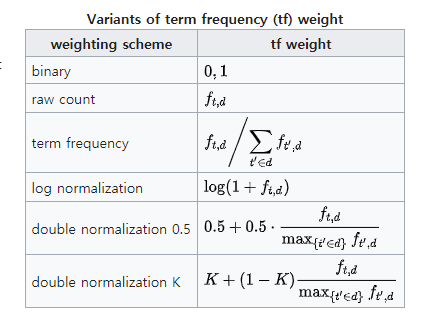

TDM으로 TF 계산

In [101]:
TDM

defaultdict(<function __main__.<lambda>()>,
            {0: defaultdict(int, {0: 2, 31: 1}),
             1: defaultdict(int, {0: 5, 1: 1, 7: 1}),
             2: defaultdict(int, {0: 2}),
             3: defaultdict(int, {0: 2}),
             4: defaultdict(int,
                         {0: 18,
                          1: 8,
                          3: 3,
                          5: 2,
                          6: 3,
                          8: 1,
                          9: 4,
                          12: 1,
                          17: 1,
                          22: 1,
                          26: 1,
                          31: 1,
                          33: 1}),
             5: defaultdict(int, {0: 13}),
             6: defaultdict(int, {0: 2}),
             7: defaultdict(int,
                         {0: 14,
                          1: 3,
                          3: 2,
                          4: 6,
                          6: 4,
                          8: 5,


In [106]:
from math import log
tf1 = lambda f, tf:f/tf # term frequency
tf2 = lambda f:log(1+f) # log normalization
tf3 = lambda f, mf, K=0.5:K+(1-K)*(f/mf) # double normalization K

In [109]:
tf1(1,2), tf2(2), tf3(1,2)

(0.5, 1.0986122886681098, 0.75)

In [108]:
for j, docs in TDM.items():
    for i, f in docs.items():
        TF1 = tf1(f, sum(DTM[1].values()))
        TF2 = tf2(f)
        TF3 = tf3(f, max(DTM[1].values()))
        print(V[j], j, TF1, TF2, TF3) # 일반적인 경우에는 tf3이 좋다. 너무 작은 값이 안 만들어지기 때문
    break

합리적 0 0.0035026269702276708 1.0986122886681098 0.5526315789473684
합리적 0 0.0017513134851138354 0.6931471805599453 0.5263157894736842


### IDF
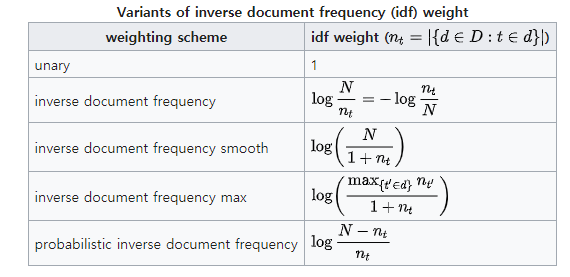

In [124]:
N = len(D)
idf1 = lambda nt:log(N/nt)
idf2 = lambda nt:log(1+N/nt)
idf3 = lambda mnt, nt:log(mnt/(1+nt))
idf4 = lambda nt:log((N-nt)/nt)
idf5 = lambda nt:log(1+(N-nt)/nt) # idf4를 보정해줌(idf4가 음수가 나오기 때문)

In [111]:
for j, docs in TDM.items():
    IDF1 = idf1(len(docs))
    IDF2 = idf2(len(docs))
    IDF4 = idf4(len(docs))
    for i, f in docs.items():
        TF1 = tf1(f, sum(DTM[1].values()))
        TF2 = tf2(f)
        TF3 = tf3(f, max(DTM[1].values()))
        print(V[j], j, TF1, TF2, TF3)
    print(V[j], IDF1, IDF2, IDF4)
    break

합리적 0 0.0035026269702276708 1.0986122886681098 0.5526315789473684
합리적 0 0.0017513134851138354 0.6931471805599453 0.5263157894736842
합리적 2.8622008809294686 2.917770732084279 2.803360380906535


### 많이 사용하는 TF-IDF 조합
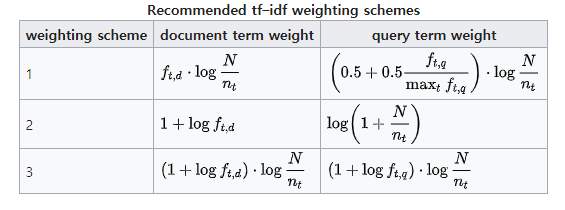

In [127]:
for j, docs in TDM.items():
    IDF1 = idf1(len(docs))
    IDF2 = idf2(len(docs))
#     IDF4 = idf4(len(docs))
    for i, f in docs.items():
        TF1 = tf1(f, sum(DTM[1].values()))
        TF2 = tf2(f)
        TF3 = tf3(f, max(DTM[1].values()),0)
        
        W1 = f * IDF1
        W2 = TF2 * 1
        W3 = TF2 * IDF1
        W4 = TF3 * IDF1 # 선생님이 추천하시는 가장 많이 쓰는 방법이다.
        
        print(V[j], i, W1, W2, W3, W4)
#     print(V[j], IDF1, IDF2, IDF4)
#     break


# 0번이 31번 문서에서보다 합리적이라는 단어가 가치가 있게 나온다.
# W4를 사용하니까 0번과 31번의 weight가 ...비슷하다고 하시는데 난 다른데? 심지어 선생님은 0번과 30번임...
# 데이터와 모델에 따라서 맞는거 찾아서 사용해야한다.

합리적 0 3.2188758248682006 1.0986122886681098 1.7681482684484517 0.16941451709832633
합리적 31 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
보수 0 6.01986402162968 1.791759469228055 2.157229672844052 0.31683494850682525
보수 1 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
보수 7 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
주춧돌 0 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
추모 0 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
정 0 -4.722556760414838 2.9444389791664403 -0.7725155670384132 -0.248555618969202
정 1 -2.098914115739928 2.1972245773362196 -0.576473210102711 -0.110469163986312
정 3 -0.787092793402473 1.3862943611198906 -0.36371410039065044 -0.041425936494867
정 5 -0.524728528934982 1.0986122886681098 -0.2882366050513555 -0.027617290996578
정 6 -0.787092793402473 1.3862943611198906 -0.36371410039065044 -0.041425936494867
정 8 -0.262364264467491 0

고 14 0.10536051565782635 0.6931471805599453 0.0730303443705643 0.005545290297780334
고 16 0.10536051565782635 0.6931471805599453 0.0730303443705643 0.005545290297780334
고 24 0.10536051565782635 0.6931471805599453 0.0730303443705643 0.005545290297780334
고 25 0.2107210313156527 1.0986122886681098 0.11575035724209683 0.011090580595560668
고 27 0.10536051565782635 0.6931471805599453 0.0730303443705643 0.005545290297780334
전 0 -8.816799973531785 2.772588722239781 -1.6296906781905485 -0.4640421038700939
전 1 -1.175573329804238 1.0986122886681098 -0.6457496531767122 -0.06187228051601252
전 2 -0.587786664902119 0.6931471805599453 -0.4074226695476371 -0.03093614025800626
전 3 -1.175573329804238 1.0986122886681098 -0.6457496531767122 -0.06187228051601252
전 7 -0.587786664902119 0.6931471805599453 -0.4074226695476371 -0.03093614025800626
전 8 -0.587786664902119 0.6931471805599453 -0.4074226695476371 -0.03093614025800626
전 9 -0.587786664902119 0.6931471805599453 -0.4074226695476371 -0.03093614025800626
전

것 24 -3.671326294866347 1.3862943611198906 -1.6965129801347991 -0.19322769972980772
것 25 -2.4475508632442313 1.0986122886681098 -1.3444547277501764 -0.1288184664865385
것 26 -8.56642802135481 2.0794415416798357 -2.5447694702021986 -0.4508646327028847
것 27 -4.895101726488463 1.6094379124341003 -1.9695905759580379 -0.257636932973077
것 28 -8.56642802135481 2.0794415416798357 -2.5447694702021986 -0.4508646327028847
것 29 -12.237754316221157 2.3978952727983707 -2.934485322453457 -0.6440923324326924
것 30 -8.56642802135481 2.0794415416798357 -2.5447694702021986 -0.4508646327028847
것 31 -1.2237754316221157 0.6931471805599453 -0.8482564900673996 -0.06440923324326925
것 32 -6.118877158110578 1.791759469228055 -2.1927112178175756 -0.3220461662163462
것 33 -3.671326294866347 1.3862943611198906 -1.6965129801347991 -0.19322769972980772
것 34 -1.2237754316221157 0.6931471805599453 -0.8482564900673996 -0.06440923324326925
우리 0 0.2107210313156527 1.0986122886681098 0.11575035724209683 0.011090580595560668
우

박 12 2.008291961827888 2.302585092994046 0.5138070148538514 0.10569957693830988
박 15 1.1157177565710488 1.791759469228055 0.39981957106441174 0.05872198718794994
박 26 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
박 28 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
박 32 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
당시 0 0.10536051565782635 0.6931471805599453 0.0730303443705643 0.005545290297780334
당시 2 0.10536051565782635 0.6931471805599453 0.0730303443705643 0.005545290297780334
당시 13 0.4214420626313054 1.6094379124341003 0.16957120837331238 0.022181161191121335
당시 15 0.10536051565782635 0.6931471805599453 0.0730303443705643 0.005545290297780334
당시 16 0.6321630939469581 1.9459101490553132 0.20502209672826555 0.033271741786682005
당시 17 0.10536051565782635 0.6931471805599453 0.0730303443705643 0.005545290297780334
당시 18 0.10536051565782635 0.6931471805599453 0.0730303443705643 0.005545290

이야기 9 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
이야기 21 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
분 0 -0.0953101798043249 0.6931471805599453 -0.06606398241002924 -0.005016325252859204
분 1 -0.1906203596086498 1.0986122886681098 -0.10470893476819843 -0.010032650505718409
분 7 -0.1906203596086498 1.0986122886681098 -0.10470893476819843 -0.010032650505718409
분 8 -0.0953101798043249 0.6931471805599453 -0.06606398241002924 -0.005016325252859204
분 9 -0.3812407192172996 1.6094379124341003 -0.1533958168179914 -0.020065301011436817
분 13 -0.2859305394129747 1.3862943611198906 -0.13212796482005848 -0.015048975758577613
분 17 -0.0953101798043249 0.6931471805599453 -0.06606398241002924 -0.005016325252859204
분 18 -0.2859305394129747 1.3862943611198906 -0.13212796482005848 -0.015048975758577613
분 19 -0.0953101798043249 0.6931471805599453 -0.06606398241002924 -0.005016325252859204
분 24 -0.0953101798043249 0.6931471805599453 -0.066063982

구독 29 -1.1314021114911006 0.6931471805599453 -0.7842281836596252 -0.059547479552163184
구독 30 -1.1314021114911006 0.6931471805599453 -0.7842281836596252 -0.059547479552163184
구독 31 -1.1314021114911006 0.6931471805599453 -0.7842281836596252 -0.059547479552163184
구독 33 -1.1314021114911006 0.6931471805599453 -0.7842281836596252 -0.059547479552163184
구독 34 -1.1314021114911006 0.6931471805599453 -0.7842281836596252 -0.059547479552163184
뭐 0 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
뭐 1 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
뭐 2 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
뭐 4 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
뭐 6 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
뭐 13 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
뭐 23 0.22314355131420976 0.6931471805599453 0.15467132345357

최고 6 1.783374719693662 1.791759469228055 0.6390757082386094 0.09386182735229799
최고 7 3.9234243833260565 2.4849066497880004 0.8863039400061183 0.2064960201750556
최고 9 0.7133498878774648 1.0986122886681098 0.3918474764711005 0.037544730940919195
최고 21 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
최고 24 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
최고 28 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
위원 1 1.3862943611198906 1.0986122886681098 0.761500010418809 0.07296286111157319
위원 6 4.852030263919617 2.0794415416798357 1.441359041754604 0.2553700138905061
위원 7 7.6246189861593985 2.4849066497880004 1.7224060382552118 0.40129573611365255
위원 9 1.3862943611198906 1.0986122886681098 0.761500010418809 0.07296286111157319
위원 25 0.6931471805599453 0.6931471805599453 0.4804530139182014 0.03648143055578659
회의 1 0.0 0.6931471805599453 0.0 0.0
회의 3 0.0 1.0986122886681098 0.0 0.0
회의 5 0.0 1.609437912434100

터 9 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
터 13 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
터 21 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
터 23 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
터 29 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
터 31 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
뿐 1 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
뿐 17 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
뿐 26 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
외부 1 2.4079456086518722 1.0986122886681098 1.3226993180546789 0.12673397940273012
외부 7 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
외부 9 2.4079456086518722 1.0986122886681098 1.3226993180546789 0.12673397940273012
추가 1 0.0 0.6

전체 9 0.10536051565782635 0.6931471805599453 0.0730303443705643 0.005545290297780334
전체 14 0.10536051565782635 0.6931471805599453 0.0730303443705643 0.005545290297780334
전체 27 0.31608154697347907 1.3862943611198906 0.1460606887411286 0.016635870893341002
전체 28 0.10536051565782635 0.6931471805599453 0.0730303443705643 0.005545290297780334
구성원 1 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
중 1 -0.6418538861723948 0.6931471805599453 -0.44489921153183953 -0.03378178348275762
중 2 -1.2837077723447896 1.0986122886681098 -0.7051485668783751 -0.06756356696551524
중 5 -1.2837077723447896 1.0986122886681098 -0.7051485668783751 -0.06756356696551524
중 9 -0.6418538861723948 0.6931471805599453 -0.44489921153183953 -0.03378178348275762
중 12 -0.6418538861723948 0.6931471805599453 -0.44489921153183953 -0.03378178348275762
중 13 -0.6418538861723948 0.6931471805599453 -0.44489921153183953 -0.03378178348275762
중 14 -0.6418538861723948 0.6931471805599453 -0.44489921153183953 -0.0

과거 12 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
과거 17 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
과거 25 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
새 1 0.44628710262841953 1.0986122886681098 0.24514824761083379 0.023488794875179974
새 3 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
새 9 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
새 10 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
새 12 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
새 13 0.44628710262841953 1.0986122886681098 0.24514824761083379 0.023488794875179974
새 30 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
새 31 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
시절 1 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.0633669897

오열 1 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
오열 9 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
방향 1 0.6931471805599453 0.6931471805599453 0.4804530139182014 0.03648143055578659
방향 7 1.3862943611198906 1.0986122886681098 0.761500010418809 0.07296286111157319
방향 9 0.6931471805599453 0.6931471805599453 0.4804530139182014 0.03648143055578659
방향 12 0.6931471805599453 0.6931471805599453 0.4804530139182014 0.03648143055578659
방향 27 0.6931471805599453 0.6931471805599453 0.4804530139182014 0.03648143055578659
모아 1 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
최선 1 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
최선 9 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
최선 18 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
한가지 1 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
유감 1 1.20397280

모습 9 0.0 0.6931471805599453 0.0 0.0
모습 12 0.0 1.0986122886681098 0.0 0.0
모습 16 0.0 0.6931471805599453 0.0 0.0
모습 19 0.0 0.6931471805599453 0.0 0.0
모습 26 0.0 1.0986122886681098 0.0 0.0
모습 27 0.0 0.6931471805599453 0.0 0.0
모습 28 0.0 1.0986122886681098 0.0 0.0
모습 31 0.0 0.6931471805599453 0.0 0.0
모습 34 0.0 0.6931471805599453 0.0 0.0
함대 2 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
근해 2 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
군경 2 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
소동 2 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
시민 2 2.4079456086518722 1.0986122886681098 1.3226993180546789 0.12673397940273012
시민 22 2.4079456086518722 1.0986122886681098 1.3226993180546789 0.12673397940273012
시민 27 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
분위기 2 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
분위기 4 0.916290

의문 7 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
반응 2 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
반응 4 3.6119184129778086 1.3862943611198906 1.6690607095787466 0.19010096910409516
반응 10 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
모 2 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
모 4 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
모 14 0.7133498878774648 1.0986122886681098 0.3918474764711005 0.037544730940919195
모 16 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
모 30 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
모 33 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
모 34 2.1400496636323942 1.9459101490553132 0.6940573933241142 0.11263419282275759
63 2 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
63 27 1.609

12 3 0.6931471805599453 0.6931471805599453 0.4804530139182014 0.03648143055578659
12 5 0.6931471805599453 0.6931471805599453 0.4804530139182014 0.03648143055578659
12 10 0.6931471805599453 0.6931471805599453 0.4804530139182014 0.03648143055578659
12 20 1.3862943611198906 1.0986122886681098 0.761500010418809 0.07296286111157319
12 30 0.6931471805599453 0.6931471805599453 0.4804530139182014 0.03648143055578659
청와대 3 3.2100744954485916 2.302585092994046 0.8212744089578122 0.16895128923413638
청와대 5 4.2800993272647885 2.5649493574615367 0.9148531682782813 0.22526838564551518
청와대 7 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
청와대 13 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
청와대 15 0.7133498878774648 1.0986122886681098 0.3918474764711005 0.037544730940919195
청와대 26 1.4266997757549296 1.6094379124341003 0.5740461771903033 0.07508946188183839
청와대 29 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598


국내 24 0.44628710262841953 1.0986122886681098 0.24514824761083379 0.023488794875179974
국내 31 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
국내 33 0.22314355131420976 0.6931471805599453 0.15467132345357798 0.011744397437589987
신문 3 1.8325814637483102 1.0986122886681098 1.006648258029643 0.09645165598675316
신문 10 1.8325814637483102 1.0986122886681098 1.006648258029643 0.09645165598675316
신문 16 2.7488721956224653 1.3862943611198906 1.2702486747435588 0.14467748398012975
신문 27 1.8325814637483102 1.0986122886681098 1.006648258029643 0.09645165598675316
원래 3 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
자극적 3 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
4 3 -0.1823215567939546 0.6931471805599453 -0.12637567304702957 -0.009595871410208135
4 7 -0.1823215567939546 0.6931471805599453 -0.12637567304702957 -0.009595871410208135
4 8 -0.1823215567939546 0.6931471805599453 -0.12637567304702957 -0.009595871410

평가 15 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
평가 16 0.7133498878774648 1.0986122886681098 0.3918474764711005 0.037544730940919195
평가 20 1.0700248318161971 1.3862943611198906 0.4944564635350178 0.056317096411378796
평가 31 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
선 3 -0.6729444732424258 1.0986122886681098 -0.3696525339477085 -0.03541813017065399
선 4 -0.3364722366212129 0.6931471805599453 -0.23322478215069248 -0.017709065085326995
선 5 -0.3364722366212129 0.6931471805599453 -0.23322478215069248 -0.017709065085326995
선 6 -0.3364722366212129 0.6931471805599453 -0.23322478215069248 -0.017709065085326995
선 7 -0.3364722366212129 0.6931471805599453 -0.23322478215069248 -0.017709065085326995
선 9 -0.6729444732424258 1.0986122886681098 -0.3696525339477085 -0.03541813017065399
선 12 -0.6729444732424258 1.0986122886681098 -0.3696525339477085 -0.03541813017065399
선 15 -0.3364722366212129 0.6931471805599453 -0.23322478215069248 -0

높이 4 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
높이 16 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
일선 4 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
온도차 4 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
현실 4 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
현실 12 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
현실 21 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
현실 32 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
단체 4 1.0216512475319814 1.0986122886681098 0.5611993076358699 0.05377111829115692
단체 6 0.5108256237659907 0.6931471805599453 0.3540773408711719 0.02688555914557846
단체 8 0.5108256237659907 0.6931471805599453 0.3540773408711719 0.02688555914557846
단체 22 3.0649537425959443 1.9459101490553132 0.9940207656837524 0.16131335487347073
단체 30 0.510825

기존 34 0.8925742052568391 1.6094379124341003 0.3591356914002733 0.04697758975035995
범위 4 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
공식 4 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
공식 5 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
공식 15 1.8325814637483102 1.0986122886681098 1.006648258029643 0.09645165598675316
공식 25 2.7488721956224653 1.3862943611198906 1.2702486747435588 0.14467748398012975
현장 4 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
현장 16 4.5814536593707755 1.791759469228055 1.6417725954014222 0.2411291399668829
현장 17 1.8325814637483102 1.0986122886681098 1.006648258029643 0.09645165598675316
현장 27 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
실효성 4 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
비판적 4 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
업계 4 0.22314355

회의실 5 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
종 5 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
워킹 5 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
런치 5 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
관저 5 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
구내 5 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
식당 5 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
식당 19 4.828313737302301 1.3862943611198906 2.2311547025799614 0.2541217756474895
정상급 5 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
외빈 5 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
예우 5 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
처음 5 0.7133498878774648 1.0986122886681098 0.3918474764711005 0.037544730940919195
처음 12 0.3566749439387324 

도움 5 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
도움 25 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
도움 26 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
석상 5 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
공개적 5 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
격의 5 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
참고 5 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
향후 5 0.6931471805599453 0.6931471805599453 0.4804530139182014 0.03648143055578659
향후 7 0.6931471805599453 0.6931471805599453 0.4804530139182014 0.03648143055578659
향후 14 1.3862943611198906 1.0986122886681098 0.761500010418809 0.07296286111157319
향후 20 1.3862943611198906 1.0986122886681098 0.761500010418809 0.07296286111157319
향후 31 2.772588722239781 1.6094379124341003 1.1155773512899807 0.14592572222314637
홍보 5 2.3025850929

하루 30 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
정국 6 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
돌파구 6 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
이목 6 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
이인 6 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
하사 6 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
이인영 6 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
정쟁 6 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
방탄 6 6.907755278982138 1.3862943611198906 3.192060730416365 0.3635660673148493
수단 6 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
민생 6 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
민생 8 9.656627474604601 1.9459101490553132 3.1318215680799124 0.508243551294979
마중물 6 2.302585092994046 0.69

봉쇄 6 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
봉쇄 13 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
자세 6 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
자세 26 3.2188758248682006 1.0986122886681098 1.7681482684484517 0.16941451709832633
결단 6 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
결단 7 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
교섭 6 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
교섭 8 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
교섭 26 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
합의 6 1.8325814637483102 1.0986122886681098 1.006648258029643 0.09645165598675316
합의 8 11.911779514364017 2.6390573296152584 2.4181437720110184 0.6269357639138956
합의 25 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
합의 29 0.916290

전망 10 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
전망 13 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
전망 15 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
전망 23 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
전망 30 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
전망 34 0.3566749439387324 0.6931471805599453 0.2472282317675089 0.018772365470459598
광주 7 6.907755278982138 1.3862943611198906 3.192060730416365 0.3635660673148493
민주화 7 3.2188758248682006 1.0986122886681098 1.7681482684484517 0.16941451709832633
민주화 21 4.828313737302301 1.3862943611198906 2.2311547025799614 0.2541217756474895
공청회 7 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
폄훼 7 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
징계 7 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
원권 7 2.3025

지도부 8 3.2188758248682006 1.0986122886681098 1.7681482684484517 0.16941451709832633
518 7 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
기념일 7 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
이전 7 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
이전 13 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
해결 7 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
해결 12 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
해결 26 2.4079456086518722 1.0986122886681098 1.3226993180546789 0.12673397940273012
기회 7 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
기회 13 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
기회 21 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
기회 34 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
대로 7 1.20

원활 14 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
비대 9 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
전환 9 9.210340371976184 1.6094379124341003 3.705867745270216 0.4847547564197991
별도 9 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
이하 9 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
재선 9 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
기득권 9 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
세력 9 3.2188758248682006 1.0986122886681098 1.7681482684484517 0.16941451709832633
세력 27 9.656627474604601 1.9459101490553132 3.1318215680799124 0.508243551294979
태동 9 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
헌신 9 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
결의 9 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
다짐 9 1.6094379124341003 0.693

화 31 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
그룹 10 3.6119184129778086 1.3862943611198906 1.6690607095787466 0.19010096910409516
그룹 12 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
그룹 20 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
전자 10 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
전자 31 4.8158912173037445 1.6094379124341003 1.937719476821764 0.25346795880546025
전자 33 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
조급 10 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
주문 10 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
성공 10 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
성공 21 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
성공 25 1.8325814637483102 1.0986122886681098 1.006648258029643 0.09645165598675316
성공 32 0.9

창출 11 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
활성화 11 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
활성화 24 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
현대화 11 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
기획 11 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
기획 12 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
기획 15 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
기획 21 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
생산 11 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
생산 14 4.828313737302301 1.3862943611198906 2.2311547025799614 0.2541217756474895
유통 11 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
유통 24 3.2188758248682006 1.0986122886681098 1.7681482684484517 0.16941451709832633
원스톱 1

대기업 12 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
대기업 15 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
총수 12 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
33 13 13.815510557964275 1.9459101490553132 4.480623701520586 0.7271321346296986
3800 13 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
분양 13 51.50201319789121 3.4965075614664802 5.6274118305366585 2.7106322735732213
분양 21 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
2600 13 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
조합원 13 13.815510557964275 1.9459101490553132 4.480623701520586 0.7271321346296986
분담금 13 3.2188758248682006 1.0986122886681098 1.7681482684484517 0.16941451709832633
분담금 29 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
초비상 13 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
상한제 13

청약 13 4.828313737302301 1.3862943611198906 2.2311547025799614 0.2541217756474895
청약 21 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
모든 13 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
모든 26 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
대출 13 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
노모 13 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
노후 13 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
자금 13 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
재개발 13 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
입주권 13 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
거액 13 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
지불 13 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
땅 13 2.302585

건너 15 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
반론 15 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
수장 15 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
수장 21 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
수장 25 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
지방 15 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
지방 23 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
지방 28 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
지방 30 0.9162907318741551 0.6931471805599453 0.6351243373717794 0.04822582799337658
고검장 15 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
승진 15 11.51292546497023 1.791759469228055 4.125678644075443 0.6059434455247489
직행 15 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
외 15 2.30258

53 17 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
징역 16 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
강모 16 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
41 16 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
재판부 16 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
재판부 17 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
피고인 16 4.828313737302301 1.3862943611198906 2.2311547025799614 0.2541217756474895
피고인 17 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
인정 16 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
인정 21 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
인정 22 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
반성 16 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
전력 16 2

713 18 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
정차 18 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
550 18 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
가량 18 2.4079456086518722 1.0986122886681098 1.3226993180546789 0.12673397940273012
가량 20 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
가량 28 1.2039728043259361 0.6931471805599453 0.8345303547893733 0.06336698970136506
역내 18 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
부산 18 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
129 18 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
출발 18 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
대전역 18 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
32 18 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
32 27 1.

책 21 9.210340371976184 1.6094379124341003 3.705867745270216 0.4847547564197991
웅진 21 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
지식 21 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
하우스 21 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
1978 21 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
년생 21 6.907755278982138 1.3862943611198906 3.192060730416365 0.3635660673148493
언론인 21 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
정훈 21 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
1981 21 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
학자 21 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
나리 21 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
박사 21 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
1987 21 2.302585

한반도 22 3.2188758248682006 1.0986122886681098 1.7681482684484517 0.16941451709832633
한반도 29 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
분단 22 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
동북아 22 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
안정 22 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
위협 22 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
행위 22 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
성명 22 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
성명 29 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
지지 22 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
지지 25 3.2188758248682006 1.0986122886681098 1.7681482684484517 0.16941451709832633
성제 22 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
총 22 1.

재적 25 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
747 25 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
383 25 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
383 28 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
찬성표 25 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
인준 25 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
임기 25 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
임기 27 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
클로드 25 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
바통 25 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
2024 25 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
영국 25 9.210340371976184 1.6094379124341003 3.705867745270216 0.4847547564197991
탈퇴 25 4.

명기 27 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
북서부 27 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
니가타 27 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
연설 27 6.907755278982138 1.3862943611198906 3.192060730416365 0.3635660673148493
마이크 27 1.6094379124341003 0.6931471805599453 1.1155773512899807 0.08470725854916317
마이크 29 3.2188758248682006 1.0986122886681098 1.7681482684484517 0.16941451709832633
파란색 27 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
재킷 27 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
베 27 9.210340371976184 1.6094379124341003 3.705867745270216 0.4847547564197991
현행 27 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
공산당 27 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
무책임 27 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
야권 27 2.302585

시뮬레이션 29 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
이마 29 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
청구서 29 4.605170185988092 1.0986122886681098 2.529648278867261 0.24237737820989955
스티븐 29 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
접근 29 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
동결 29 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
입구 29 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
아이디어 29 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
테이블 29 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
오기 29 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
직거래 29 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
촉진 29 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
지렛대 29 2

선명 33 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
현악기 33 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
울림 33 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
이용자 33 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
전용관 33 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
하드웨어 33 9.210340371976184 1.6094379124341003 3.705867745270216 0.4847547564197991
전용 33 13.815510557964275 1.9459101490553132 4.480623701520586 0.7271321346296986
플레이어 33 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
헤드폰 33 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
이어폰 33 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
보편적 33 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
음색 33 2.302585092994046 0.6931471805599453 1.5960303652081824 0.12118868910494977
원음 33 2.3

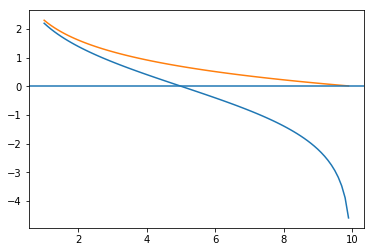

In [125]:
import matplotlib.pyplot as plt
N = 10
dfList = np.arange(1,10,0.1)
plt.plot(dfList, [idf4(_) for _ in dfList])
plt.plot(dfList, [idf5(_) for _ in dfList])
plt.axhline(0)
plt.show()

# idf4를 사용하면 안 되는 이유가 weight가 -가 된다.
# 우리는 1사분면 모두 양의 값인 것을 쓴다고 했기 때문에
# 어떻게 smoothing처리를 해줘야 할지 생각해야 한다.

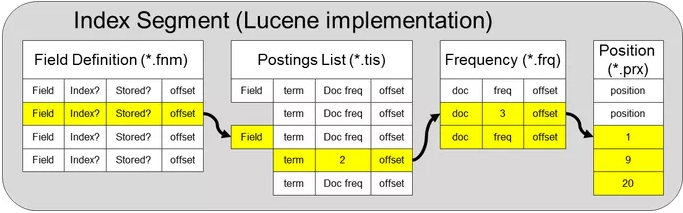

In [156]:
TWM = defaultdict(lambda:defaultdict(int))
DocLength = defaultdict(float)

for j, docs in TDM.items():
    IDF1 = idf1(len(docs))
    IDF2 = idf2(len(docs))
#     IDF4 = idf4(len(docs))
    for i, f in docs.items():
        TF1 = tf1(f, sum(DTM[1].values()))
        TF2 = tf2(f)
        TF3 = tf3(f, max(DTM[1].values()),0)
        
        W1 = f * IDF1
        W2 = TF2 * 1
        W3 = TF2 * IDF1
        W4 = TF3 * IDF1 # 선생님이 추천하시는 가장 많이 쓰는 방법이다.
        
        TWM[j][i] = W4 # 왜 이렇게 하면 안되나요...? -> python에서만 가능해서
        DocLength[i] += W4**2 # 각각의 문서별로 문서 벡터의 가중치 값의 제곱이 들어가니까 마지막에 sqrt 하면 된다.
        

In [129]:
TWM

defaultdict(<function __main__.<lambda>()>,
            {0: defaultdict(int,
                         {0: 0.16941451709832633, 31: 0.08470725854916317}),
             1: defaultdict(int,
                         {0: 0.31683494850682525,
                          1: 0.06336698970136506,
                          7: 0.06336698970136506}),
             2: defaultdict(int, {0: 0.24237737820989955}),
             3: defaultdict(int, {0: 0.24237737820989955}),
             4: defaultdict(int,
                         {0: -0.248555618969202,
                          1: -0.110469163986312,
                          3: -0.041425936494867,
                          5: -0.027617290996578,
                          6: -0.041425936494867,
                          8: -0.013808645498289,
                          9: -0.055234581993156,
                          12: -0.013808645498289,
                          17: -0.013808645498289,
                          22: -0.013808645498289,
               

Relevance = Similarity

euclidean = -sqrt(t ㅌ V (q - d_i)\*\*2) : 크면 클수록 좋다. (-가 붙게 되면 1 -> -1, 10 -> -10 -1이 -10보다 크다 -> 클 수록 좋다.

cos theta = q vector * d_i vector / |q| * |d_i| : 크면 클수록 좋다.

-> 두 개 크면 클수록 좋은 것으로 맞춰주려고 -sqrt 사용한다.

|q|는 모든 documnet vector에 들어가므로 계산 안한다.

In [181]:
Q = '한국 일본 콜마 사과에도 사과 불매 사과 불매 불매 분위기 확산(종합)'
# kkma.nouns("가방 가방 가방") # 명사 추출 
# [_[0] for _ in kkma.pos("가방 가방 가방") if _[1].startswith("N")]
# 형태소 분석기마다 특징이 다르기 때문에 원하는 형태를 반환해주는 것을 잘 골라야한다.

_Q = [_[0] for _ in kkma.pos(Q) 
      if _[1].startswith("N") and _[0] in V]

QWM = defaultdict(float)

for t in _Q:
    j = V.index(t)
    QWM[j] += 1
    
maxfreq = max(QWM.values())

for j in QWM.keys():
    # 쿼리는 하나다. 문서에서 가지고 온 학습된 idf를 사용하던지 unary 를 사용하던지
    QWM[j] = tf3(QWM[j], maxfreq, 0.5) * idf1(len(TWM[j]))

Qlength = sqrt(sum([_**2 for _ in QWM.values()]))

In [182]:
from math import sqrt

searchResult = defaultdict(float)

for q_j, w_q in QWM.items():
    for i, w in TWM[q_j].items():
        searchResult[i] += q_j * i # inner product 문서 별로 더해 놔야한다.
        
for i, ip in searchResult.items():
    searchResult[i] = ip / sqrt(DocLength[i]) # 정규화
    
for _ in sorted(searchResult.items(), key=lambda x:x[1], reverse=True):
    print(_[1])
    print(collection[_[0]][:50])
    print()

24945.52729185128
법인월급제 부제완화 등 택시규제 대폭 완화
플랫폼택시 기존택시보다 요금 높아질 듯
김현미 

10426.732447524682
양국관계 악화 영향 수출규제 여파로 감소세 이어질 듯 중일관계 호전으로 일본 찾은 중국인 

9674.07163207652
한미 연합훈련 중단요구에 속도조절 카드로 응수 에 훈련중지 직접 요구 시간과 여유 주려고 

9637.096652924862
삼성바이오로직스 사태 전문가 토론회 토론자 고의분식의혹 일축
거래조작없어 분식 말안돼
종속

9483.464479753458
소재 제한땐 치명타
명노현오른쪽 LS전선 대표이사가 지난 5월 폴란드 사업장의 생산 설비 

8676.194496117992
앵커 한일 두 나라 기독교 단체와 시민사회 단체가 모여 일본의 한국 수출규제 움직임을 비판

7484.541549578203
중앙지검장 소윤 윤대진 여전히 유력 소윤 vs 소윤
국정원 댓글 국정농단 특검팀 등 요직 

5613.024202668283
조선일보 일본판 사이트 내 기사 랭킹왼 수출 우대 제외 라는 제목의 기사가 상위권을 차지하

5173.831532227403
녹천역 인근 사업지 선정에
치안 주거환경 악화 반발 는 계획대로 추진할 것 서울경제 서울시

5171.270003726926
서울신문
대림동 여경 논란 유튜브 영상 캡처 대림동 여경 동영상 속에 남자 경찰관의 뺨을 

4999.437505671645
자민 공명 연립여당 과반 획득 무난
개헌세력 의석 3분의 2 확보는 미묘 대한국 수출규제는

3381.194545918957
젊은 기업인들이 규제 애로를 호소하는 모습을 보면서 기성세대가 잘못해서 놓인 덫이 그들의 

3337.7788487009902
문재인 대통령이 최근 일본의 경제 보복 조치와 관련해 두 차례 청와대 참모진들과 번개 오찬

2042.1430473325986
경제보복 소재 부품 수입 다변화 시동 러 등 복수국 잇단 수출 제의
삼성 제3 공급처 확보

1796.831119178283


In [183]:
from math import sqrt

searchResult = defaultdict(float)

for t in V:
    j = V.index(t)
    
    for i, w in TWM[j].items():
        searchResult[i] += (QWM[j] - w)**2
        
for i, ip in searchResult.items():
    searchResult[i] = -sqrt(ip)
    
for _ in sorted(searchResult.items(), key=lambda x:x[1], reverse=True):
    print(_[1], len(collection[_[0]].split()))
    print(collection[_[0]][:50])o
    print()

-1.3747121906838908 160
하현회 LG유플러스 부회장 사진LG유플러스 하현회 LG유플러스 부회장이 취임 1주년을 맞아

-1.4468626523635164 115
연합뉴스 전북 익산역에서 KTX 열차가 멈춰 승객들이 대체 열차로 갈아타는 불편을 겪었다 

-1.5116427045542582 202
앵커 한일 두 나라 기독교 단체와 시민사회 단체가 모여 일본의 한국 수출규제 움직임을 비판

-1.5796089478178685 199
인근 편의점으로 가서 흉기 구입해
식당 안 손님 10여명 있는데 휘둘러
전 여친과 남자친구

-1.7826001919192653 384
머니투데이 김성휘 기자 the300조국 수석 조선 중앙일보에 매국적 제목 대통령 의중 주목

-2.0735418068828975 236
녹천역 인근 사업지 선정에
치안 주거환경 악화 반발 는 계획대로 추진할 것 서울경제 서울시

-2.1306507505960397 299
서울개인택시조합 민주택시노조 규제 완화 높이 평가 일선 택시기사들 반응과는 온도차 대책 기

-2.150494125613403 373
젊은 기업인들이 규제 애로를 호소하는 모습을 보면서 기성세대가 잘못해서 놓인 덫이 그들의 

-2.158743095482361 446
반당권파 10명 대안정치연대 발족 공표 정동영 원로정치인의 당 흔들기 미디어오늘 노지민 기

-2.189727454040388 292
아내를 폭행해 숨지게 한 혐의를 받는 유승현 전 김포시의회 의장이 지난 5월 23일 경기 

-2.223964693163828 220
예상 강수량 18일까지 30 80 제주연합뉴스 전지혜 기자 장마전선의 영향으로 17일부터 

-2.3137804162407556 466
문재인 대통령이 최근 일본의 경제 보복 조치와 관련해 두 차례 청와대 참모진들과 번개 오찬

-2.409981380913547 386
소재 제한땐 치명타
명노현오른쪽 LS전선 대표이사가 지난 5월 폴란드 사업장의 생산 설비 

-2.41327914623206